**Phân tích các yếu tố ảnh hưởng đến giá nhà với ngôn ngữ R**

# Cài đặt môi trường

In [ ]:
install.packages('IRkernel')
IRkernel::installspec(user = FALSE)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("moments")
install.packages("ggplot2")
install.packages("dplyr")
install.packages("reshape2")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’




In [ ]:
library(moments)
library(ggplot2)
library(dplyr)
library(reshape2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




-Bộ dữ liệu "House Prices - Advanced Regression Techniques" chứa các thông tin liên quan đến các căn nhà và giá bán của chúng:

- SalePrice: Giá bán của căn nhà, được tính bằng đô la.
-MSSubClass: Lớp xây dựng của căn nhà.
-MSZoning: Phân loại vùng đất.
-LotFrontage: Chiều dài đường phố nối với tài sản.
-LotArea: Diện tích lô đất trong feet vuông.
-Street: Loại đường truy cập đến căn nhà.
-Alley: Loại hẻm truy cập đến căn nhà.
-LotShape: Hình dạng tổng quát của tài sản.
-LandContour: Độ bằng phẳng của tài sản.
-Utilities: Loại tiện ích có sẵn.
-LotConfig: Cấu hình lô đất.
-LandSlope: Độ dốc của tài sản.
-Neighborhood: Vị trí vật lý trong giới hạn thành phố Ames.
-Condition1 và Condition2: Sự gần gũi với đường chính hoặc đường sắt.
-BldgType: Loại nhà ở.
-HouseStyle: Kiểu nhà ở.
-OverallQual: Chất lượng vật liệu và hoàn thiện tổng thể.
-OverallCond: Xếp hạng điều kiện tổng thể.
-YearBuilt: Ngày xây dựng ban đầu.
-YearRemodAdd: Ngày sửa chữa.
-RoofStyle và RoofMatl: Loại mái và vật liệu mái.
-Exterior1st và Exterior2nd: Phủ bên ngoài của căn nhà.
-MasVnrType: Loại tường giả đá.
-MasVnrArea: Diện tích tường giả đá trong feet vuông.
-ExterQual và ExterCond: Chất lượng và điều kiện của vật liệu bên ngoài.
-Foundation: Loại nền móng.
-BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, -BsmtFinSF2, BsmtUnfSF, TotalBsmtSF: Các đặc điểm liên quan đến tầng hầm.
-Heating và HeatingQC: Loại hệ thống sưởi và chất lượng và điều kiện sưởi.
-CentralAir: Có điều hòa không khí trung tâm hay không.
-Electrical: Loại hệ thống điện.
-1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea: Diện tích của các khu vực sống.
-BsmtFullBath, BsmtHalfBath, FullBath, HalfBath: Số phòng tắm.
-Bedroom, Kitchen, KitchenQual, TotRmsAbvGrd: Số lượng và chất lượng của các -phòng ngủ, phòng bếp và tổng số phòng trên mặt đất.
-Functional: Xếp hạng chức năng nhà.
-Fireplaces và FireplaceQu: Số lượng lò sưởi và chất lượng của chúng.
-GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, -GarageCond: Các đặc điểm liên quan đến ga-ra, bao gồm loại, năm xây dựng, diện tích và chất lượng.
-PavedDrive: Đường láng.
-WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch: Diện tích của các loại hiên và sân cỏ.
-PoolArea và PoolQC: Diện tích và chất lượng hồ bơi.
-Fence: Chất lượng hàng rào.
-MiscFeature và MiscVal: Các tính năng khác và giá trị của chúng.
-MoSold và YrSold: Tháng và năm bán.
-SaleType và SaleCondition: Loại và điều kiện của việc bán.

# Câu 1: Import dữ liệu

In [ ]:
# Tải dữ liệu
data <- read.csv("/content/drive/MyDrive/ColabNotebooks/DLL/DoAn/house-prices-advanced-regression-techniques.csv")



# Câu 2: Xử lý dữ liệu


## 2.1 Hiển thị dữ liệu

Hiển thị 5 sample đầu tiên

In [ ]:
head(data)

Id MSSubClass MSZoning LotFrontage LotArea Street Alley LotShape LandContour
1 1  60         RL       65           8450   Pave   NA    Reg      Lvl        
2 2  20         RL       80           9600   Pave   NA    Reg      Lvl        
3 3  60         RL       68          11250   Pave   NA    IR1      Lvl        
4 4  70         RL       60           9550   Pave   NA    IR1      Lvl        
5 5  60         RL       84          14260   Pave   NA    IR1      Lvl        
6 6  50         RL       85          14115   Pave   NA    IR1      Lvl        
  Utilities ⋯ PoolArea PoolQC Fence MiscFeature MiscVal MoSold YrSold SaleType
1 AllPub    ⋯ 0        NA     NA    NA            0      2     2008   WD      
2 AllPub    ⋯ 0        NA     NA    NA            0      5     2007   WD      
3 AllPub    ⋯ 0        NA     NA    NA            0      9     2008   WD      
4 AllPub    ⋯ 0        NA     NA    NA            0      2     2006   WD      
5 AllPub    ⋯ 0        NA     NA    NA            0     12     2008   WD      
6 AllPub    ⋯ 0        NA     MnPrv Shed        700     10     2009   WD      
  SaleCondition SalePrice
1 Normal        208500   
2 Normal        181500   
3 Normal        223500   
4 Abnorml       140000   
5 Normal        250000   
6 Normal        143000

Hiển thị 5 sample cuối cùng

In [ ]:
tail(data)

Id   MSSubClass MSZoning LotFrontage LotArea Street Alley LotShape
1455 1455 20         FV       62           7500   Pave   Pave  Reg     
1456 1456 60         RL       62           7917   Pave   NA    Reg     
1457 1457 20         RL       85          13175   Pave   NA    Reg     
1458 1458 70         RL       66           9042   Pave   NA    Reg     
1459 1459 20         RL       68           9717   Pave   NA    Reg     
1460 1460 20         RL       75           9937   Pave   NA    Reg     
     LandContour Utilities ⋯ PoolArea PoolQC Fence MiscFeature MiscVal MoSold
1455 Lvl         AllPub    ⋯ 0        NA     NA    NA             0    10    
1456 Lvl         AllPub    ⋯ 0        NA     NA    NA             0     8    
1457 Lvl         AllPub    ⋯ 0        NA     MnPrv NA             0     2    
1458 Lvl         AllPub    ⋯ 0        NA     GdPrv Shed        2500     5    
1459 Lvl         AllPub    ⋯ 0        NA     NA    NA             0     4    
1460 Lvl         AllPub    ⋯ 0        NA     NA    NA             0     6    
     YrSold SaleType SaleCondition SalePrice
1455 2009   WD       Normal        185000   
1456 2007   WD       Normal        175000   
1457 2010   WD       Normal        210000   
1458 2010   WD       Normal        266500   
1459 2010   WD       Normal        142125   
1460 2008   WD       Normal        147500

Hiển thị thông tin tổng quan về dataset

In [ ]:
# Hiển thị cấu trúc dữ liệu
str(data)

'data.frame':	1460 obs. of  81 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass   : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : chr  "RL" "RL" "RL" "RL" ...
 $ LotFrontage  : int  65 80 68 60 84 85 75 0 51 50 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street       : chr  "Pave" "Pave" "Pave" "Pave" ...
 $ Alley        : chr  NA NA NA NA ...
 $ LotShape     : chr  "Reg" "Reg" "IR1" "IR1" ...
 $ LandContour  : chr  "Lvl" "Lvl" "Lvl" "Lvl" ...
 $ Utilities    : chr  "AllPub" "AllPub" "AllPub" "AllPub" ...
 $ LotConfig    : chr  "Inside" "FR2" "Inside" "Corner" ...
 $ LandSlope    : chr  "Gtl" "Gtl" "Gtl" "Gtl" ...
 $ Neighborhood : chr  "CollgCr" "Veenker" "CollgCr" "Crawfor" ...
 $ Condition1   : chr  "Norm" "Feedr" "Norm" "Norm" ...
 $ Condition2   : chr  "Norm" "Norm" "Norm" "Norm" ...
 $ BldgType     : chr  "1Fam" "1Fam" "1Fam" "1Fam" ...
 $ HouseStyle   : chr  "2Story" "1Story" "2Story" "2Story" ...
 

Kiểm tra đặc trưng bị "missing value"

In [ ]:
# Tìm các cột chứa giá trị thiếu
missing_value <- colnames(data)[apply(is.na(data), 2, any)]

# Đếm tổng số cột chứa giá trị thiếu
missing_count <- sum(colSums(is.na(data)) > 0)

# In ra các cột chứa giá trị thiếu
print(missing_value)

# In ra tổng số cột chứa giá trị thiếu
print(missing_count)


 [1] "Alley"        "MasVnrType"   "BsmtQual"     "BsmtCond"     "BsmtExposure"
 [6] "BsmtFinType1" "BsmtFinType2" "Electrical"   "FireplaceQu"  "GarageType"  
[11] "GarageFinish" "GarageQual"   "GarageCond"   "PoolQC"       "Fence"       
[16] "MiscFeature" 
[1] 16


Kiểm tra các đặc trưng dạng numerical

In [ ]:
# Lọc ra các cột có kiểu dữ liệu là số
numerical <- names(data)[sapply(data, is.numeric)]

# Đếm số lượng cột có kiểu dữ liệu là số
numerical_count <- sum(sapply(data, is.numeric))

# In ra các cột có kiểu dữ liệu là số
print(numerical)

# In ra số lượng cột có kiểu dữ liệu là số
print(numerical_count)


 [1] "Id"            "MSSubClass"    "LotFrontage"   "LotArea"      
 [5] "OverallQual"   "OverallCond"   "YearBuilt"     "YearRemodAdd" 
 [9] "MasVnrArea"    "BsmtFinSF1"    "BsmtFinSF2"    "BsmtUnfSF"    
[13] "TotalBsmtSF"   "X1stFlrSF"     "X2ndFlrSF"     "LowQualFinSF" 
[17] "GrLivArea"     "BsmtFullBath"  "BsmtHalfBath"  "FullBath"     
[21] "HalfBath"      "BedroomAbvGr"  "KitchenAbvGr"  "TotRmsAbvGrd" 
[25] "Fireplaces"    "GarageCars"    "GarageArea"    "WoodDeckSF"   
[29] "OpenPorchSF"   "EnclosedPorch" "X3SsnPorch"    "ScreenPorch"  
[33] "PoolArea"      "MiscVal"       "MoSold"        "YrSold"       
[37] "SalePrice"    
[1] 37


Kiểm tra đặc trưng dạng categorical

In [ ]:
# Lọc ra các cột có kiểu dữ liệu là object
categorical <- names(data)[sapply(data, is.character)]

# Đếm số lượng cột có kiểu dữ liệu là object
categorical_count <- sum(sapply(data, is.character))

# In ra các cột có kiểu dữ liệu là object
print(categorical)

# In ra số lượng cột có kiểu dữ liệu là object
print(categorical_count)


 [1] "MSZoning"      "Street"        "Alley"         "LotShape"     
 [5] "LandContour"   "Utilities"     "LotConfig"     "LandSlope"    
 [9] "Neighborhood"  "Condition1"    "Condition2"    "BldgType"     
[13] "HouseStyle"    "RoofStyle"     "RoofMatl"      "Exterior1st"  
[17] "Exterior2nd"   "MasVnrType"    "ExterQual"     "ExterCond"    
[21] "Foundation"    "BsmtQual"      "BsmtCond"      "BsmtExposure" 
[25] "BsmtFinType1"  "BsmtFinType2"  "Heating"       "HeatingQC"    
[29] "CentralAir"    "Electrical"    "KitchenQual"   "Functional"   
[33] "FireplaceQu"   "GarageType"    "GarageYrBlt"   "GarageFinish" 
[37] "GarageQual"    "GarageCond"    "PavedDrive"    "PoolQC"       
[41] "Fence"         "MiscFeature"   "SaleType"      "SaleCondition"
[1] 44


**Nhận xét:**
* Tổng số quan sát: 1460 quan sát với 81 đặc trưng

* Có 16 đặc trưng bị "missing value": Alley, MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature

* Có 37 đặc trưng dạng numerical: Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice

* Có 44 đặc trưng dạng categorical: MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition

Đếm tổng số lượng dữ liệu null, in ra Tên cột : Số lượng null(Tỉ lệ số lượng null)

In [ ]:
# Đếm số lượng giá trị null trong mỗi cột của dataframe
null_data <- colSums(is.na(data))

# Sắp xếp các giá trị theo thứ tự giảm dần
sorted_null_data <- sort(null_data, decreasing = TRUE)

# In ra thông tin về giá trị null trong mỗi cột
for (column_name in names(sorted_null_data)) {
  missing_count <- sorted_null_data[column_name]
  if (missing_count > 0) {
    percent_missing <- round((missing_count / nrow(data)) * 100, 2)
    cat(column_name, ": ", missing_count, " (", percent_missing, "%)\n", sep = "")
  }
}


PoolQC: 1453 (99.52%)
MiscFeature: 1406 (96.3%)
Alley: 1369 (93.77%)
Fence: 1179 (80.75%)
FireplaceQu: 690 (47.26%)
GarageType: 81 (5.55%)
GarageFinish: 81 (5.55%)
GarageQual: 81 (5.55%)
GarageCond: 81 (5.55%)
BsmtExposure: 38 (2.6%)
BsmtFinType2: 38 (2.6%)
BsmtQual: 37 (2.53%)
BsmtCond: 37 (2.53%)
BsmtFinType1: 37 (2.53%)
MasVnrType: 8 (0.55%)
Electrical: 1 (0.07%)


**Nhận Xét**



*   Các cột có dữ liệu null chiếm số lượng nhiều từ 47.26% -> 99.52%
*   Các cột có dữ liệu null chiếm số lượng ít từ 0.07% -> 5.55%





## 2.2 Xử lý dữ liệu
* Xóa cột dữ liệu có tỉ lệ dữ liệu null trên 40%
* Xóa các dòng dữ liệu chứa dữ liệu null

In [ ]:
# Loại bỏ các cột 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'
data <- data[, !(names(data) %in% c('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'))]

# Loại bỏ bất kỳ dòng nào có giá trị thiếu
data <- na.omit(data)


In [ ]:
# Kiểm tra xem các cột có giá trị thiếu không
missing_counts <- colSums(is.na(data))

# In ra số lượng giá trị thiếu trong mỗi cột
print(missing_counts)


           Id    MSSubClass      MSZoning   LotFrontage       LotArea 
            0             0             0             0             0 
       Street      LotShape   LandContour     Utilities     LotConfig 
            0             0             0             0             0 
    LandSlope  Neighborhood    Condition1    Condition2      BldgType 
            0             0             0             0             0 
   HouseStyle   OverallQual   OverallCond     YearBuilt  YearRemodAdd 
            0             0             0             0             0 
    RoofStyle      RoofMatl   Exterior1st   Exterior2nd    MasVnrType 
            0             0             0             0             0 
   MasVnrArea     ExterQual     ExterCond    Foundation      BsmtQual 
            0             0             0             0             0 
     BsmtCond  BsmtExposure  BsmtFinType1    BsmtFinSF1  BsmtFinType2 
            0             0             0             0             0 
   Bsm

In [ ]:
# Đếm lại số lượng cột chứa giá trị thiếu
missing_count <- sum(colSums(is.na(data)) > 0)

# In ra số lượng cột chứa giá trị thiếu
print(missing_count)

[1] 0


In [ ]:
# Đếm lại số lượng cột có kiểu dữ liệu số
numerical_count <- sum(sapply(data, is.numeric))

# In ra số lượng cột có kiểu dữ liệu số
print(numerical_count)

[1] 37


In [ ]:
# Đếm lại số lượng cột có kiểu dữ liệu object
categorical_count <- sum(sapply(data, is.character))

# In ra số lượng cột có kiểu dữ liệu object
print(categorical_count)


[1] 39


In [ ]:
str(data)

'data.frame':	1338 obs. of  76 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass   : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : chr  "RL" "RL" "RL" "RL" ...
 $ LotFrontage  : int  65 80 68 60 84 85 75 0 51 50 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street       : chr  "Pave" "Pave" "Pave" "Pave" ...
 $ LotShape     : chr  "Reg" "Reg" "IR1" "IR1" ...
 $ LandContour  : chr  "Lvl" "Lvl" "Lvl" "Lvl" ...
 $ Utilities    : chr  "AllPub" "AllPub" "AllPub" "AllPub" ...
 $ LotConfig    : chr  "Inside" "FR2" "Inside" "Corner" ...
 $ LandSlope    : chr  "Gtl" "Gtl" "Gtl" "Gtl" ...
 $ Neighborhood : chr  "CollgCr" "Veenker" "CollgCr" "Crawfor" ...
 $ Condition1   : chr  "Norm" "Feedr" "Norm" "Norm" ...
 $ Condition2   : chr  "Norm" "Norm" "Norm" "Norm" ...
 $ BldgType     : chr  "1Fam" "1Fam" "1Fam" "1Fam" ...
 $ HouseStyle   : chr  "2Story" "1Story" "2Story" "2Story" ...
 $ OverallQual  : int  7 6 7 7 8 5 8 7 7

**Nhận xét:**
Dữ liệu sau khi đã tiền xử lý

Tổng số quan sát: 1338 với 76 đặc trưng

Không có dữ liệu null

Có 37 đặc trưng dạng numerical

Có 39 đặc trưng dạng categorical

## 2.3 Tách các đặc trưng

In [ ]:
# Chọn các cột có kiểu dữ liệu object (categorical)
cat_cols <- names(data)[sapply(data, is.character)]

# Chọn các cột có kiểu dữ liệu numeric (numerical)
num_cols <- names(data)[sapply(data, is.numeric)]

# In ra các biến categorical và số lượng cột
print("Categorical Variables:")
print(cat_cols)
print(length(cat_cols))

# In ra các biến numerical và số lượng cột
print("Numerical Variables:")
print(num_cols)
print(length(num_cols))


[1] "Categorical Variables:"
 [1] "MSZoning"      "Street"        "LotShape"      "LandContour"  
 [5] "Utilities"     "LotConfig"     "LandSlope"     "Neighborhood" 
 [9] "Condition1"    "Condition2"    "BldgType"      "HouseStyle"   
[13] "RoofStyle"     "RoofMatl"      "Exterior1st"   "Exterior2nd"  
[17] "MasVnrType"    "ExterQual"     "ExterCond"     "Foundation"   
[21] "BsmtQual"      "BsmtCond"      "BsmtExposure"  "BsmtFinType1" 
[25] "BsmtFinType2"  "Heating"       "HeatingQC"     "CentralAir"   
[29] "Electrical"    "KitchenQual"   "Functional"    "GarageType"   
[33] "GarageYrBlt"   "GarageFinish"  "GarageQual"    "GarageCond"   
[37] "PavedDrive"    "SaleType"      "SaleCondition"
[1] 39
[1] "Numerical Variables:"
 [1] "Id"            "MSSubClass"    "LotFrontage"   "LotArea"      
 [5] "OverallQual"   "OverallCond"   "YearBuilt"     "YearRemodAdd" 
 [9] "MasVnrArea"    "BsmtFinSF1"    "BsmtFinSF2"    "BsmtUnfSF"    
[13] "TotalBsmtSF"   "X1stFlrSF"     "X2ndFlrSF"     "Lo

# Câu 3: Phân Tích Đơn Biến

##3.1 Quan sát phân phối dữ liệu(mean, median, mode, max, min, std)

In [ ]:
# Hàm tính toán các chỉ số thống kê cho mỗi cột
get_summary_stats <- function(col) {
  n <- length(col)
  unique_count <- length(unique(col))
  mode <- names(sort(table(col), decreasing = TRUE))[1]
  mode_freq <- max(table(col))

  # Kiểm tra nếu cột là số, thực hiện tính toán các chỉ số thống kê
  if (is.numeric(col)) {
    mean_val <- mean(col, na.rm = TRUE)
    std_val <- sd(col, na.rm = TRUE)
    min_val <- min(col, na.rm = TRUE)
    q1 <- quantile(col, 0.25, na.rm = TRUE)
    median_val <- median(col, na.rm = TRUE)
    q3 <- quantile(col, 0.75, na.rm = TRUE)
    max_val <- max(col, na.rm = TRUE)
  } else {
    # Nếu cột không phải là số, gán giá trị NA cho các chỉ số thống kê
    mean_val <- NA
    std_val <- NA
    min_val <- NA
    q1 <- NA
    median_val <- NA
    q3 <- NA
    max_val <- NA
  }

  # Tạo một vector chứa các chỉ số
  stats <- c(n, unique_count, mode, mode_freq, mean_val, std_val, min_val, q1, median_val, q3, max_val)
  names(stats) <- c("count", "unique", "top", "freq", "mean", "std", "min", "25%", "50%", "75%", "max")

  return(stats)
}

# Tạo bảng chứa các chỉ số cho từng cột trong dataframe
summary_table <- sapply(data, get_summary_stats)

# Chuyển kết quả sang dạng dataframe
summary_df <- data.frame(t(summary_table))

# In ra bảng
print(summary_df)


              count unique     top freq               mean               std
Id             1338   1338       1    1    731.22869955157  421.779690972942
MSSubClass     1338     15      20  502    56.136023916293  41.2525762994777
MSZoning       1338      5      RL 1066               <NA>              <NA>
LotFrontage    1338    108       0  244    57.855754857997  35.1877872916991
LotArea        1338   1000    9600   23   10706.2944693572  10336.6211264189
Street         1338      2    Pave 1333               <NA>              <NA>
LotShape       1338      4     Reg  829               <NA>              <NA>
LandContour    1338      4     Lvl 1206               <NA>              <NA>
Utilities      1338      2  AllPub 1337               <NA>              <NA>
LotConfig      1338      5  Inside  957               <NA>              <NA>
LandSlope      1338      3     Gtl 1265               <NA>              <NA>
Neighborhood   1338     25   NAmes  209               <NA>              <NA>

**Nhận Xét**

1. Giá Nhà (SalePrice): Giá nhà thực sự có sự đa dạng lớn, với giá trung bình là 186,761.78 và độ lệch chuẩn cao (khoảng 78,913.85), chỉ ra sự biến động lớn trong giá nhà.

2. Diện Tích Đất (LotArea): Diện tích đất cũng có sự biến động lớn, từ 1,300 đến 215,245 square feet, với giá trị trung bình là 10,706.29 square feet.

3. Năm Xây Dựng và Năm sửa sang lại (YearBuilt, YearRemodAdd): Có thấy các năm xây dựng và năm sửa sang lại phân bố khá đều, với một số ngôi nhà có tuổi đời rất lớn, từ năm 1880.

4. Chất Lượng và Tình Trạng Nhà (OverallQual, OverallCond, ExterQual, HeatingQC): Đa số các chỉ số chất lượng và tình trạng nhà đều ở mức trung bình. Chất lượng vật liệu ngoại thất phổ biến ở mức "TA" (Average). Chất lượng và tình trạng tổng thể có thể ảnh hưởng đáng kể đến giá nhà.

5. Garage và Xe (GarageCars, GarageArea): Số lượng xe mà garage có thể chứa và diện tích garage cũng có sự biến động, với giá trị trung bình lần lượt là 1.87 và 501.45 square feet.

6. Số Lượng Phòng Tắm và Tiện Ích (FullBath, HalfBath, KitchenAbvGr): Số lượng phòng tắm đầy đủ trung bình là 1.58, và đa số nhà chỉ có một phòng bếp.

7. Chất Lượng Hệ Thống Sưởi (HeatingQC): Chất lượng hệ thống sưởi phân bố chủ yếu ở mức "Ex" (Excellent), cho thấy chất lượng tốt.

8. Môi Trường Xung Quanh (Neighborhood): Khu vực "NAmes" là phổ biến nhất với 209 ngôi nhà.

9. Loại Vật Liệu Ngoại Thất (Exterior1st, Exterior2nd): Vật liệu ngoại thất phổ biến nhất là "VinylSd", với 486 ngôi nhà sử dụng.

10. Các Tiện Ích Khác (PoolArea, MiscVal): Hầu hết các nhà không có hồ bơi, và giá trị các tiện ích khác (MiscVal) có vẻ thấp.


##3.2 Trực Quan Dữ Liệu

### 3.2.1 Trực Quan Biến Số (Numerical)

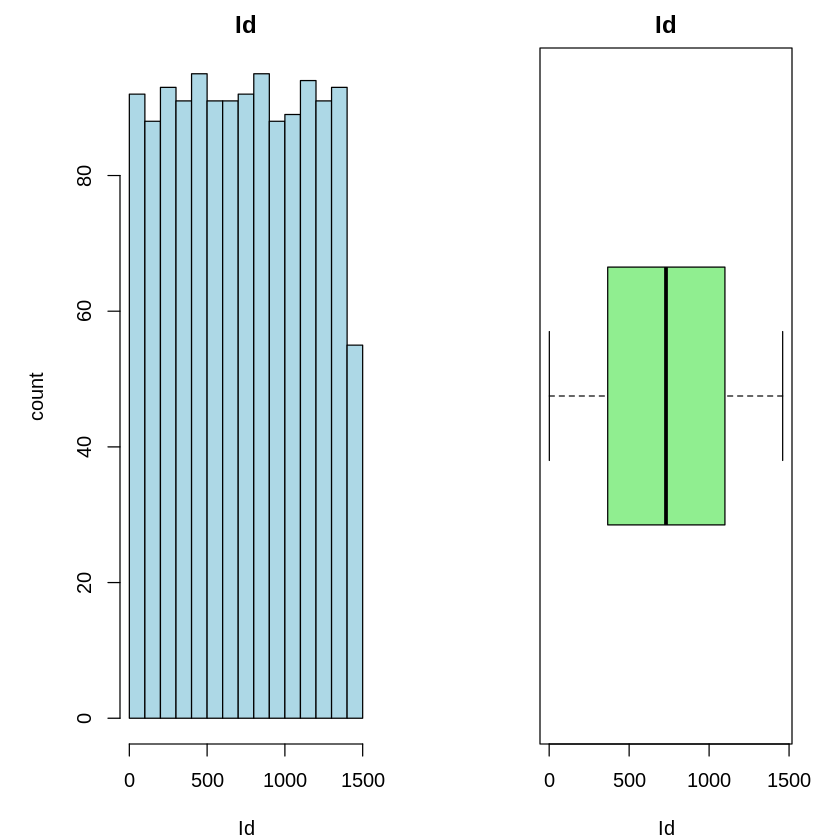

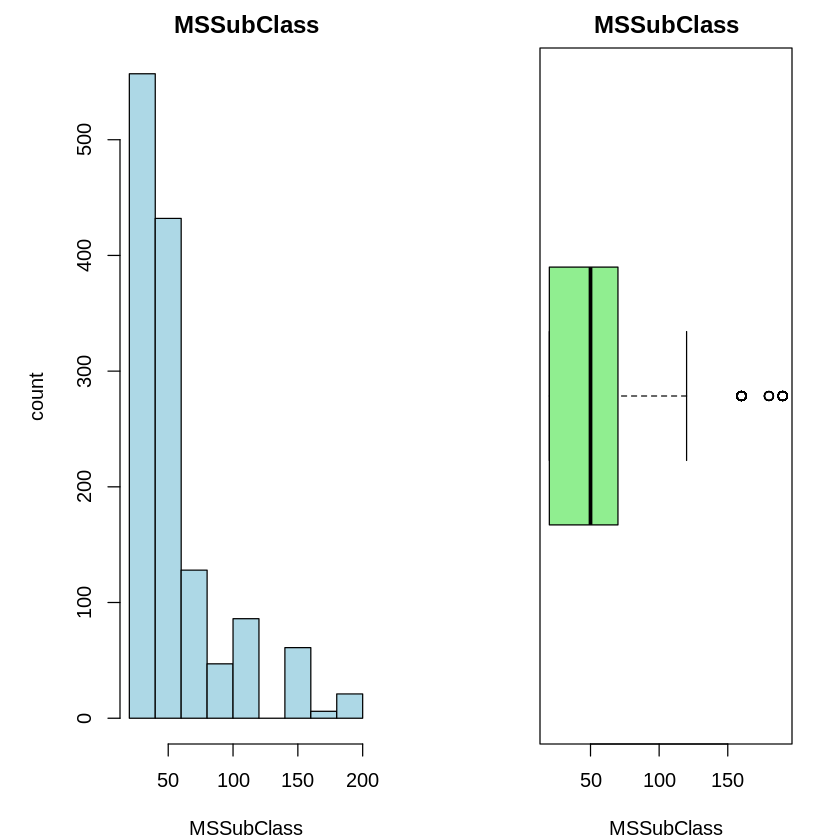

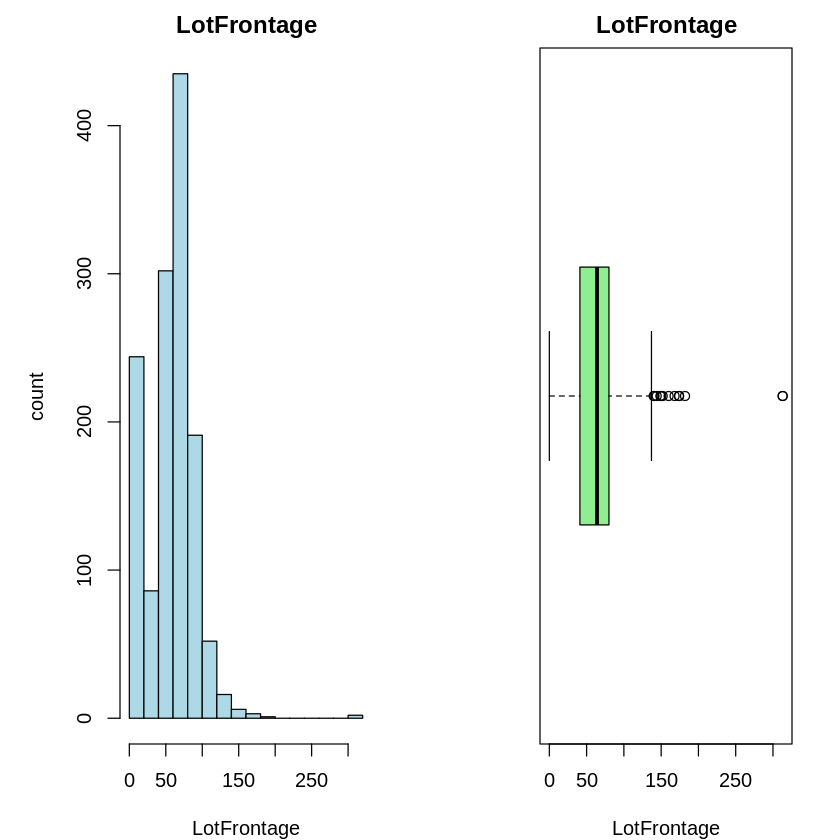

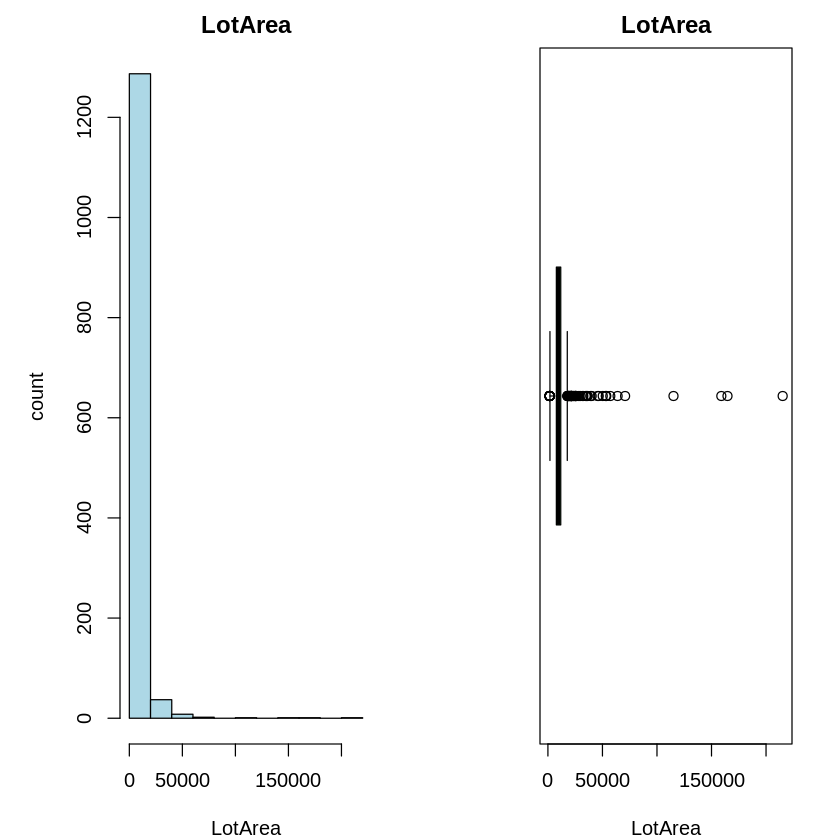

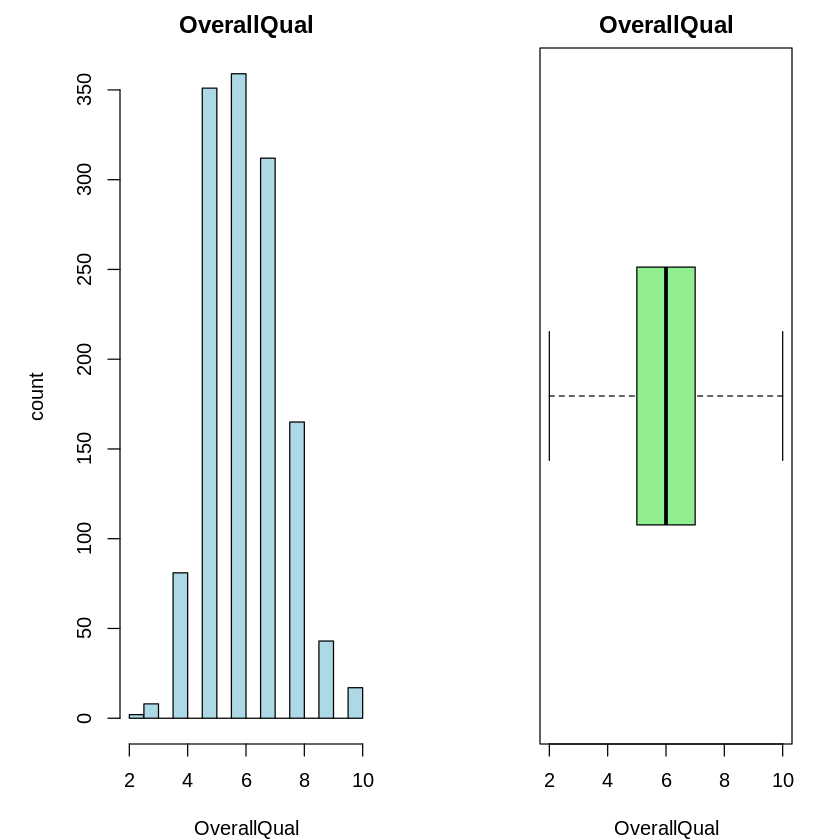

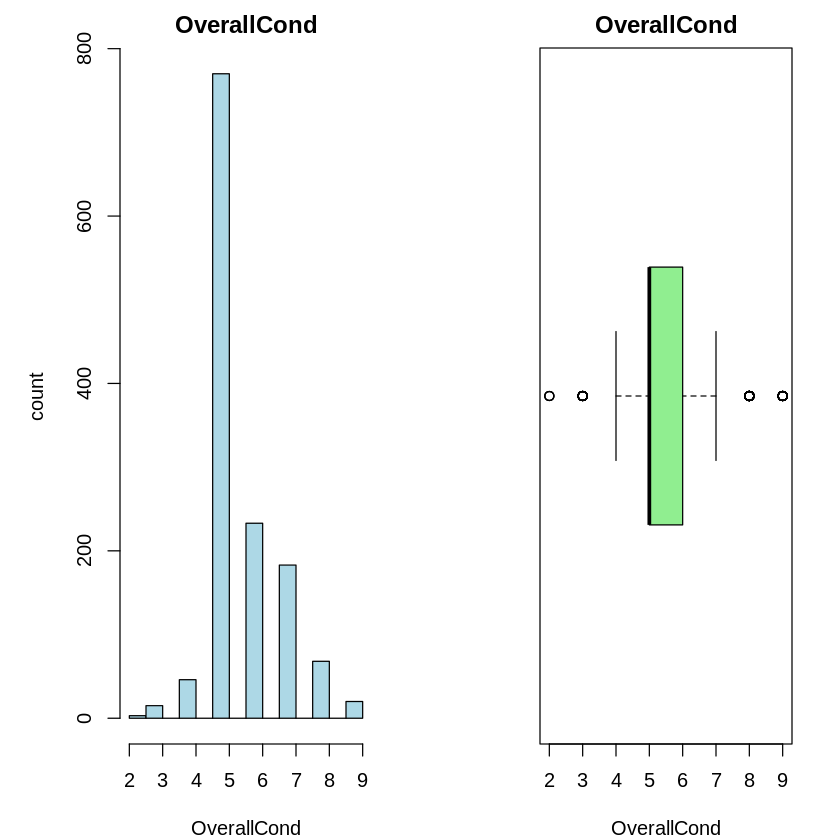

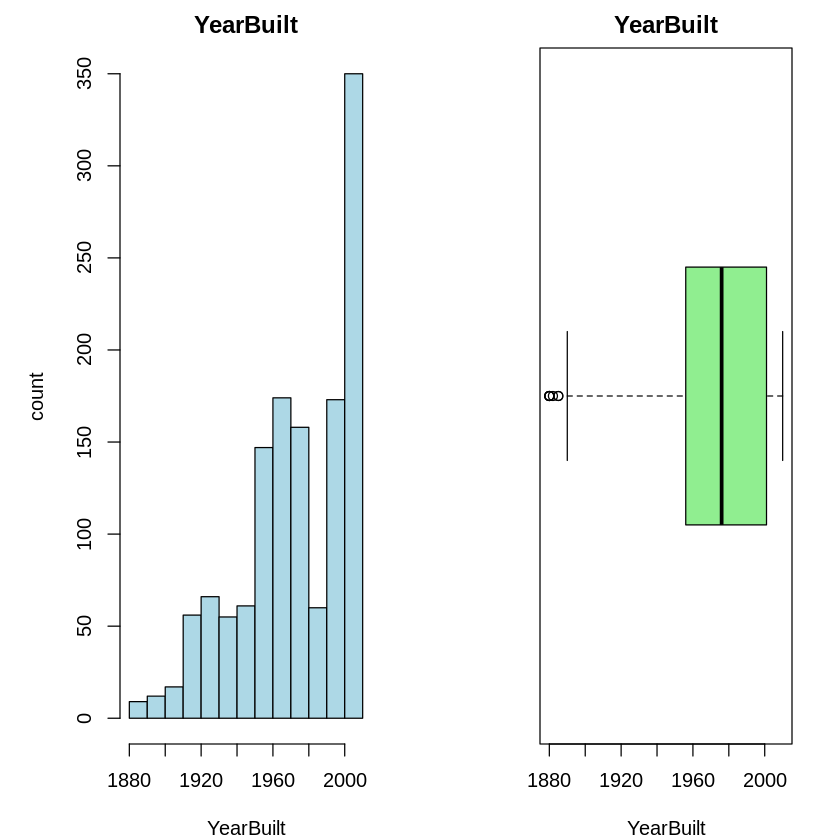

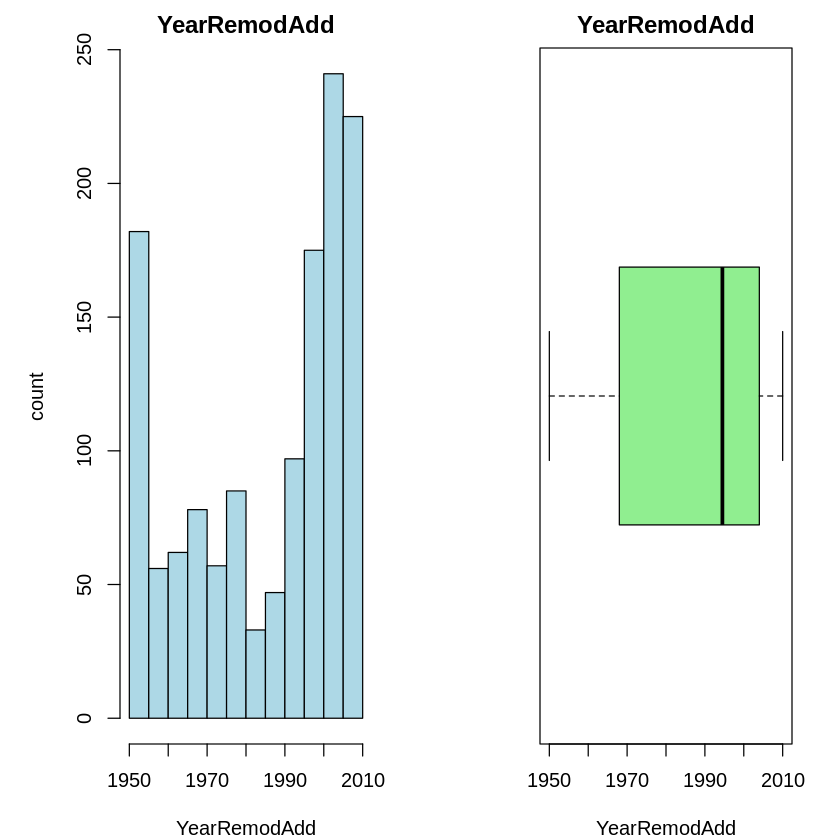

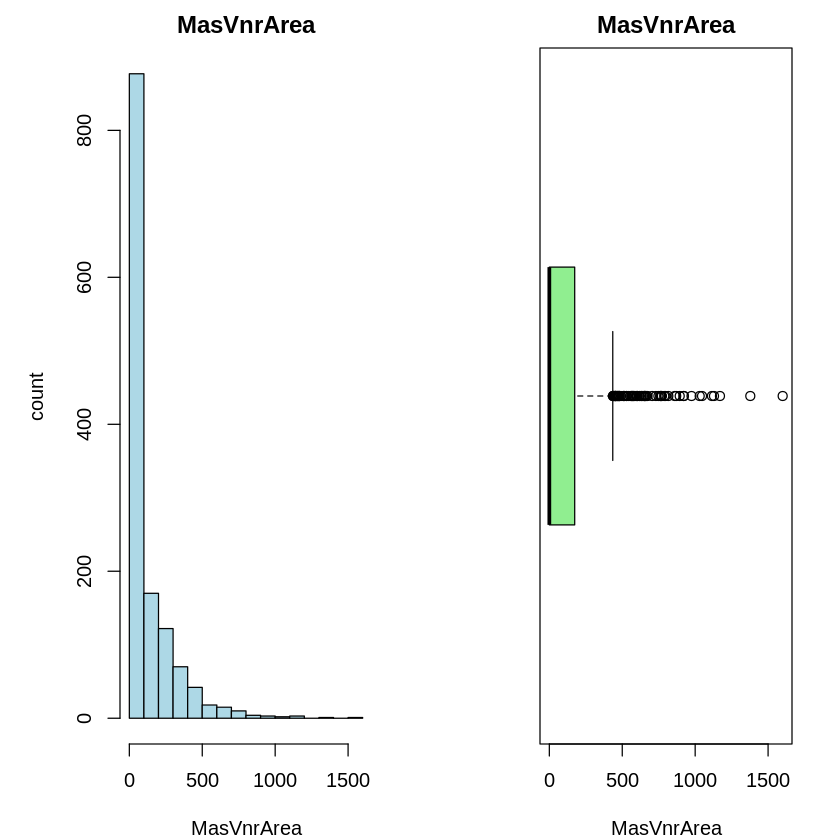

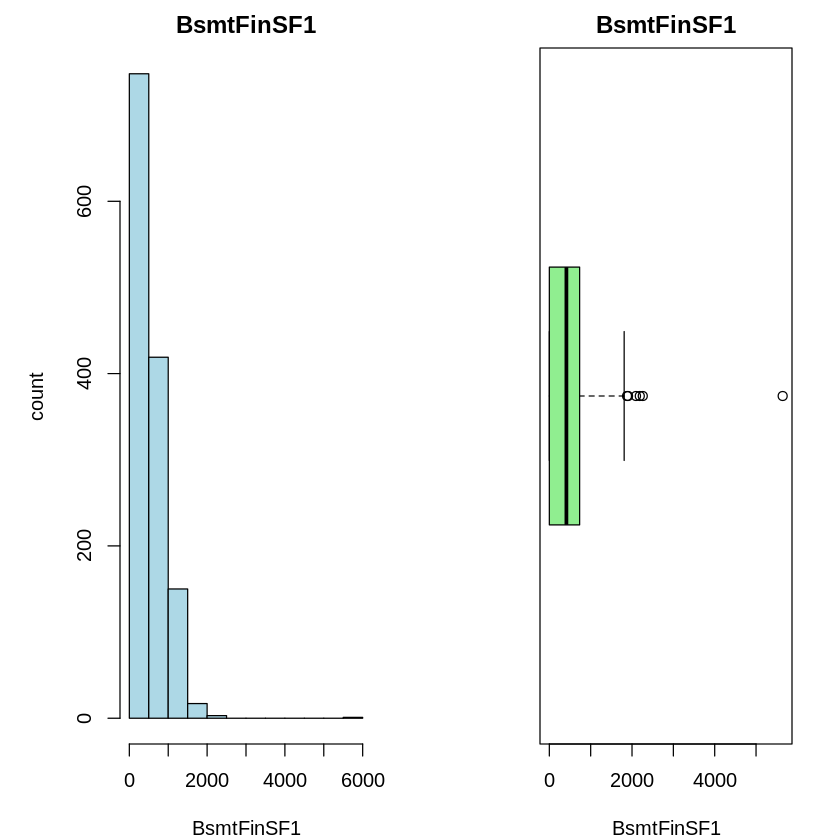

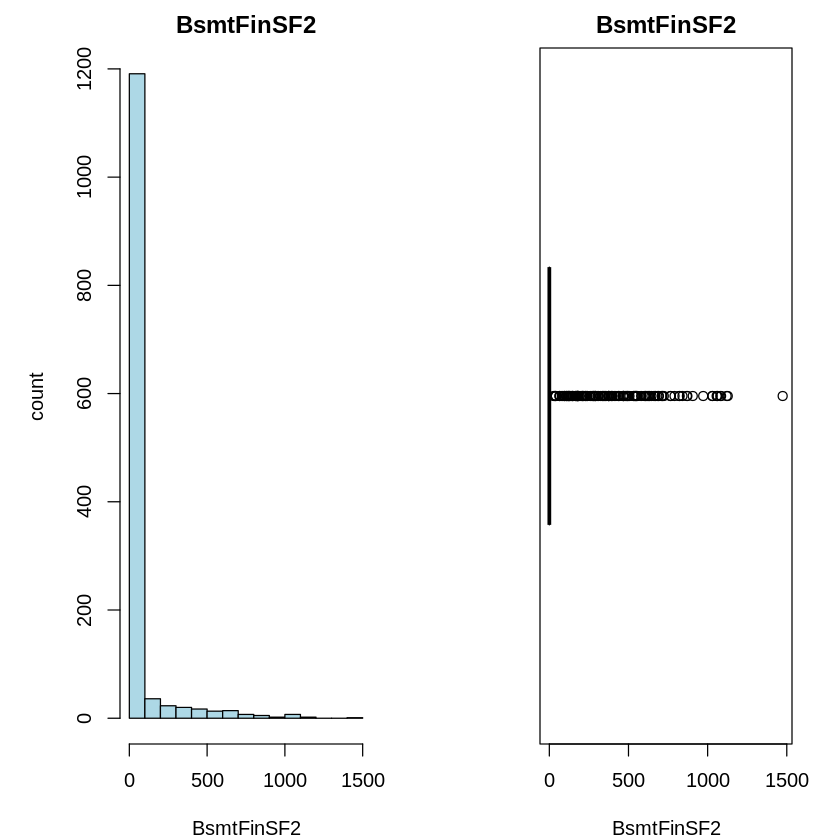

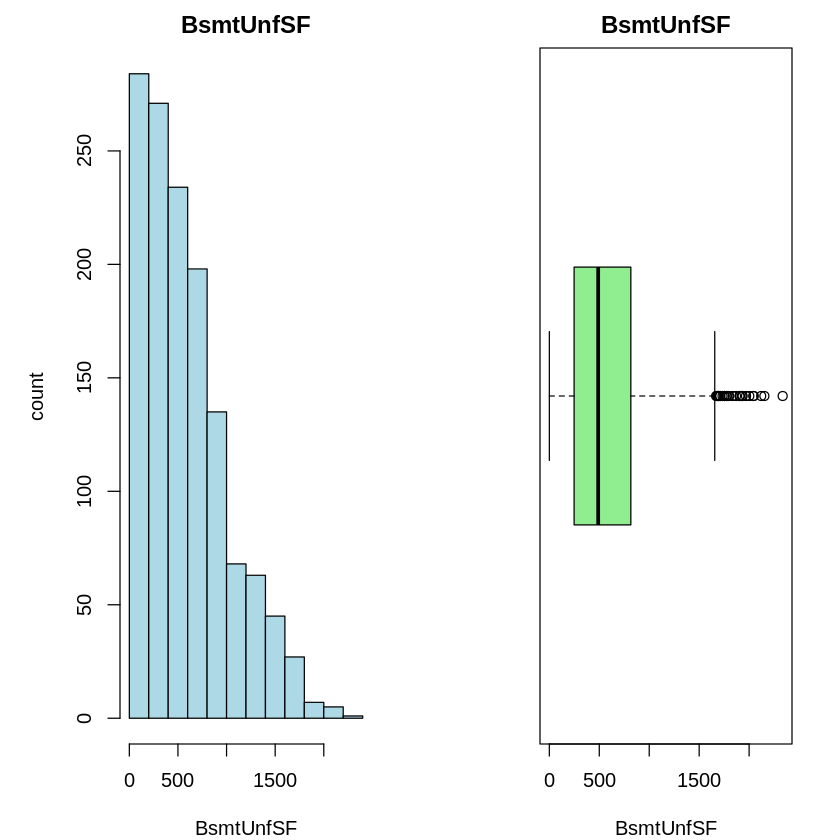

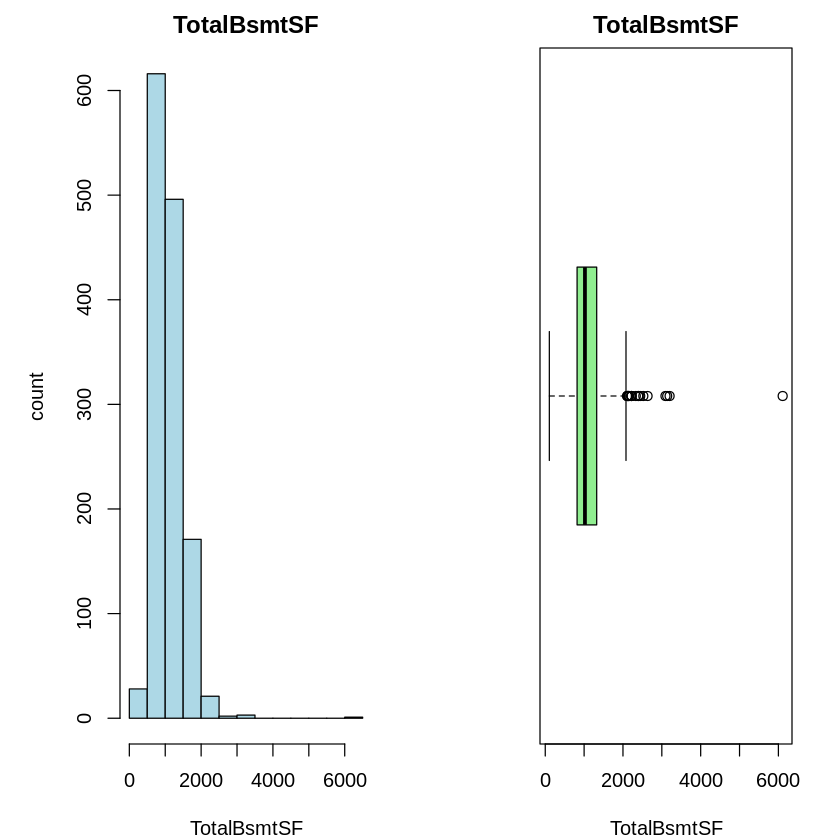

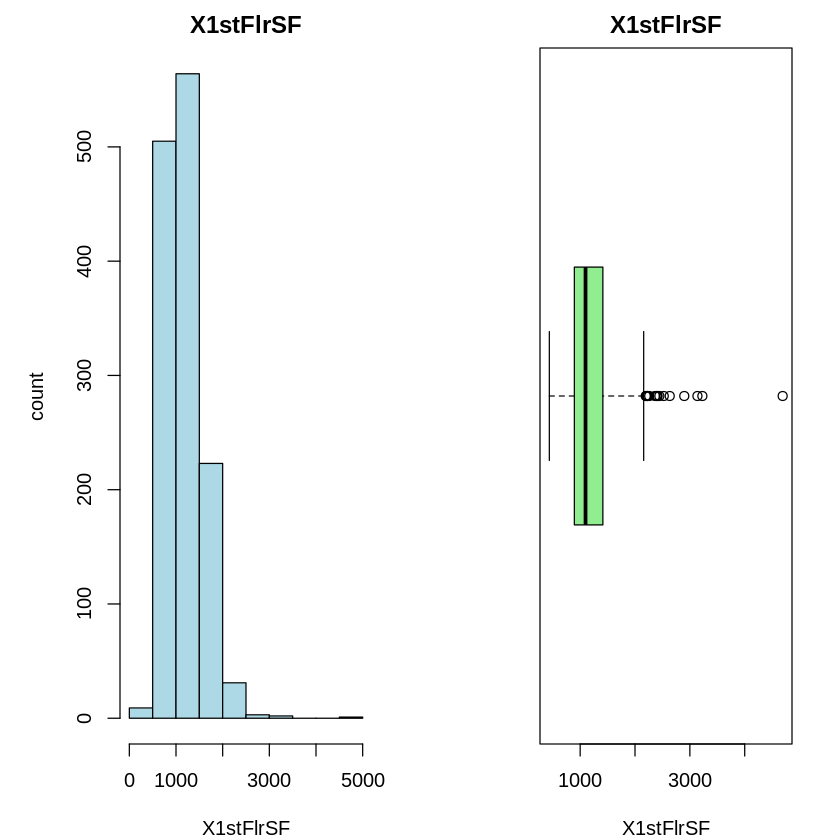

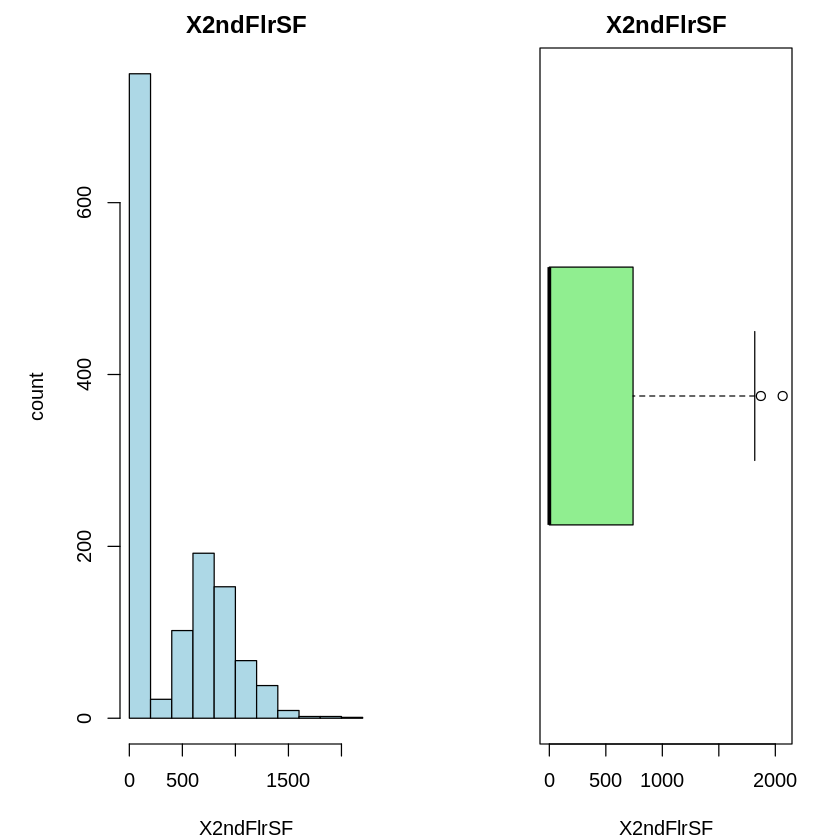

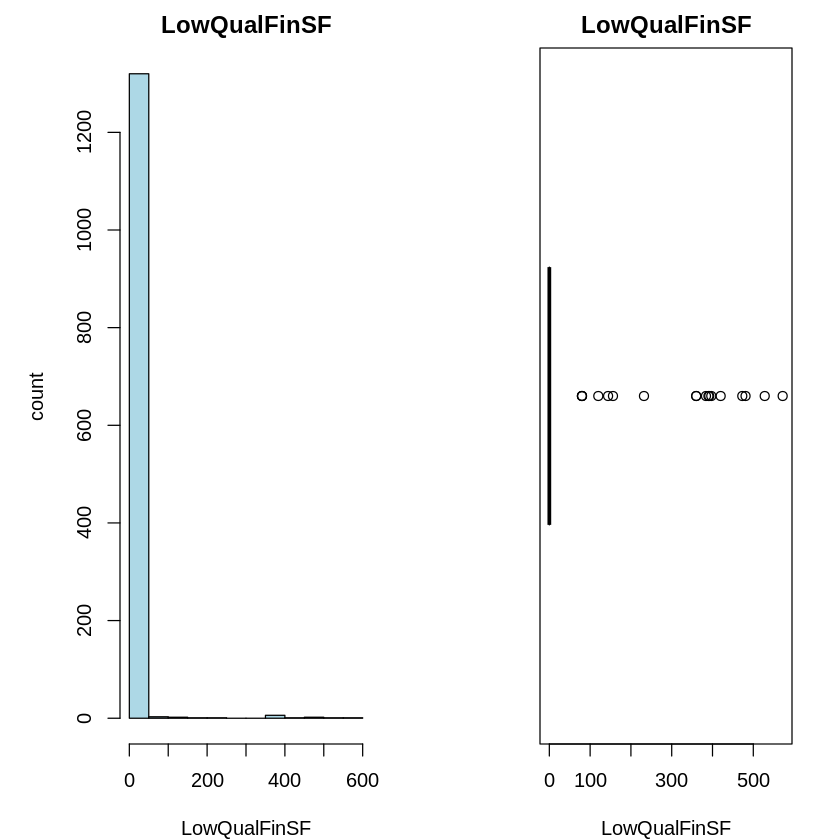

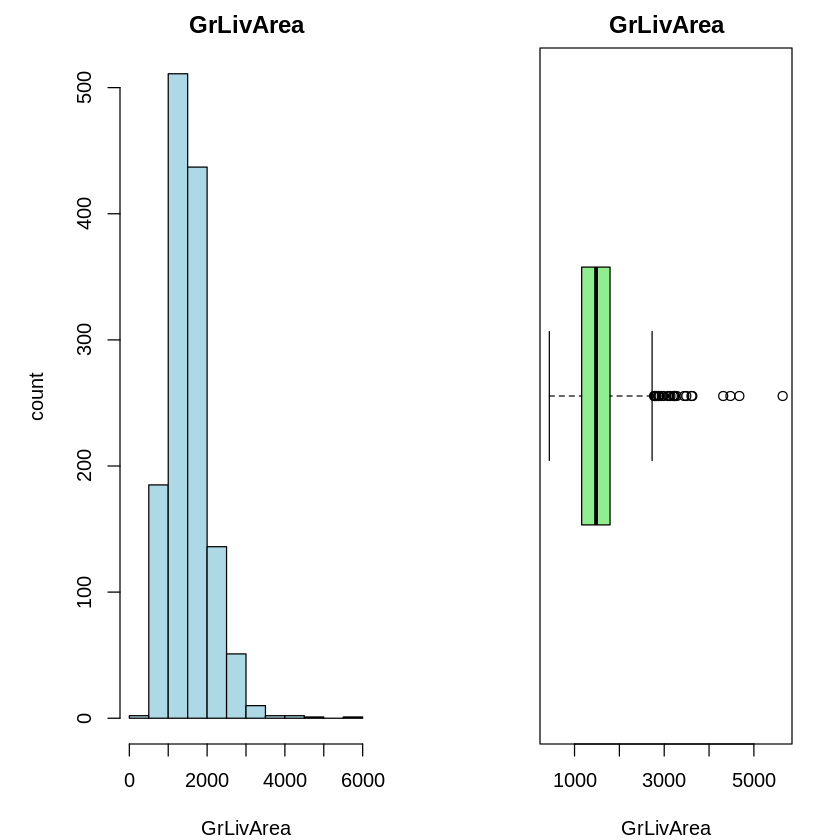

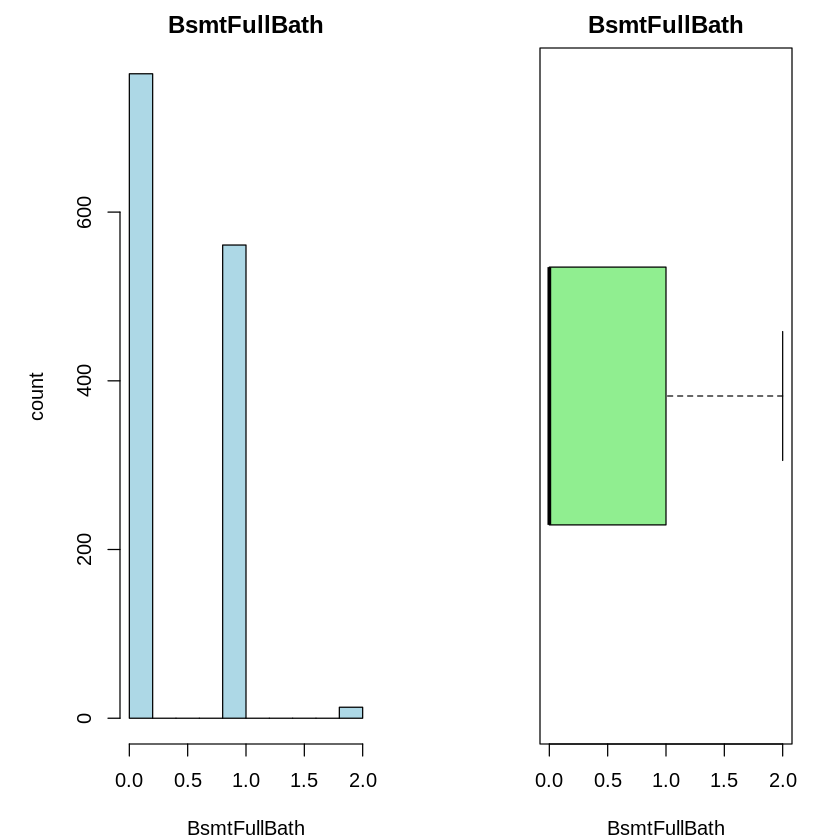

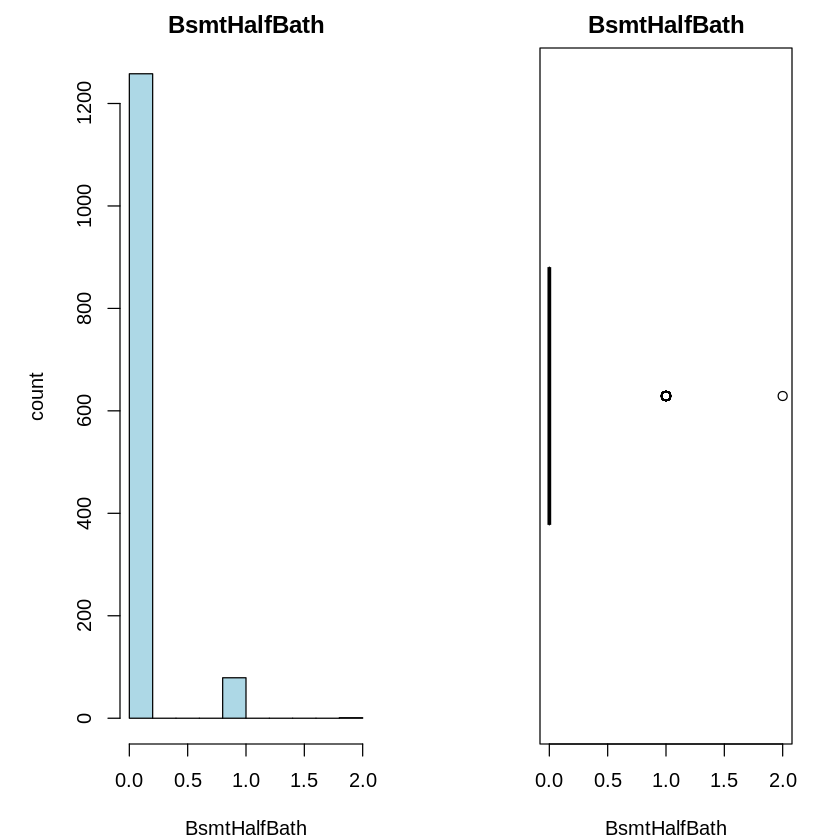

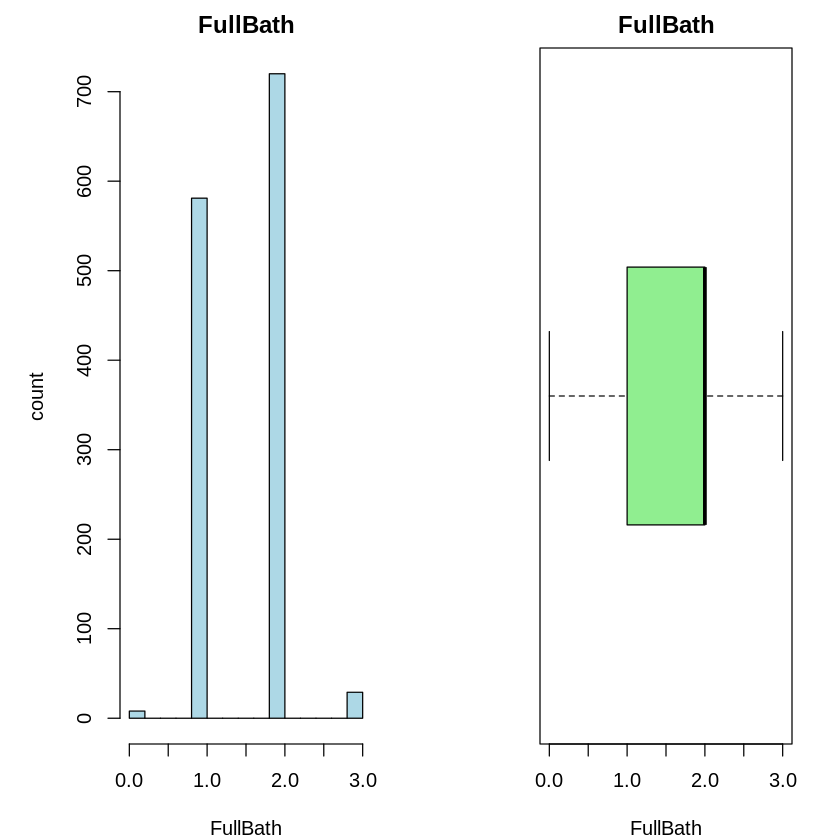

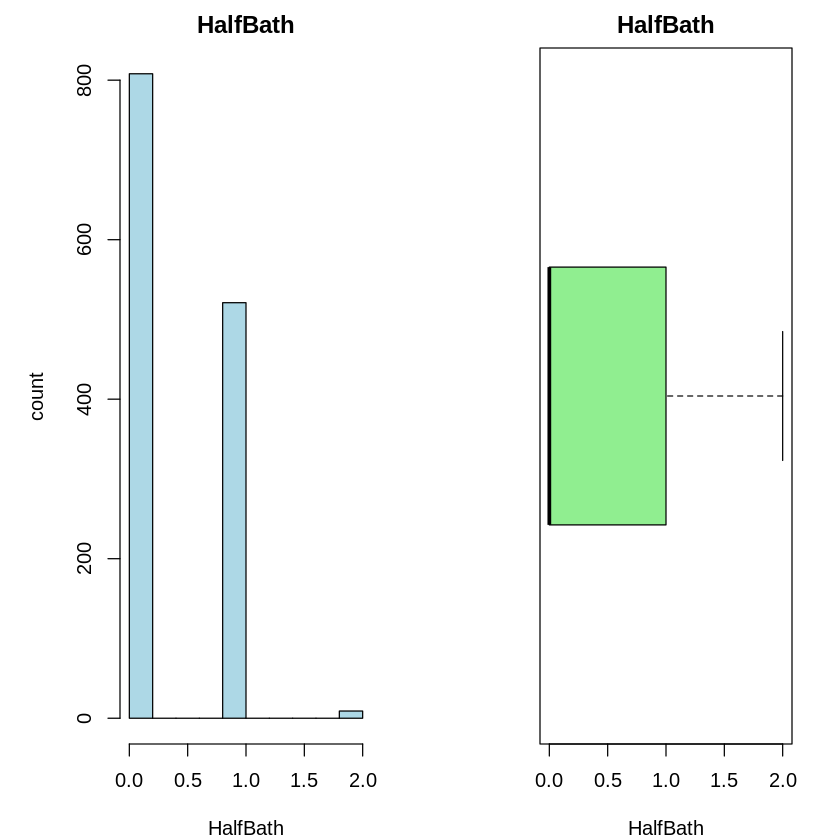

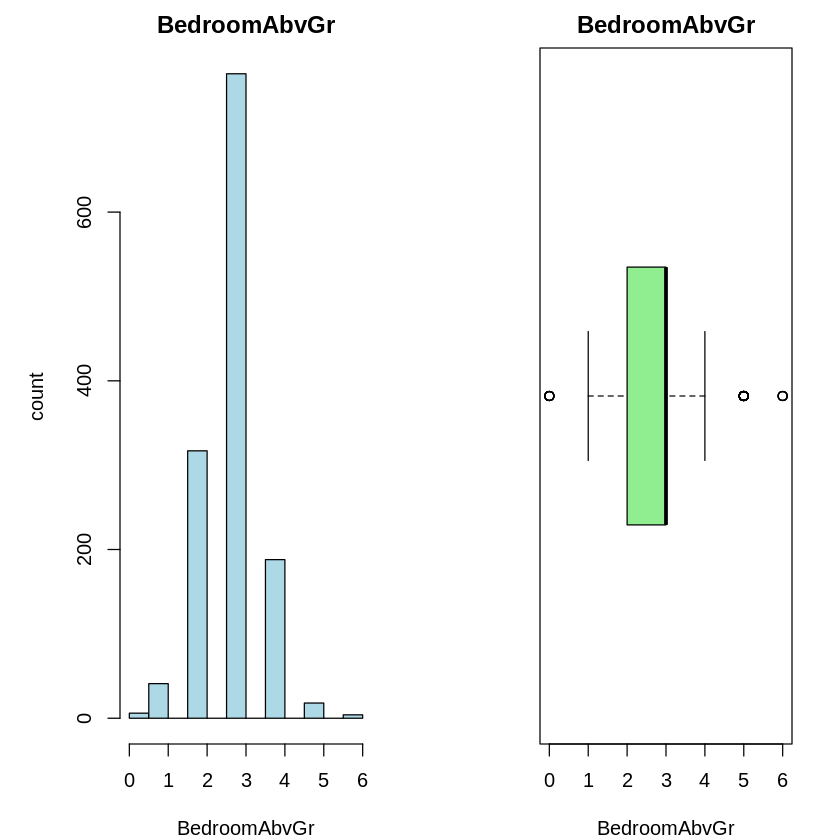

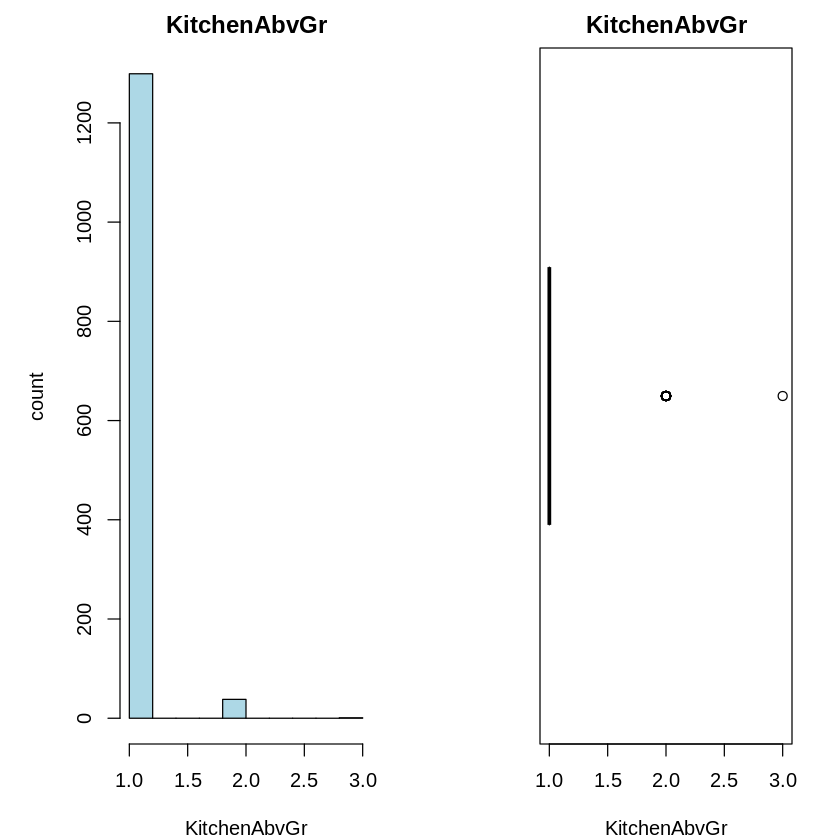

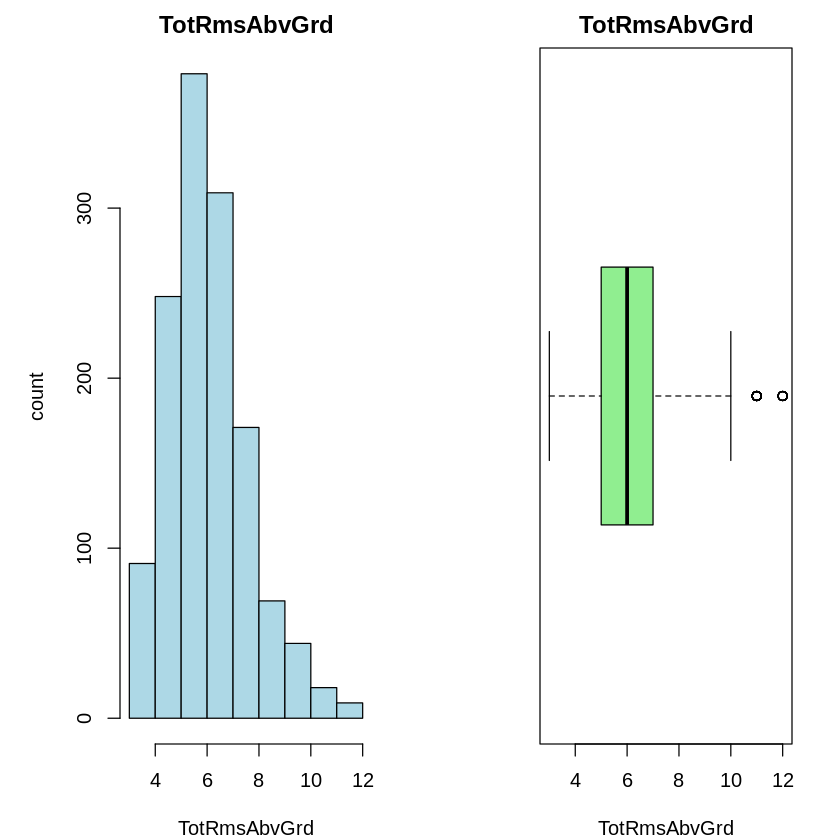

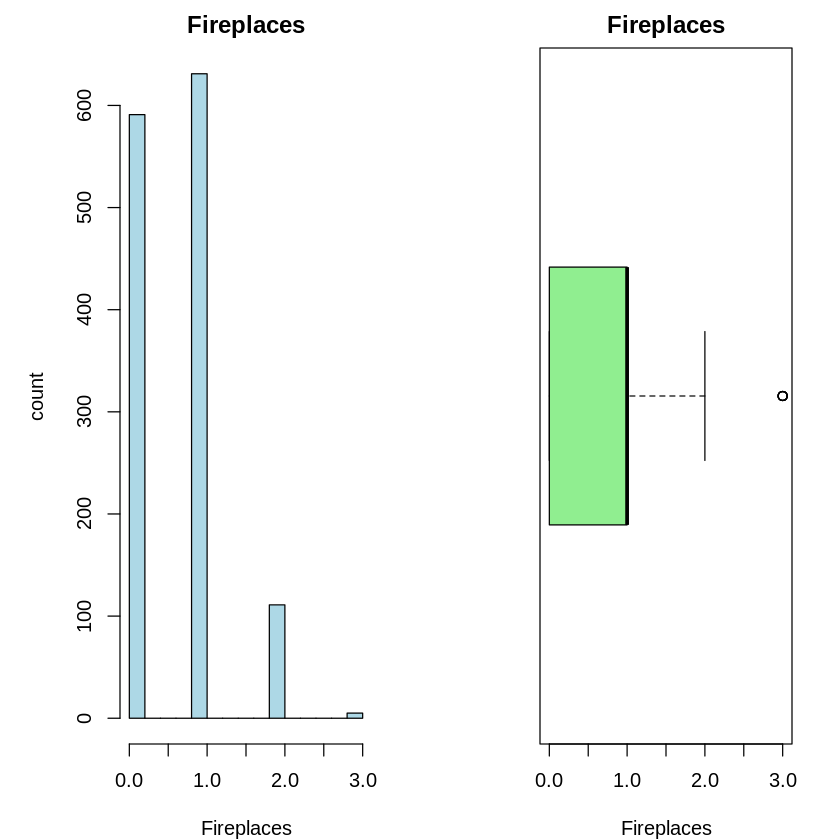

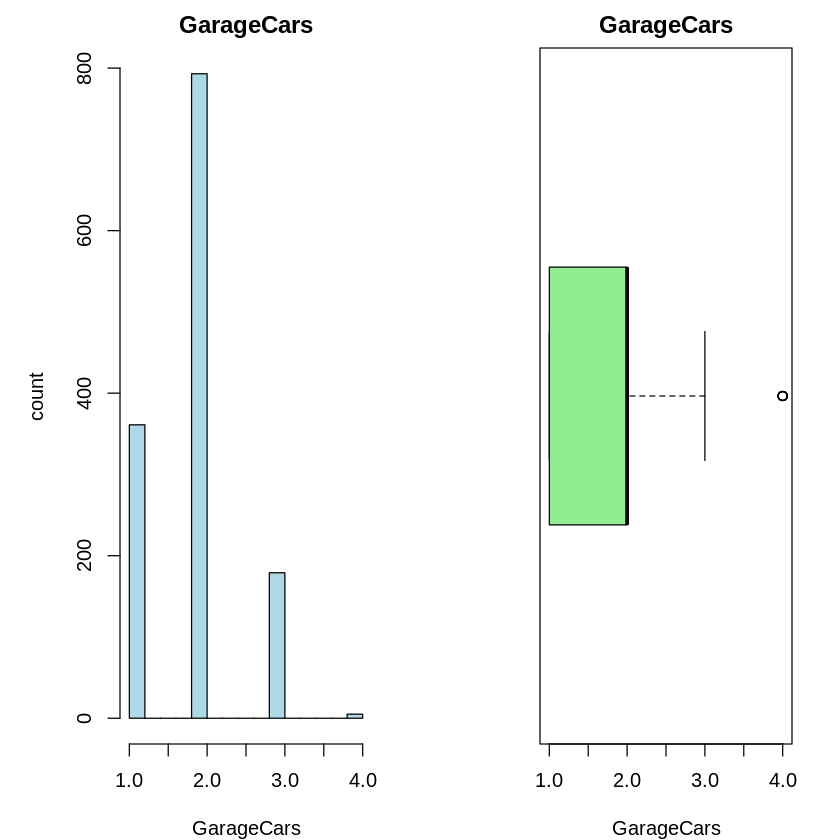

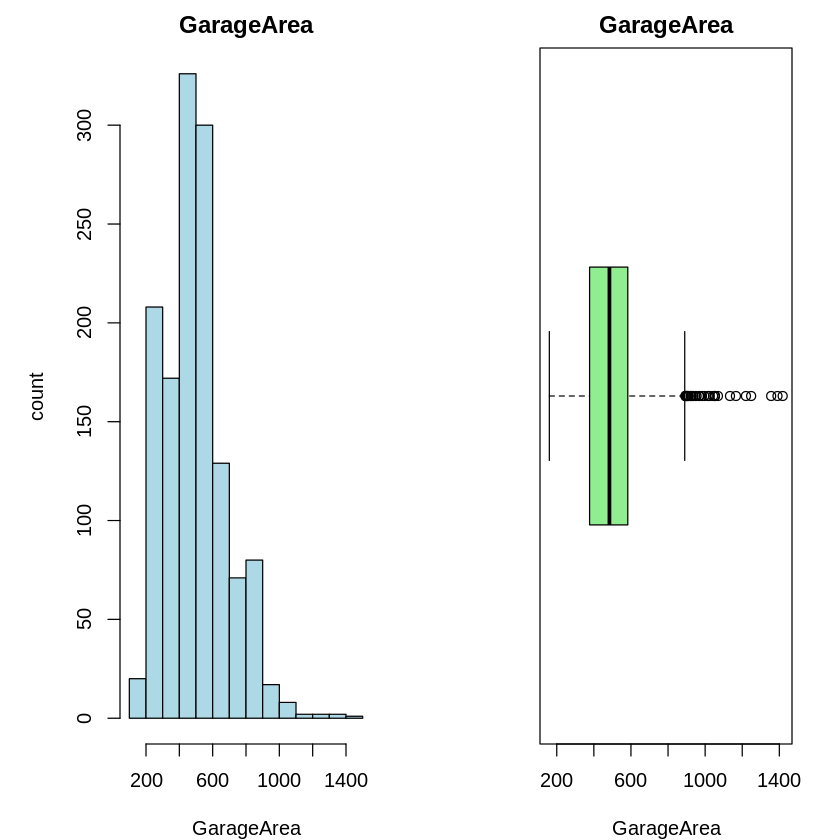

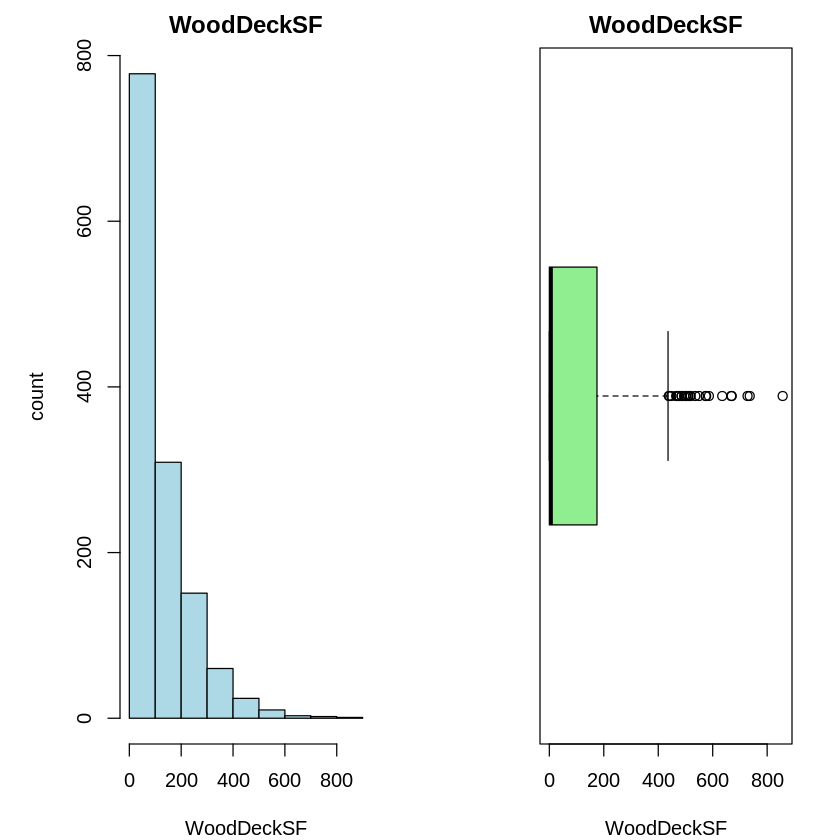

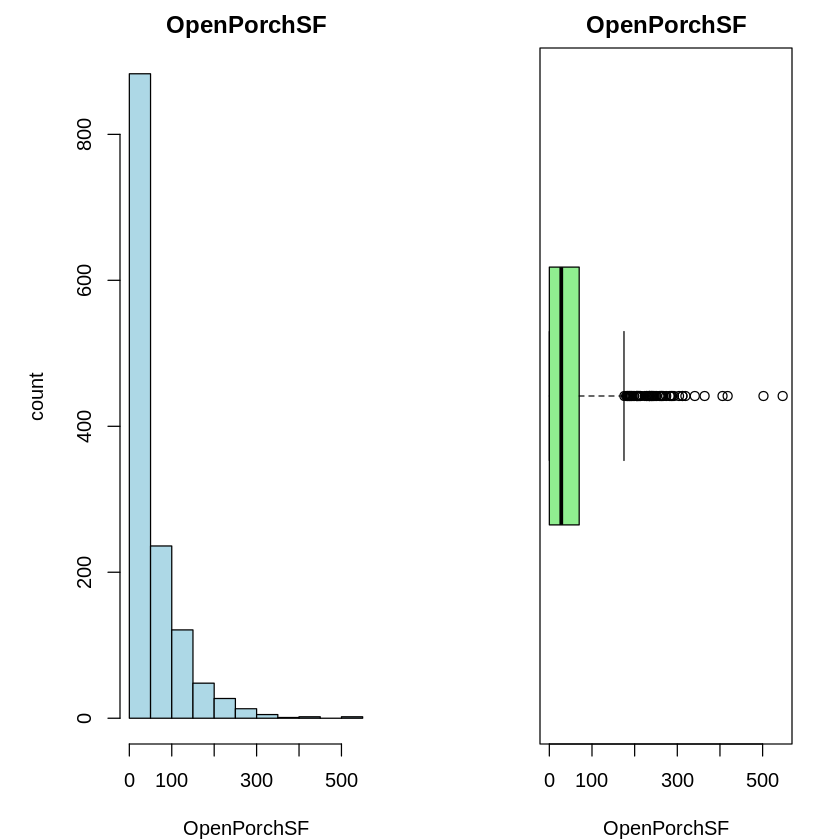

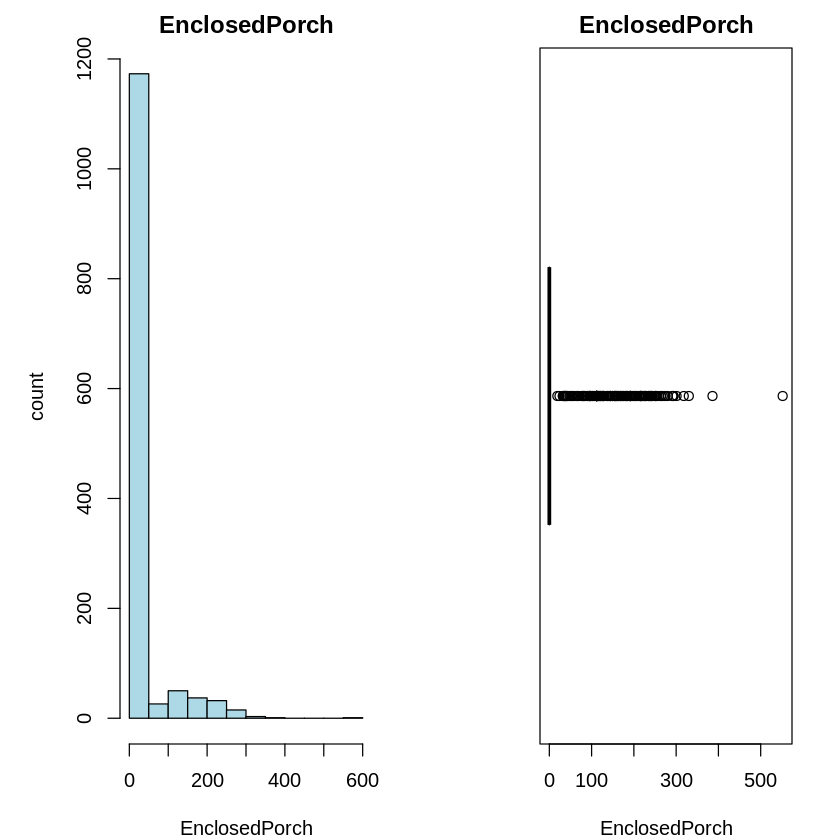

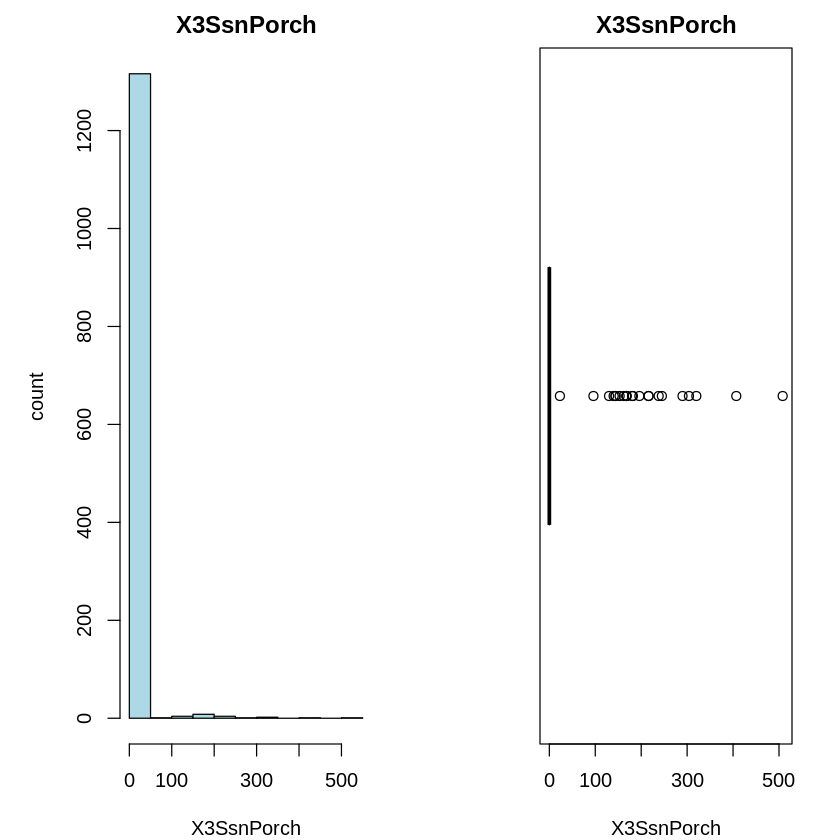

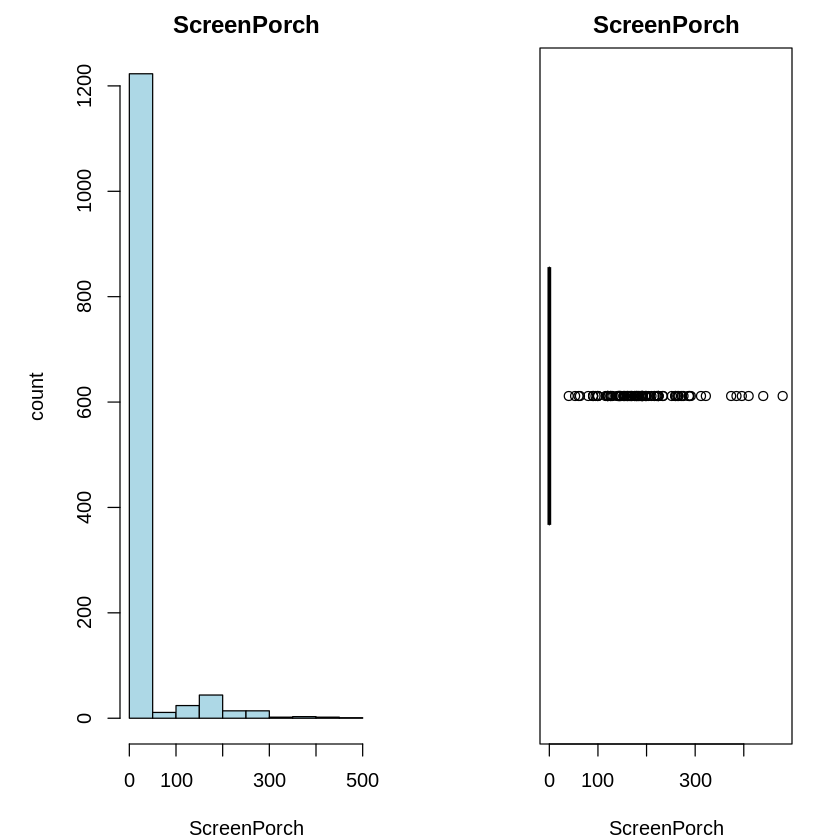

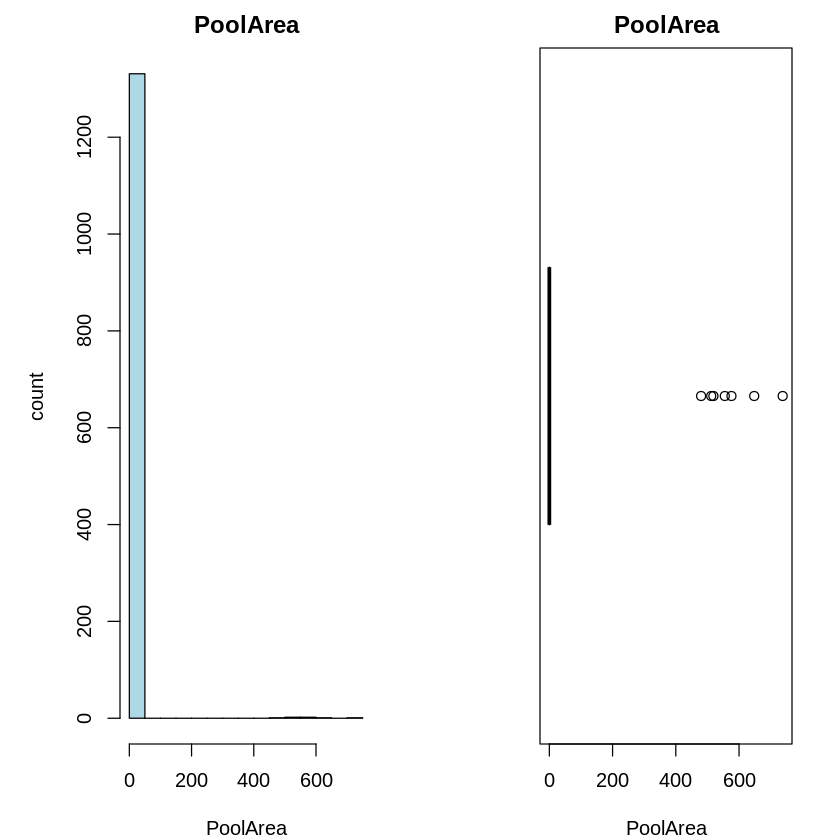

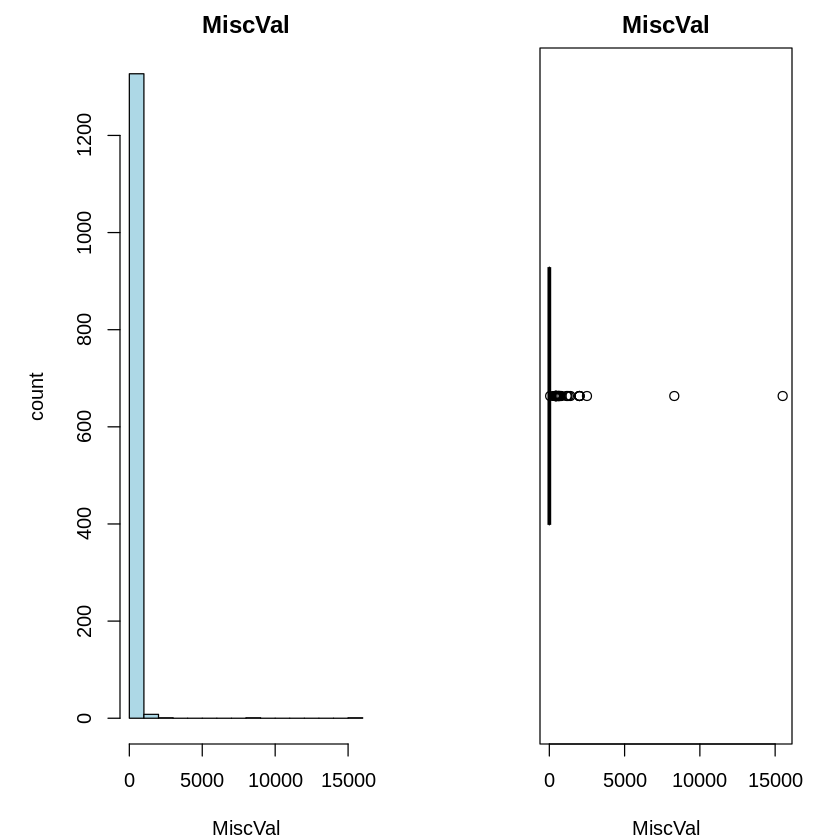

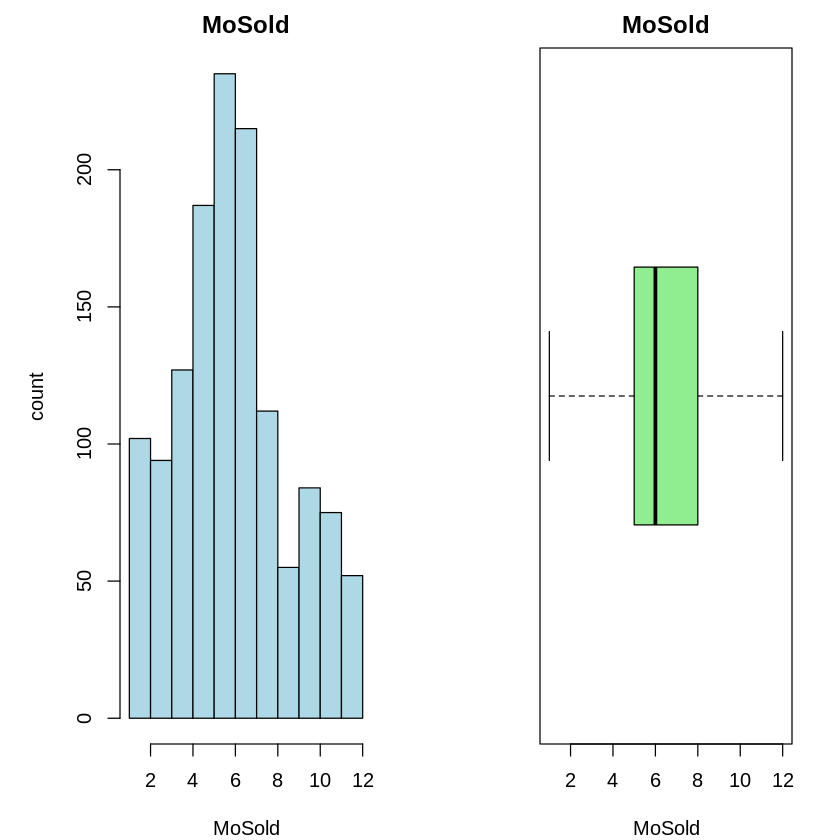

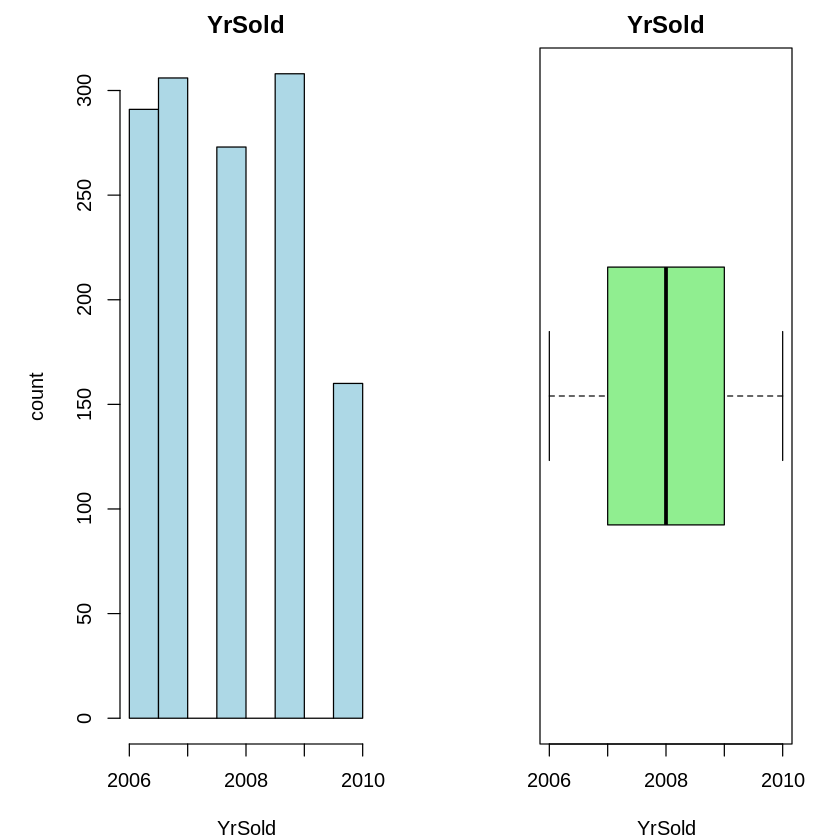

          Column Skewness
1             Id     0.00
2     MSSubClass     1.39
3    LotFrontage     0.28
4        LotArea    11.92
5    OverallQual     0.31
6    OverallCond     0.90
7      YearBuilt    -0.68
8   YearRemodAdd    -0.56
9     MasVnrArea     2.58
10    BsmtFinSF1     1.69
11    BsmtFinSF2     4.14
12     BsmtUnfSF     0.93
13   TotalBsmtSF     2.21
14     X1stFlrSF     1.40
15     X2ndFlrSF     0.77
16  LowQualFinSF    10.55
17     GrLivArea     1.43
18  BsmtFullBath     0.46
19  BsmtHalfBath     3.84
20      FullBath    -0.01
21      HalfBath     0.55
22  BedroomAbvGr    -0.06
23  KitchenAbvGr     5.94
24  TotRmsAbvGrd     0.67
25    Fireplaces     0.57
26    GarageCars     0.20
27    GarageArea     0.81
28    WoodDeckSF     1.48
29   OpenPorchSF     2.25
30 EnclosedPorch     3.20
31    X3SsnPorch    10.09
32   ScreenPorch     3.91
33      PoolArea    14.17
34       MiscVal    24.60
35        MoSold     0.21
36        YrSold     0.11
37     SalePrice     1.94


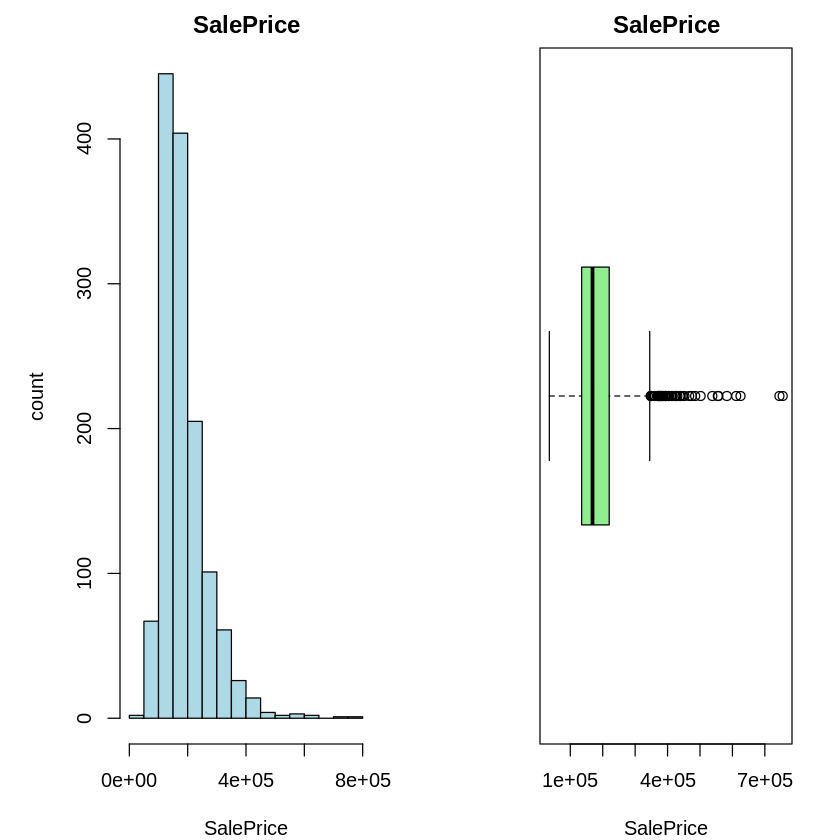

In [ ]:
  # Định nghĩa hàm để vẽ biểu đồ và tính độ lệch của cột dữ liệu
  plot_distribution <- function(data, col) {
    # Tính độ lệch của cột dữ liệu và làm tròn đến 2 chữ số thập phân
    skewness <- round(skewness(data[[col]], na.rm = TRUE), 2)

    # Thiết lập kích thước của đồ thị
    par(mfrow=c(1, 2), mar=c(4, 5, 2, 2))  # Thiết lập lưới 1x2 và margin

    # Vẽ biểu đồ histogram ở ô đầu tiên của lưới 1x2
    hist(data[[col]], main=col, xlab=col, ylab='count', col='lightblue')

    # Vẽ biểu đồ boxplot ở ô thứ hai của lưới 1x2
    boxplot(data[[col]], horizontal=TRUE, col='lightgreen', main=col, xlab=col)

    return(skewness)
  }

  # Tạo dataframe để lưu thông tin về độ lệch của các cột dữ liệu
  distribution_info <- data.frame(Column=character(), Skewness=numeric(), stringsAsFactors=FALSE)

  # Lặp qua từng cột số trong danh sách num_cols
  for (col in num_cols) {
    skewness <- plot_distribution(data, col)
    distribution_info <- rbind(distribution_info, data.frame(Column=col, Skewness=skewness))
  }

  # In ra thông tin về độ lệch của các cột dữ liệu
  print(distribution_info)


**Nhận Xét**

MSSubClass: Lớp xây dựng - miêu tả loại nhà và chức năng liên quan cho thấy đa số các loại nhà dưới 75 được lựa chọn rất nhiều

LotFrontage: Chiều rộng mặt tiền của lô đất đến nhà cũng là yếu tố quan trọng, đa số các lựa chọn nhà gần đường phố nhưng vẫn phải có một khoảng sân hay lề đường rộng.

OverallQual: Chất lượng tổng thể của ngôi nhà, đánh giá từ 1 đến 10 có phân phối tương đối chuẩn.

OverallCond: Đánh giá tổng thể về điều kiện của ngôi nhà, từ 1 đến 10 có phân phối tương đối chuẩn.

YearBuilt: Số lượng xây ngôi nhà có dấu hiệu tăng theo thời gian

YearRemodAdd: Số lượng sửa chửa nâng cấp cũng có dấu hiệu tăng theo thời gian, tuy nhiên vào 1950 lại đột ngột tăng cao có thể do tác động khu vực lớn nào đó.

Các cột lưu trữ số lượng các phòng như số phòng tắm ở tầng hầm và trên mặt đất (BsmtFullBath, BsmtHalfBath, FullBath, HalfBath), số phòng ngủ (BedroomAbvGr),
số nhà bếp (KitchenAbvGr), tống số phòng (TotRmsAbvGrd) và các số lượng vật dụng như lò sưởi (Fireplaces), số lượng ô tô garage có thể chứa (GarageCars) là các cột phân loại rất rõ ràng.

MoSold: Tháng bán nhà tập trung tăng cao vào giữa năm và hạ nhiệt vào cuối năm nên cột này có phân phối tương đối chuẩn

YrSold: Cứ cách 1-2 năm thì mọi người sẽ mua nhà nên cột này gân như đạt phân phối chuẩn.

SalePrice: Giá bán của ngôi nhà có sự biến động trong phạm vi lớn nhưng vẫn tập trung trong khoảng 100000 đến 250000.

**Kết luận**
- **Các cột lưu trữ về diện tích khu vực, tầng hầm, không gian như LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, GarageArea có sự biến động trong phạm vi lớn nên cần chuẩn hóa log.**
- **Phấn lớn không yếu thích ngôi nhà có diện tích của sân gỗ (WooDeckSF), diện tích hiên đậu (OpenPorchSF), Diện tích của hiên đóng kín (EnclosedPorch), Diện tích của hiên 3 mùa (3SsnPorch), Diện tích của hiên che chắn (ScreenPorch), Diện tích của hồ bơi (PoolArea) lớn nên cũng cho các cột này có sự biến động lớn cần chuẩn hóa log.**

- **MiscVal: Giá trị của các tính năng khác có sự biến động lớn cần chuẩn hóa log**



### 3.2.2 Trực Quan Biến Phân Loại (Categorical)

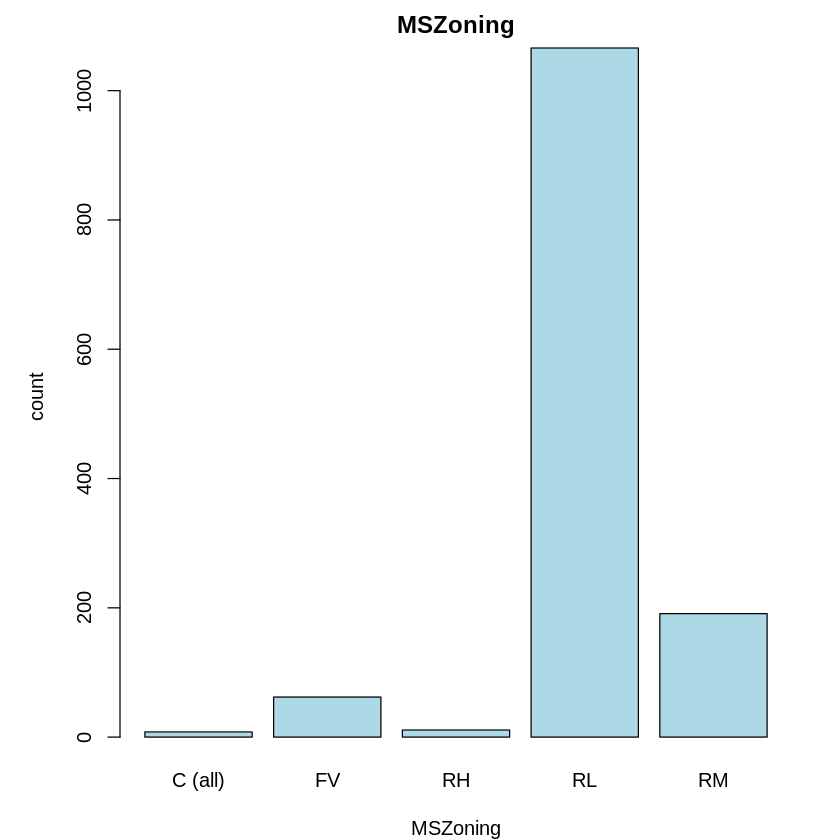

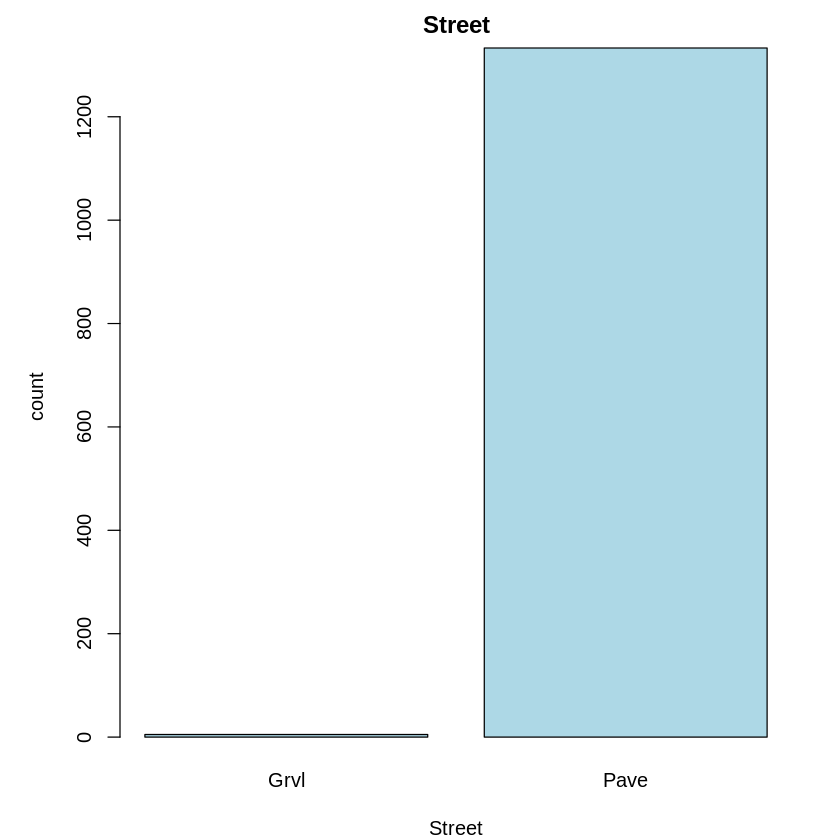

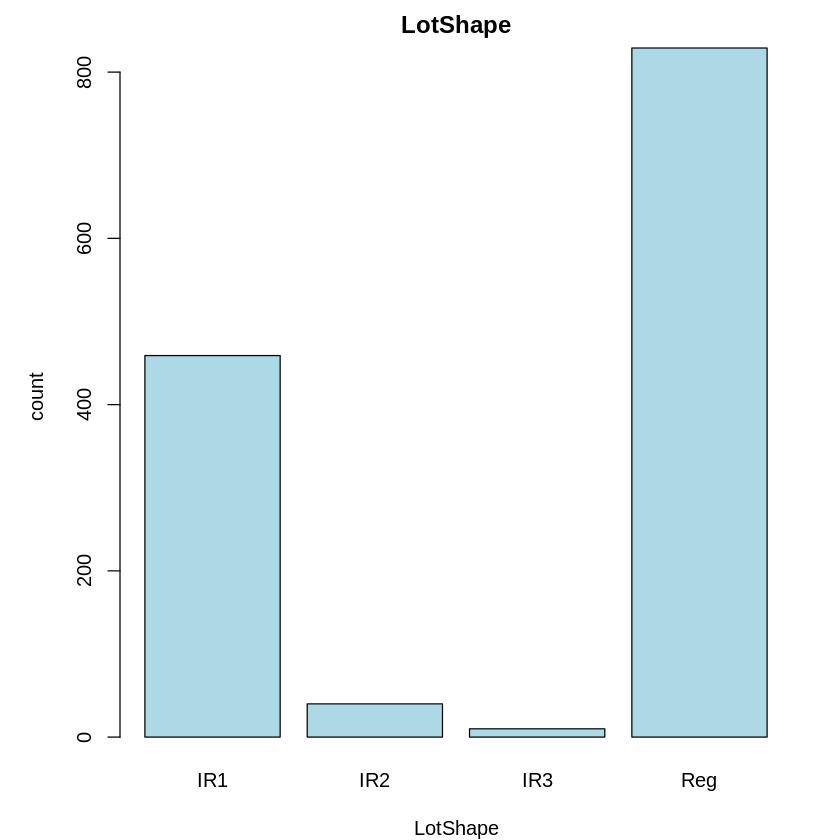

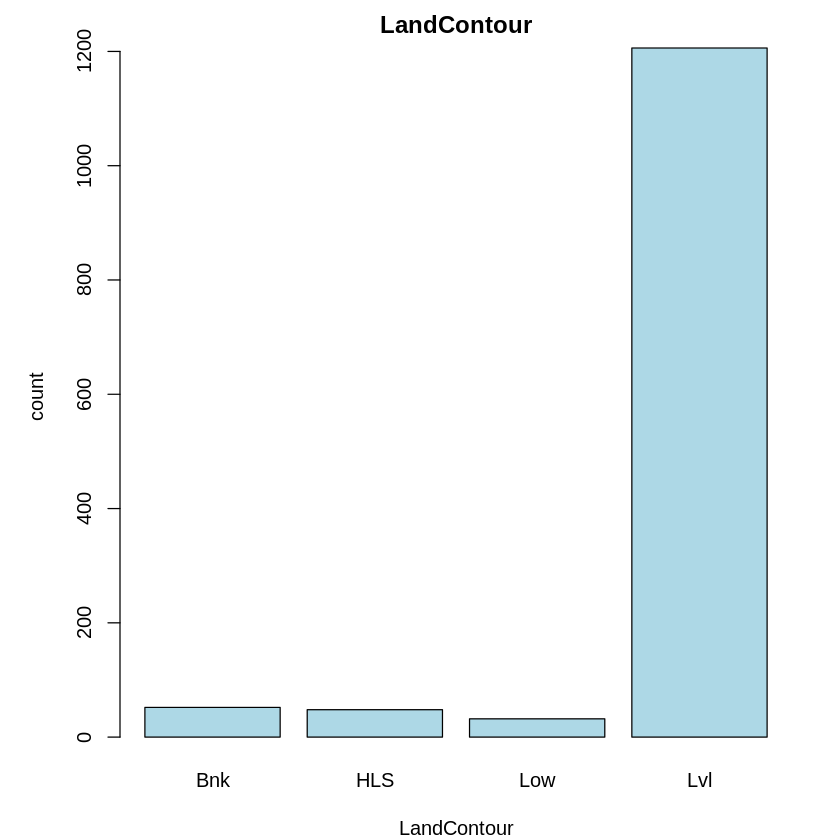

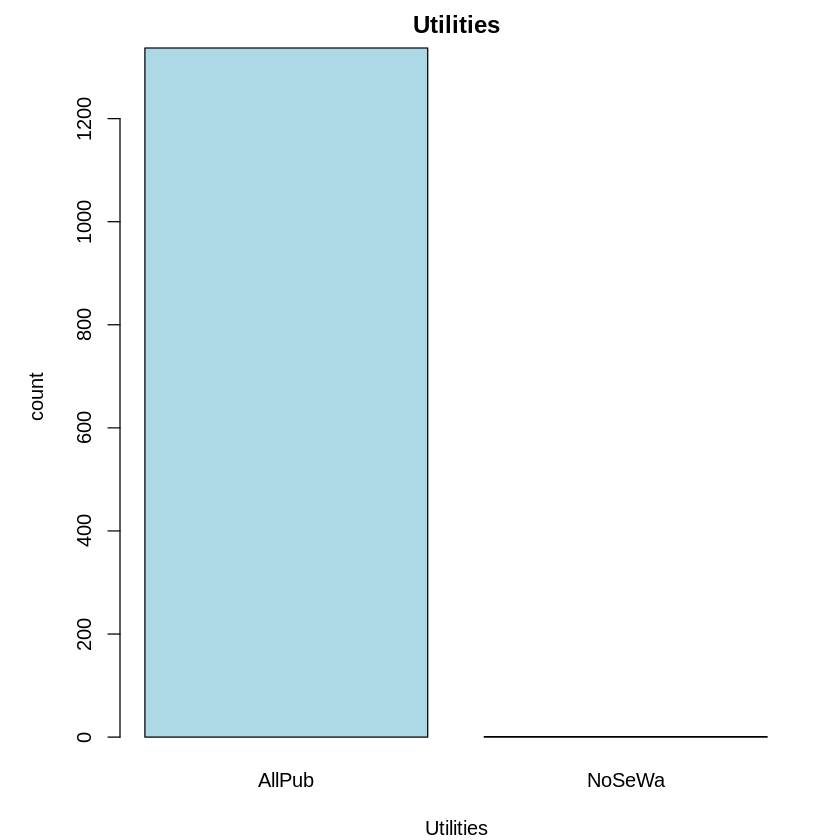

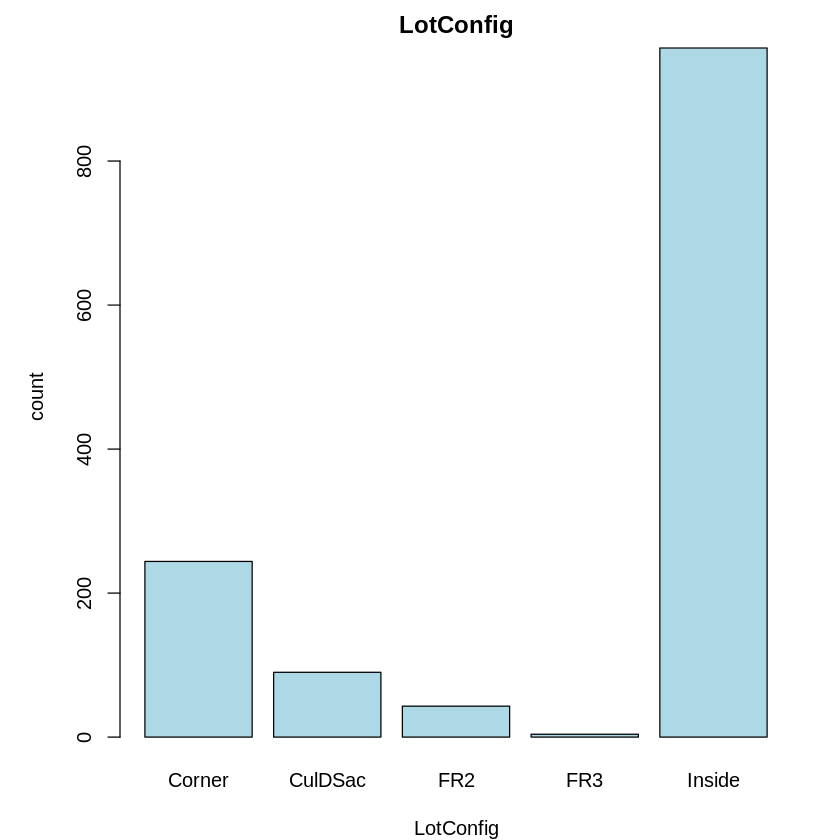

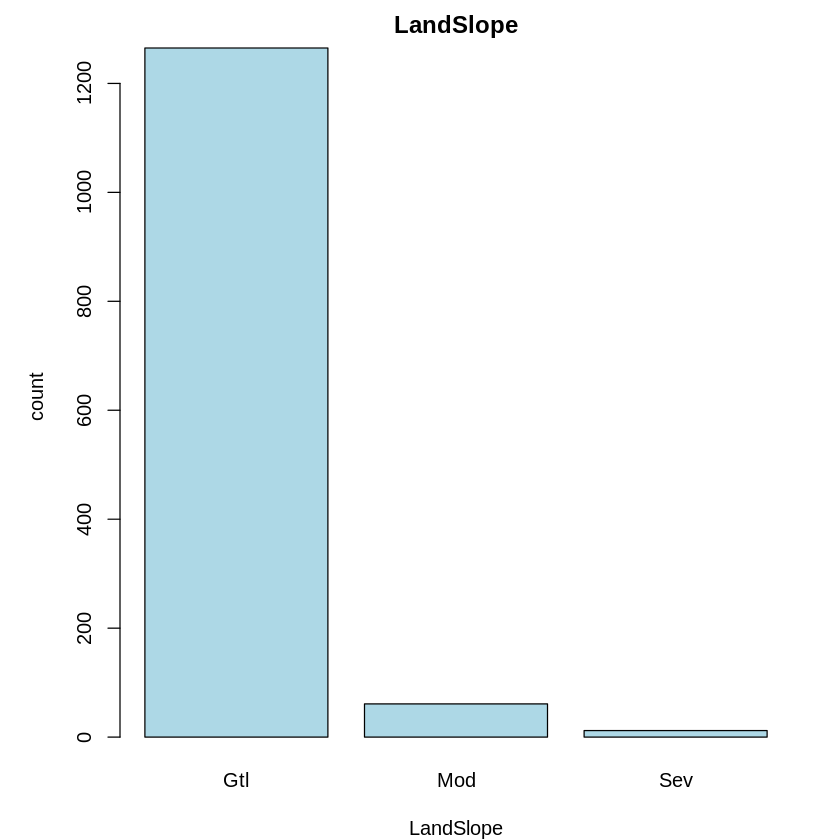

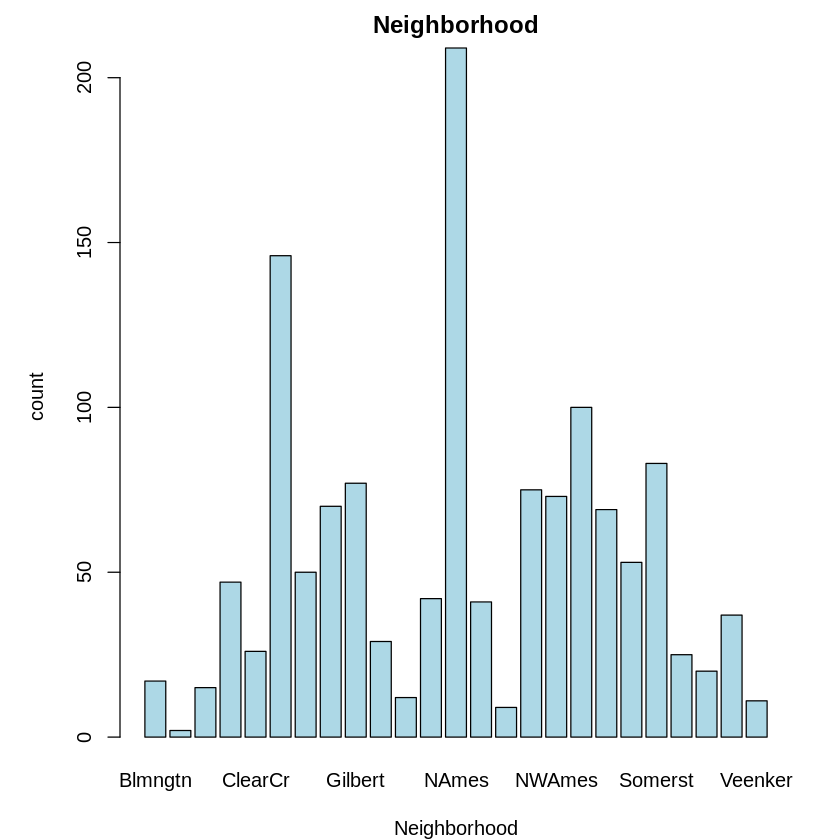

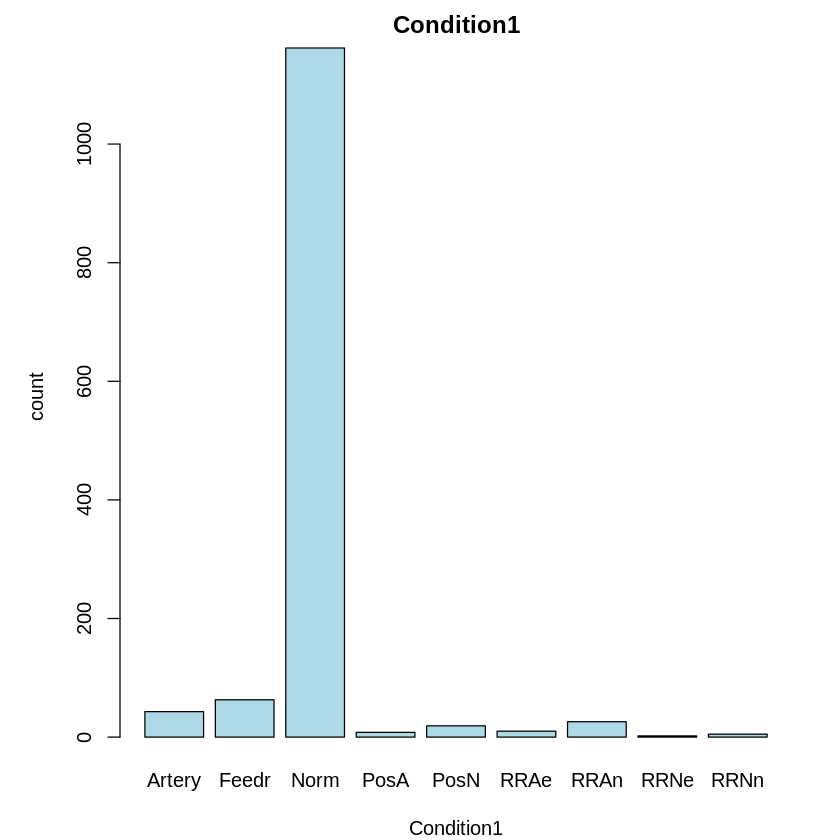

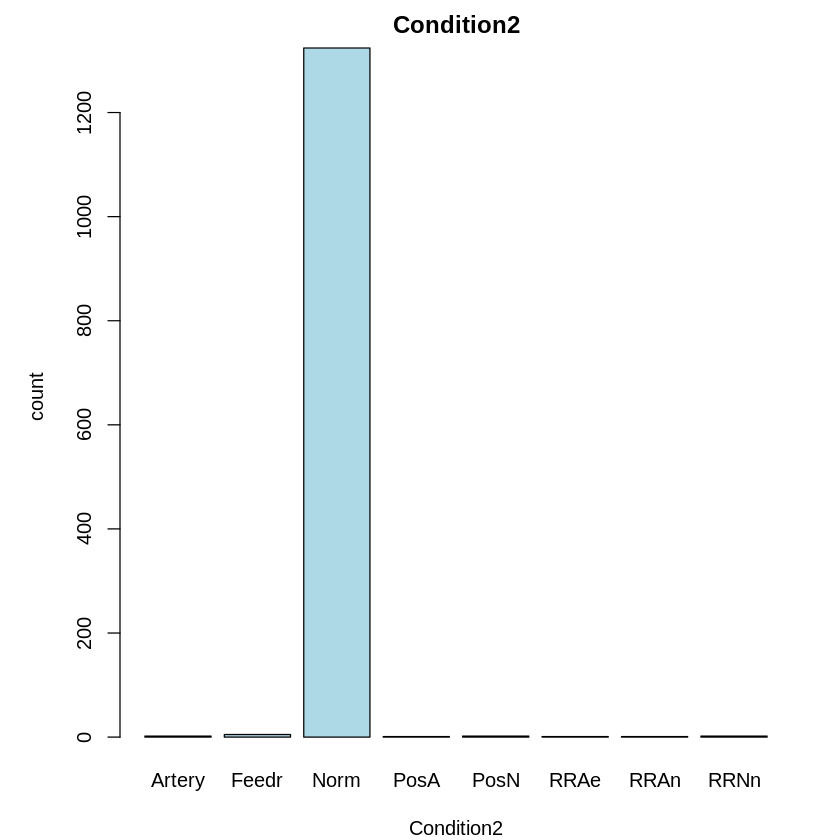

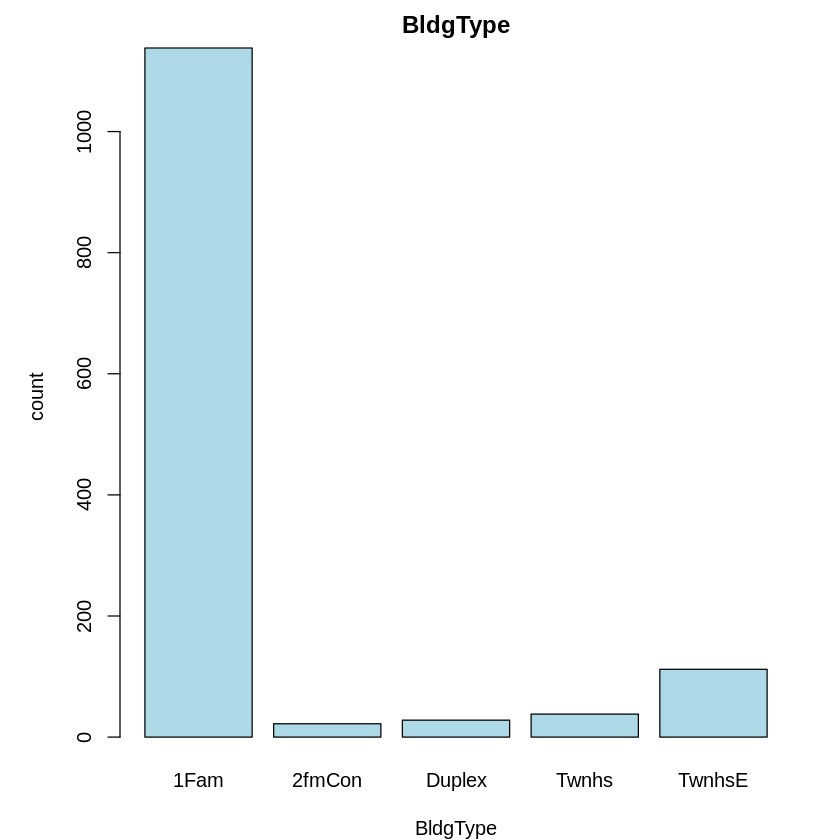

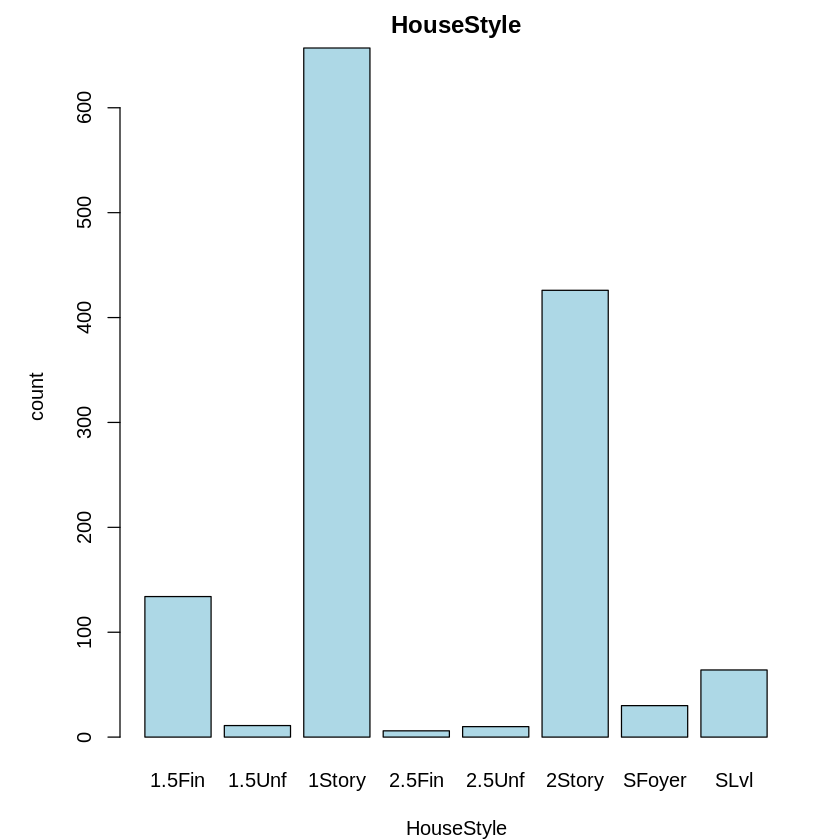

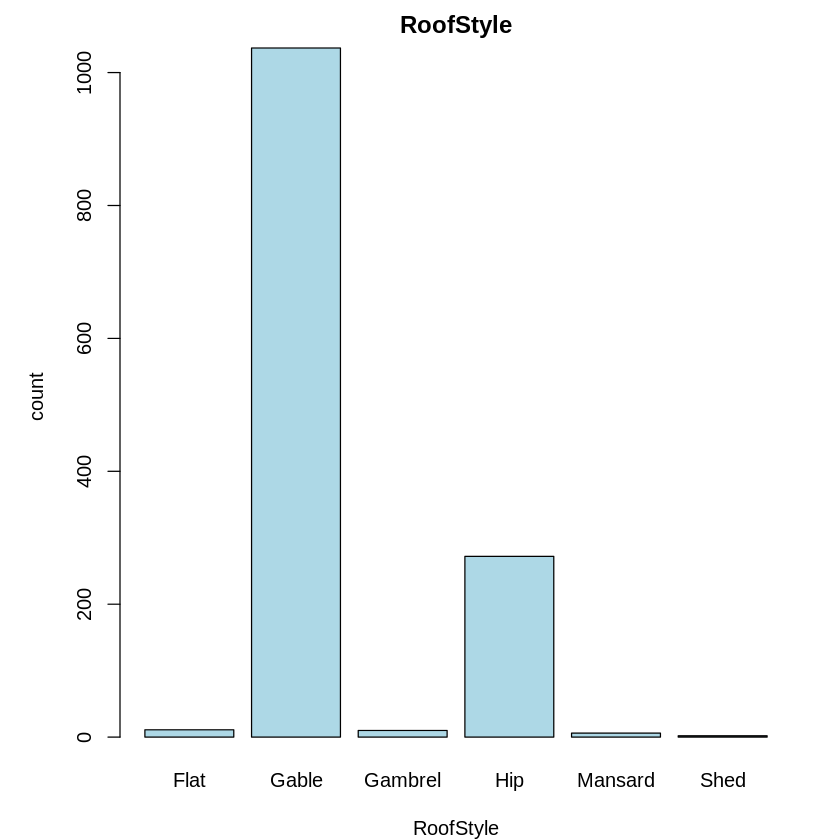

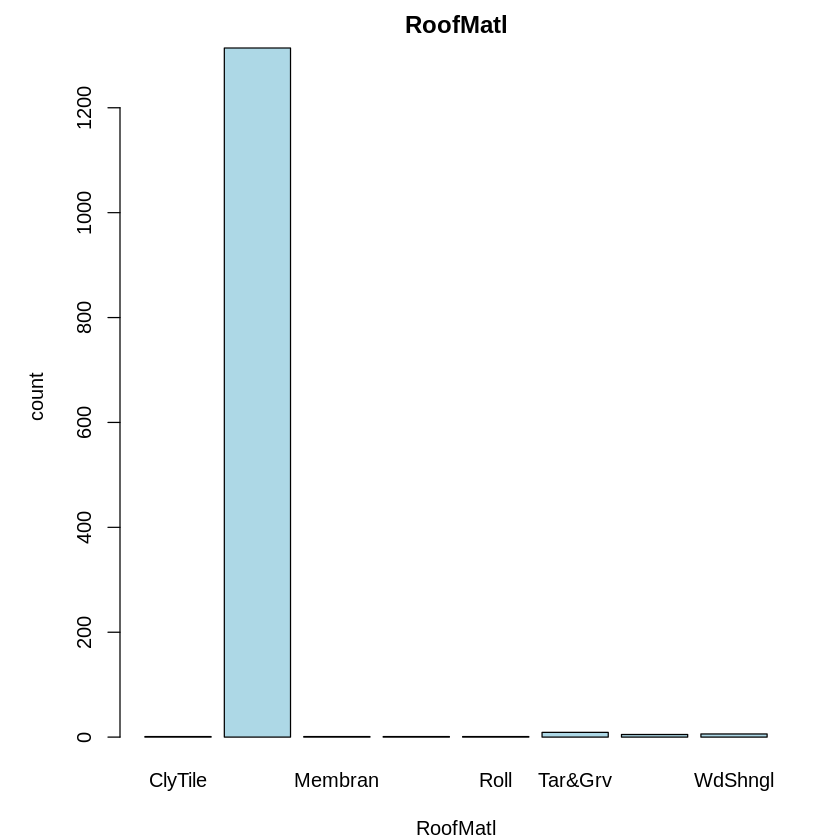

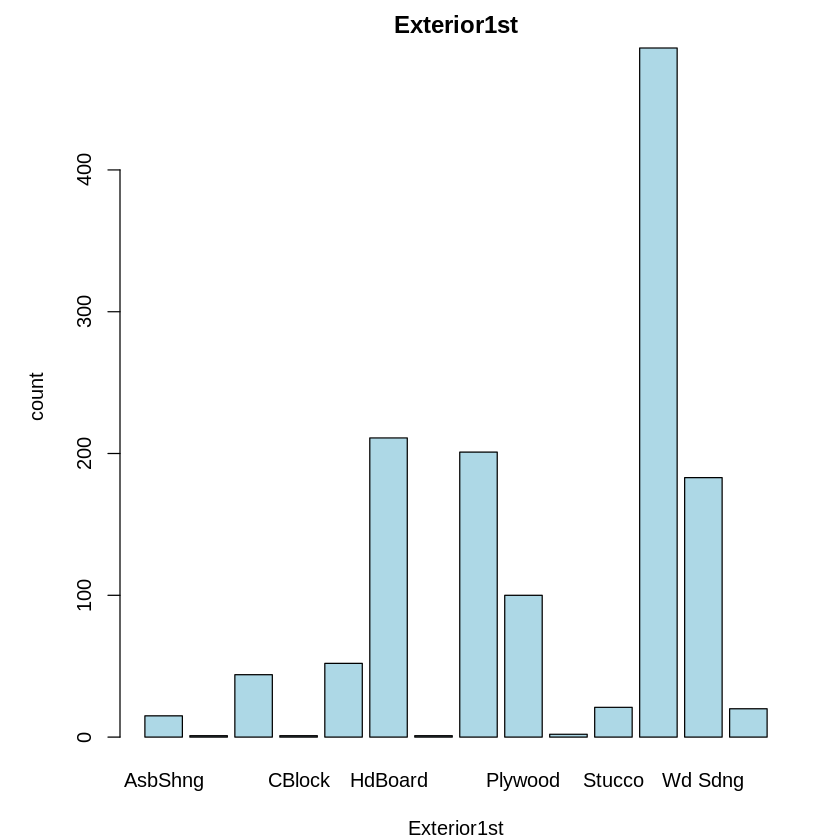

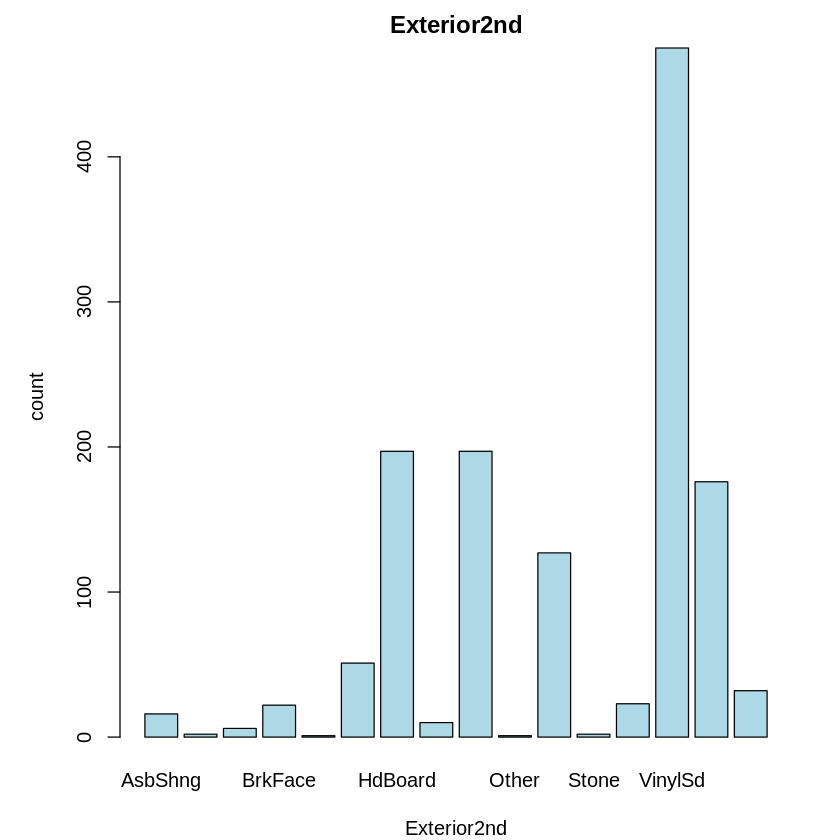

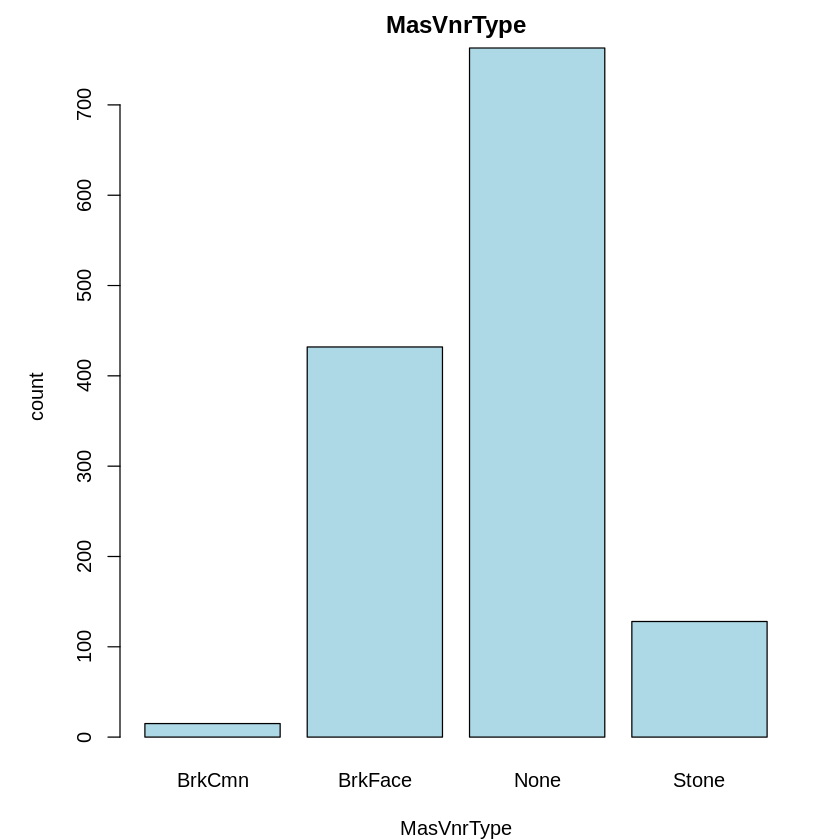

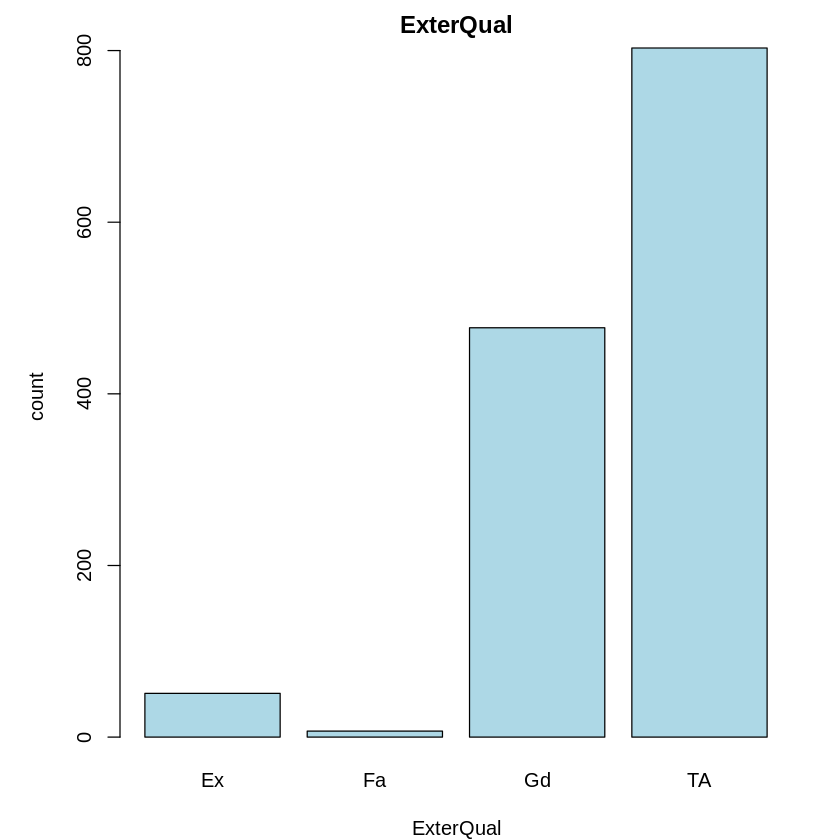

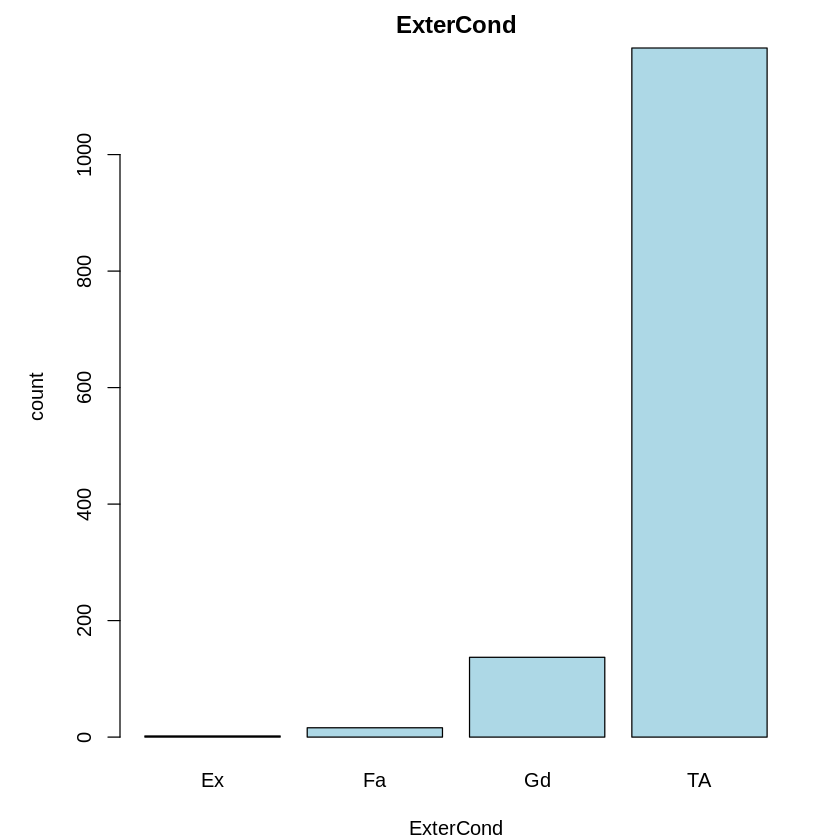

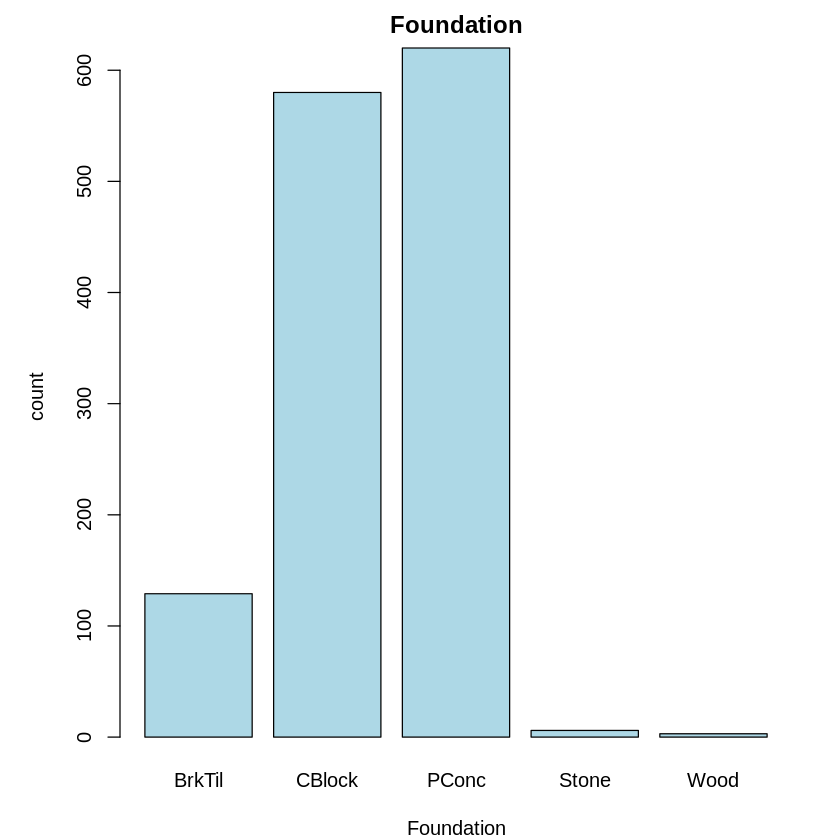

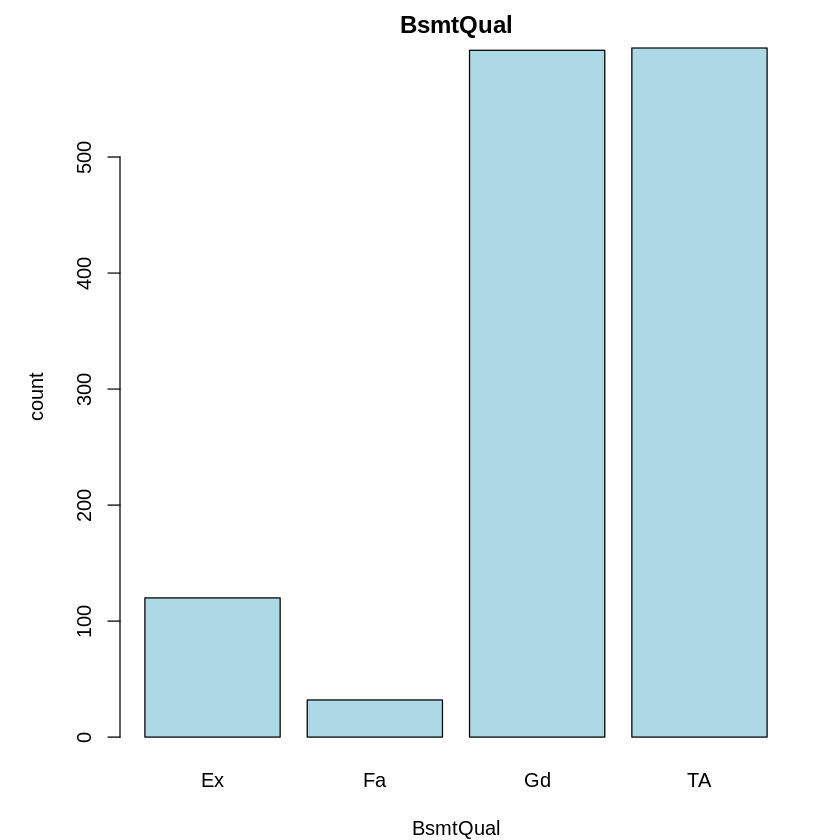

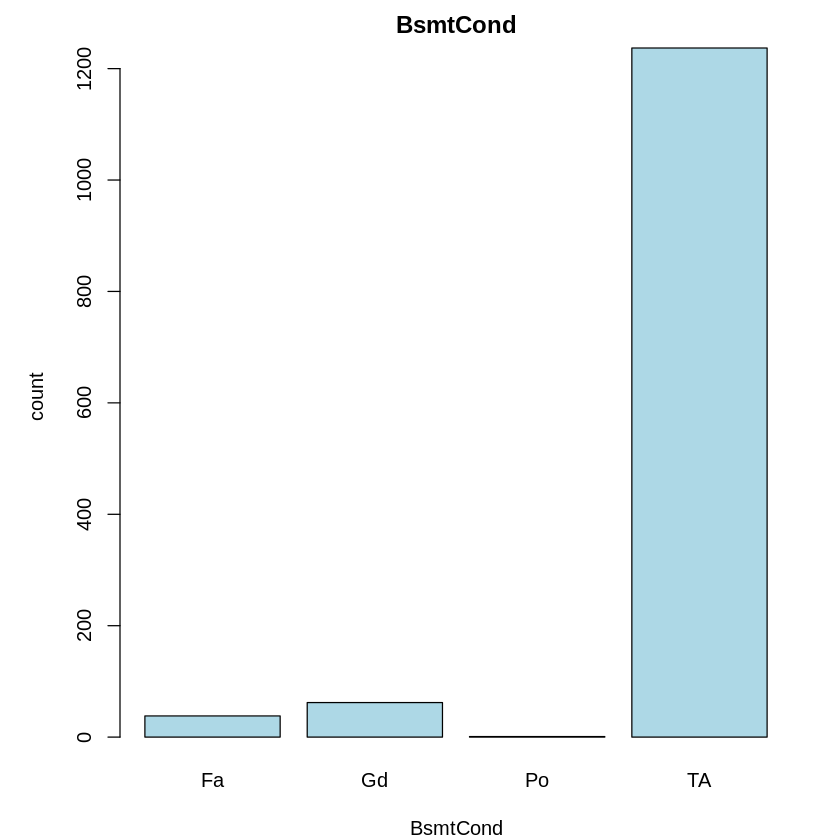

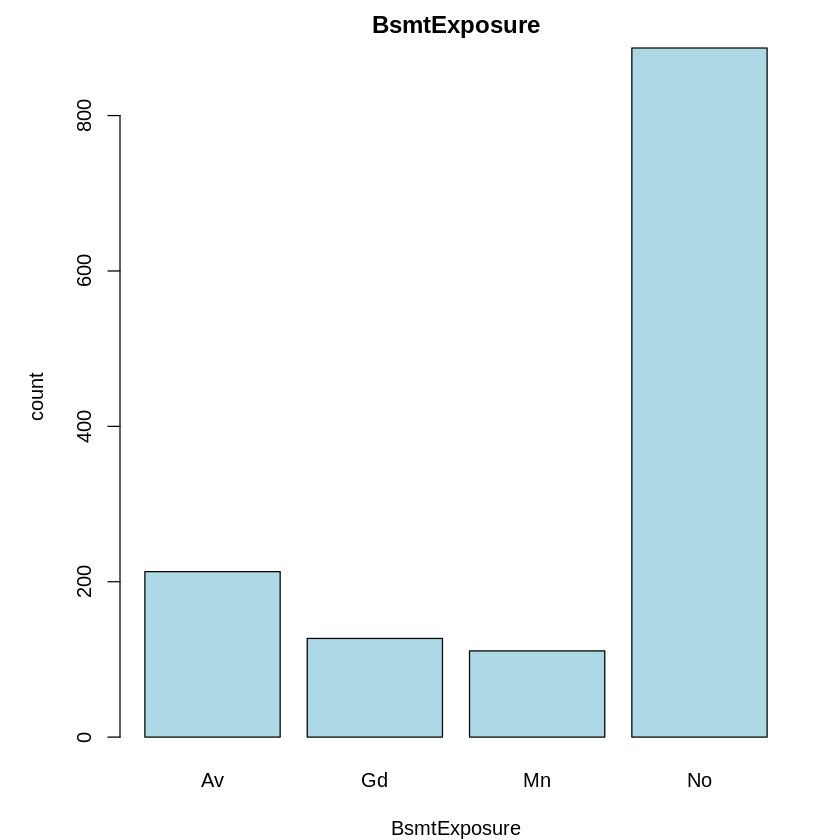

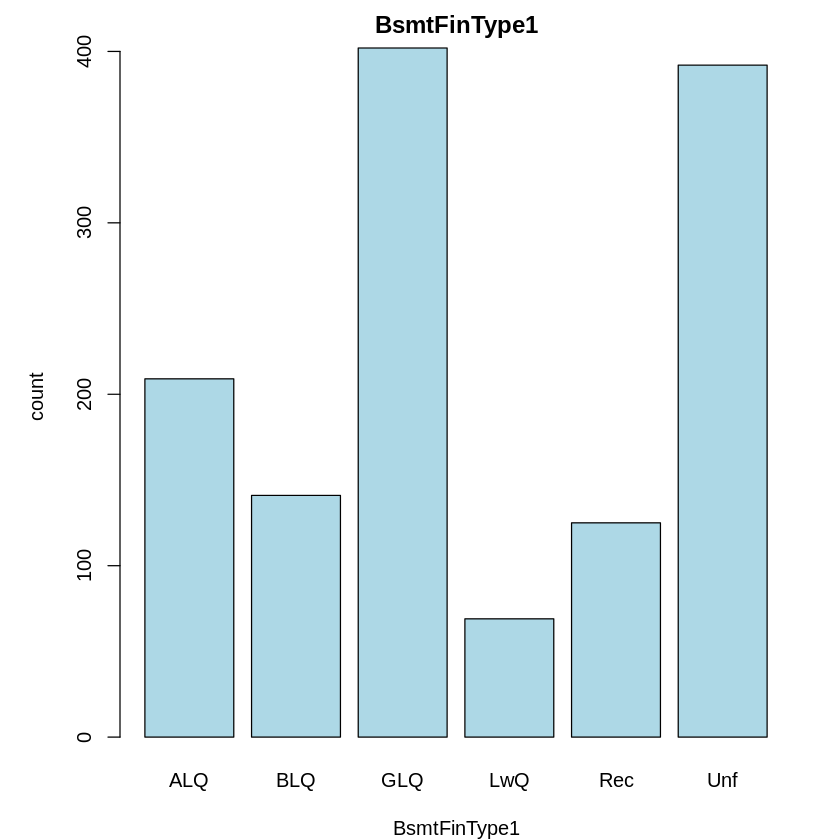

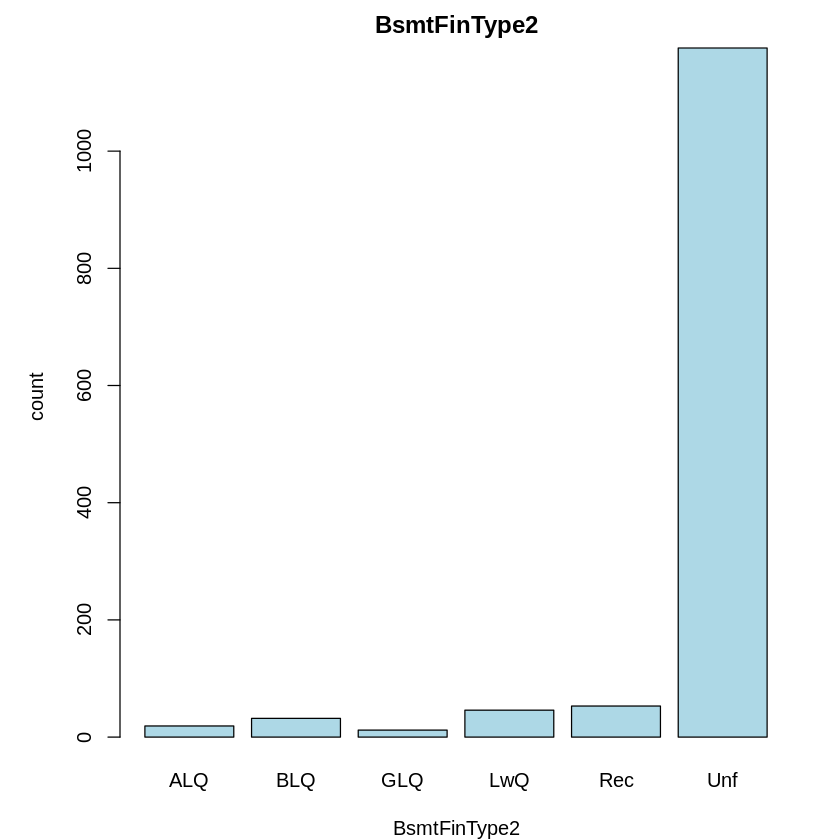

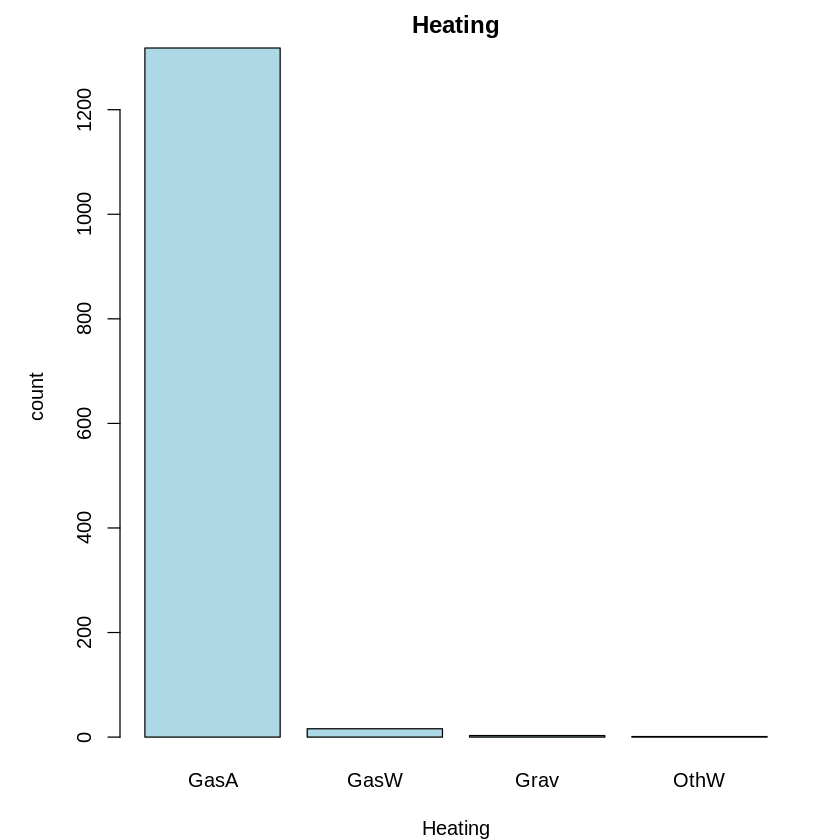

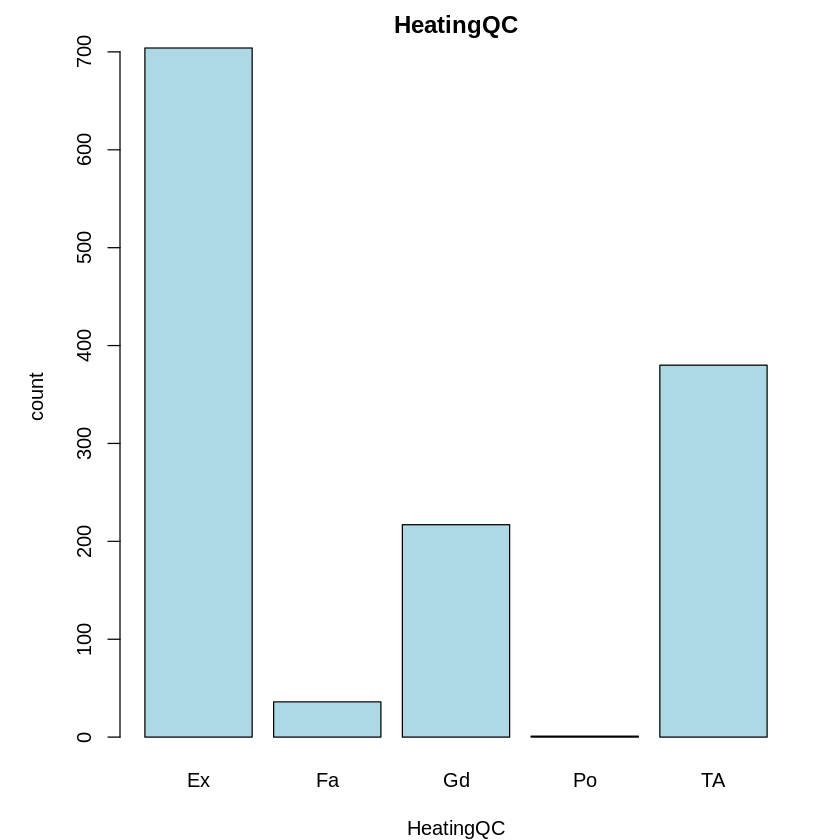

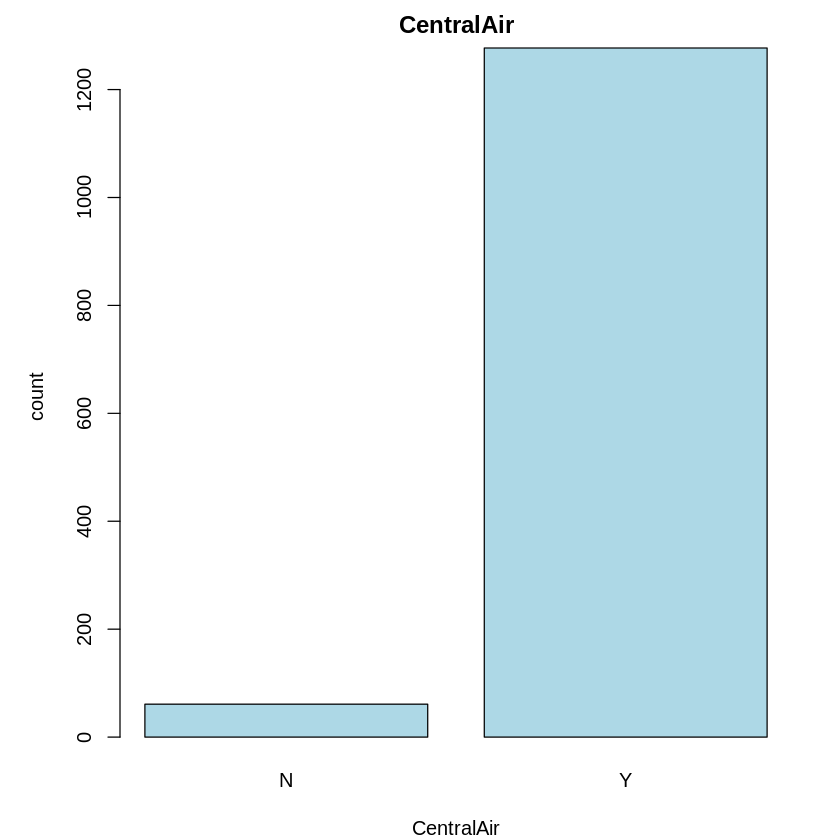

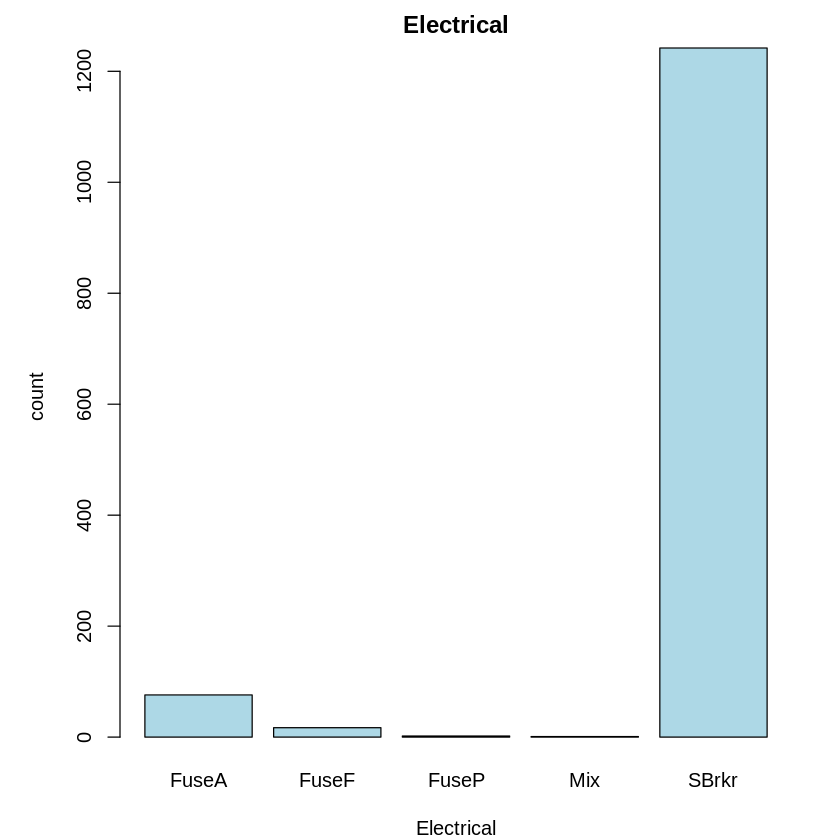

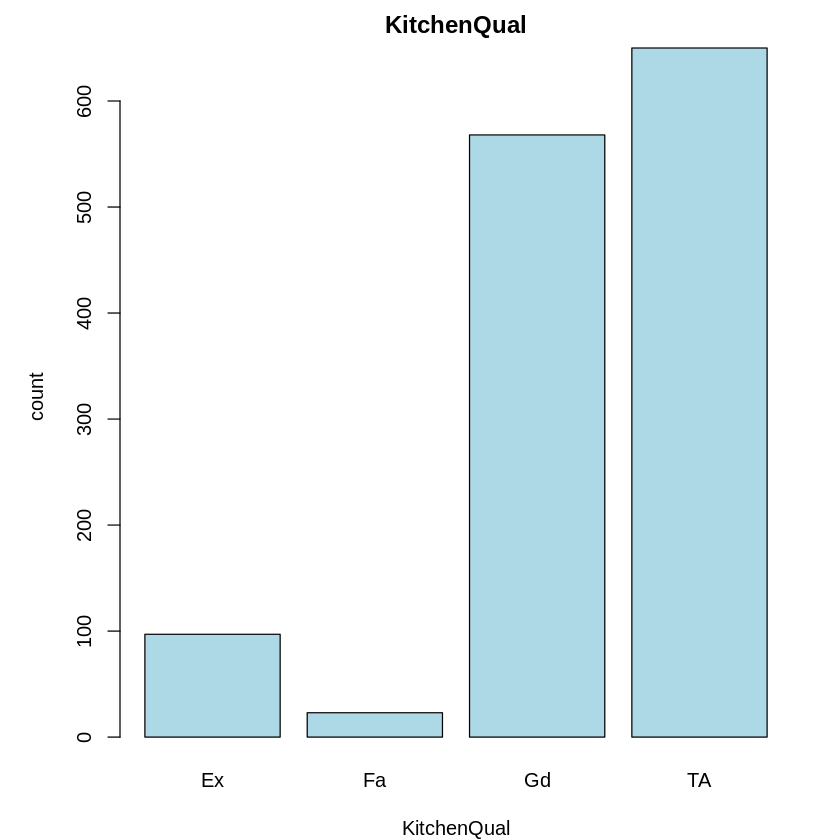

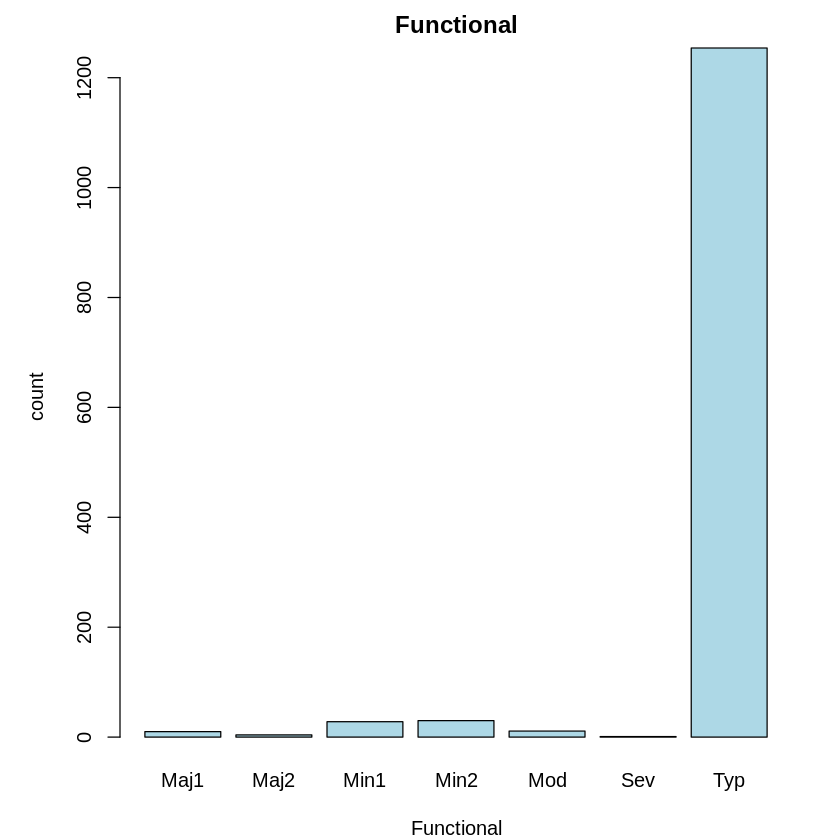

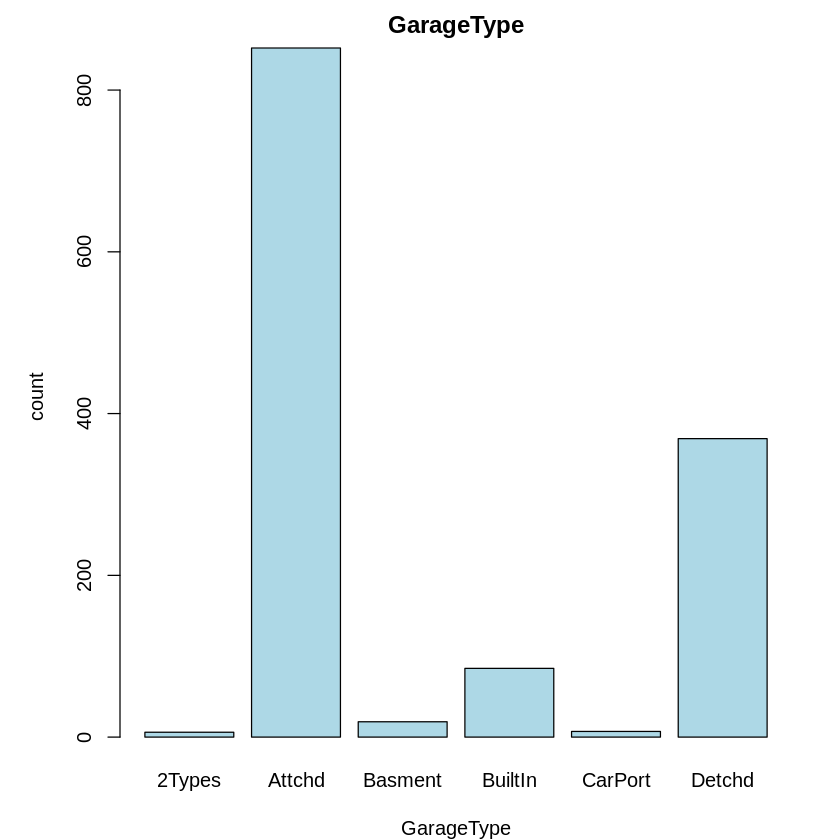

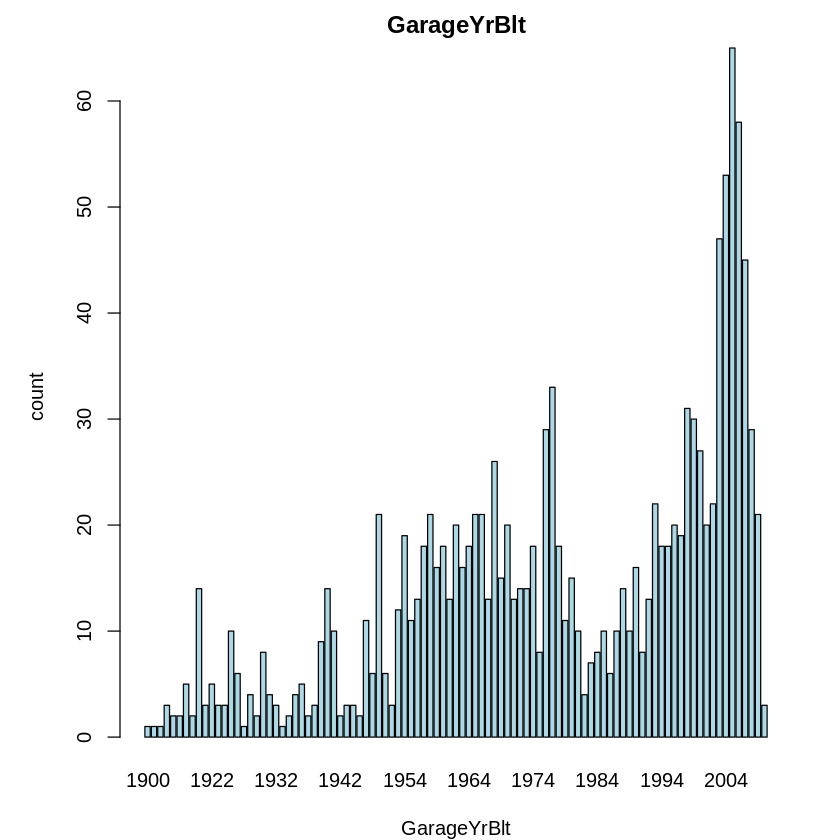

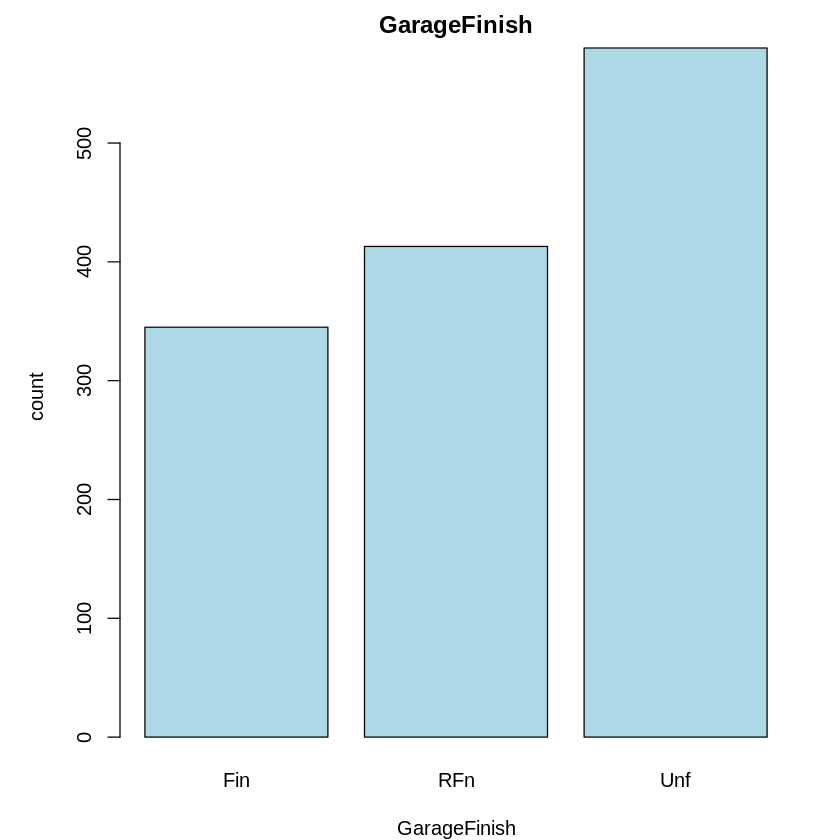

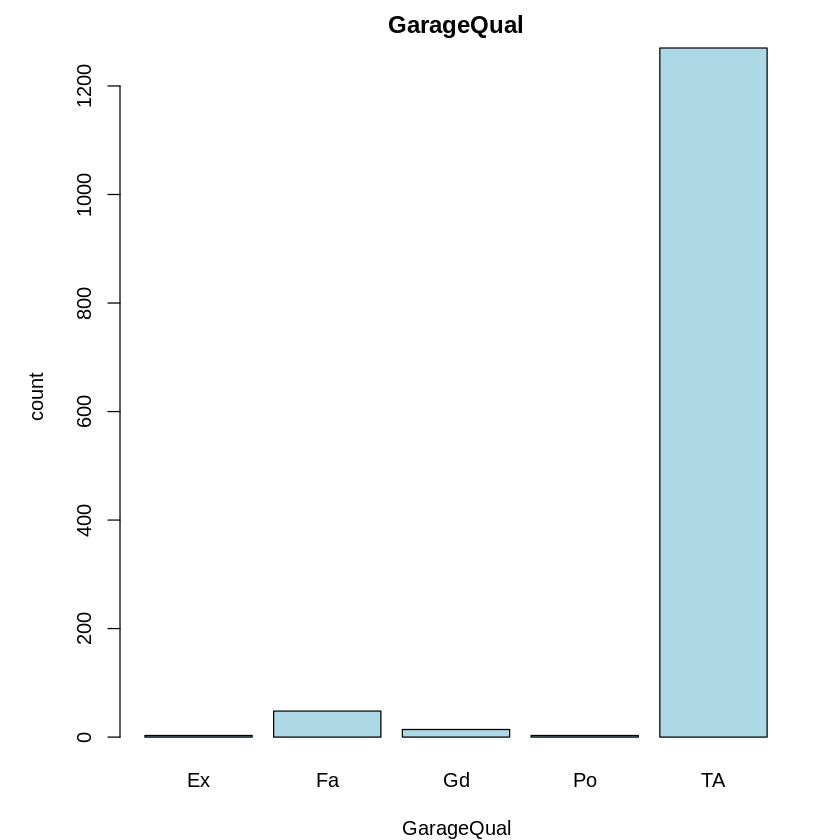

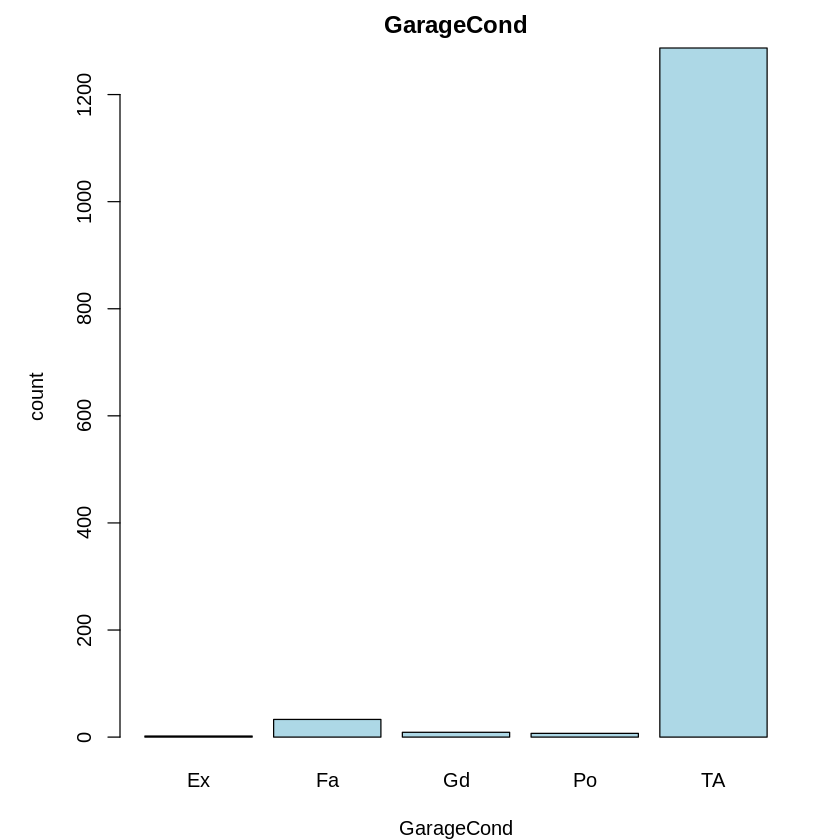

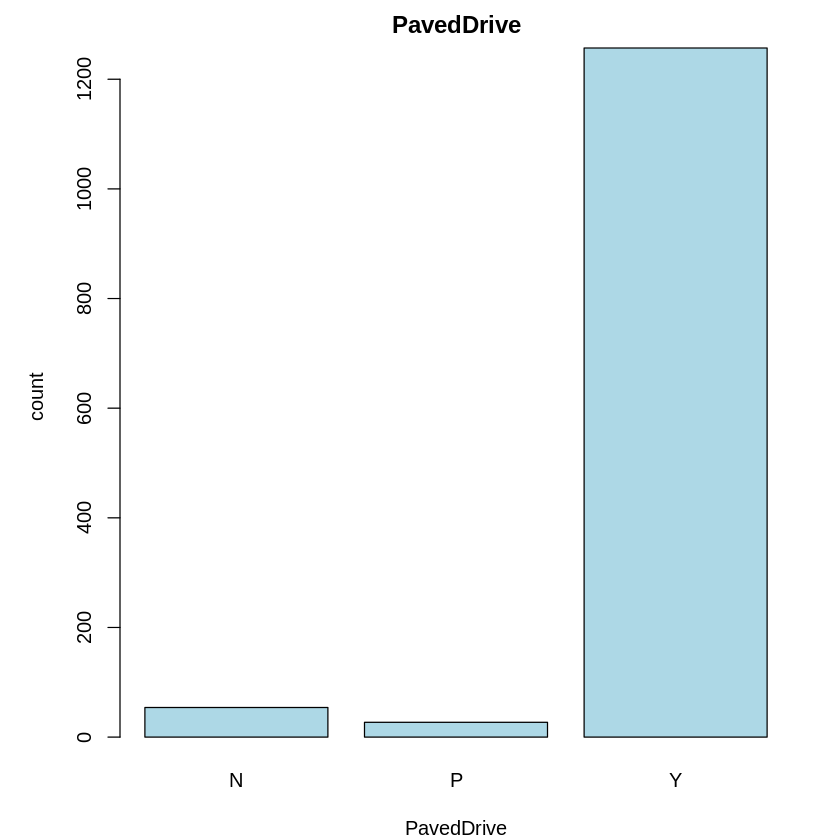

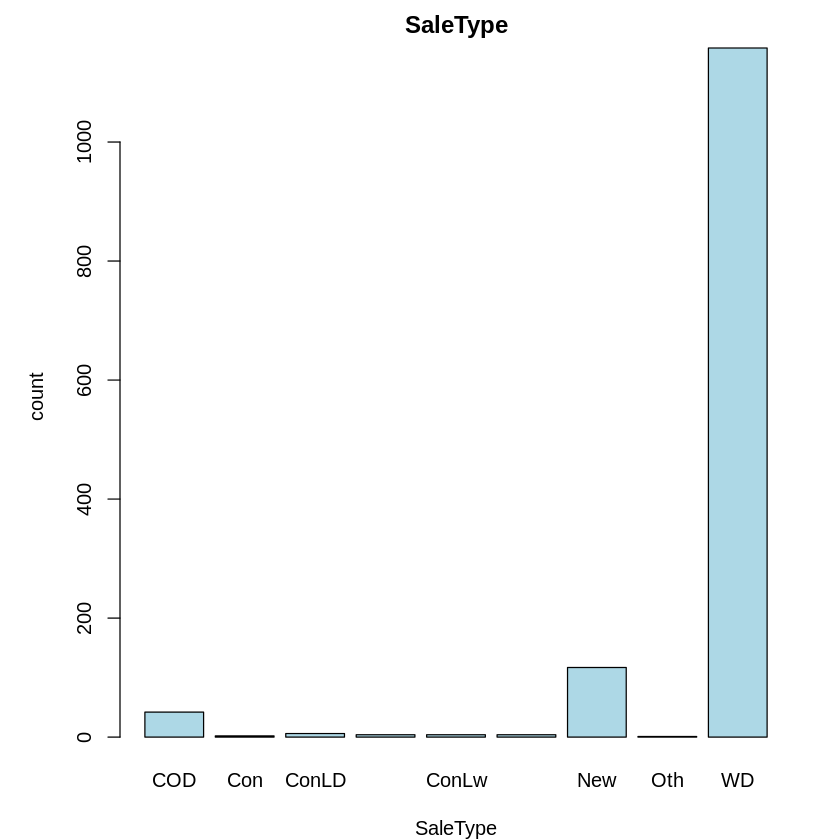

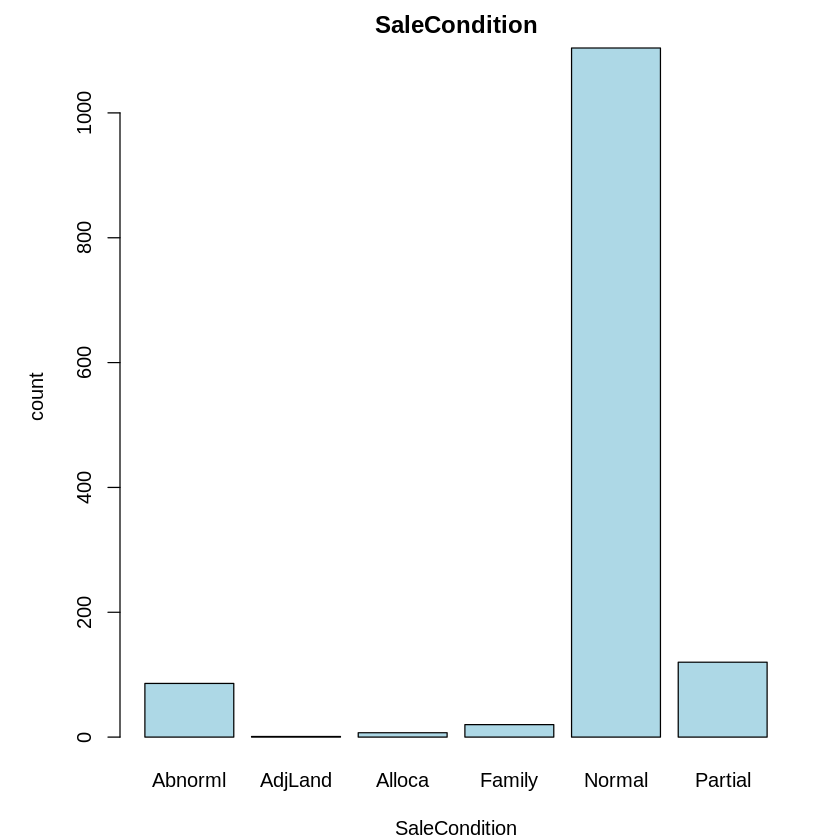

In [ ]:
plot_distribution <- function(data, col) {
  par(mfrow=c(1, 1), mar=c(4, 5, 2, 2))  # Chỉ cần một ô đồ thị

  barplot(table(data[[col]]), main=col, xlab=col, ylab='count', col='lightblue')
}

# Tạo dataframe để lưu thông tin về độ lệch của các cột dữ liệu
distribution_info <- data.frame(Column=character(), stringsAsFactors=FALSE)

# Lặp qua từng cột trong danh sách các cột dữ liệu chứa dữ liệu dạng chữ
for (col in cat_cols) {
  plot_distribution(data, col)
  distribution_info <- rbind(distribution_info, data.frame(Column=col))
}


**Nhận xét**

MSZoning: Vùng đất có mật độ dân số thấp(RL) chiếm số lượng cao nhất, trên 1000.

Street: Loại đường nhựa(Pave) chiếm số lượng gần như tuyệt đối.

LotShape: Lô đất có hình dạng đều(Reg) chiếm số lượng cao nhất, khoảng trên 800, con số cho kiểu đất không đều nhỏ(IR1) là gần 500.

LandContour: Số lượng lô đất gần bằng chiếm số lượng cao nhất, đứng đầu bảng xếp hạng.

Utilities: Số lượng lô đất có tất cả tiện ích có sẵn(AllPub) chiếm số lượng tuyệt đối cho thấy lô đất kiểu này được ưa chuộng đông đảo.

LotConfig: Số lượng lô đất được cấu trúc kiểu bên trong (Inside) chiếm số lượng cao nhất, cỡ gần 1000.

LandSlope: Số lượng lô đất có độ dốc nhẹ (Gtl) đứng đầu bảng xếp hàng với giá trị gần như tuyệt đối.

Neighborhood: Khu vực trong thành phố Ames.Có trên 200 lô đất nằm ở khu vực phía tây bắc Ames (NAmes), chiếm số lượng cao nhất. Cho thấy số lượng lô đất tập trung lớn ở khu vực này trong thành phố Ames.

Condition1: Các lô đất gần với các cơ sở chính ở mức bình thường (Norm) chiếm số lượng cao nhất, có số lượng gần 1200 trên tổng số.

Condition2: Điều kiện gần cơ sở thứ cấp. Các lô đất gần với các cơ sở thứ cấp ở mức bình thường (Norm) chiếm số lượng gần như tuyệt đối.

BldgType: Có khoảng gần 1200 số lượng ngôi nhà thuộc loại ngôi nhà gia đình đơn (1Farm) Số lượng cho các loại ngôi nhà thuộc các kiểu khác chiếm số lượng nhỏ. Cho thấy loại nhà kiểu 1Farm được ưa chuộng nhiều hơn.

HouseStyle: Kiểu nhà một tầng, không tầng lầu hoặc tầng hầm (1Story) chiếm số lượng lớn nhất, cỡ gần 700, theo sau là kiểu nhà hai tầng (2Story) chiếm số lượng trên
400.

RoofStyle: Kiểu mái nhà Gable đứng đầu bảng với số lượng trên 1000. Xếp thứ 2 là kiểu mái nhà Hip chiếm trên 200.

RoofMatl: Số lượng ngôi nhà có mái làm bằng chất liệu là CompShg chiếm số lượng cao gần như tuyệt đối. Cho thấy chất liệu để làm mái nhà được ưa chuộng đông đảo.

Exterior1st: Số lượng nhà có vật liệu phủ bề ngoài bằng VinylSd chiếm số lượng cao nhất, gần 500. Cho thấy đa số vật liệu này được sử dụng để phủ bề ngoài ngôi nhà.

Exterior2nd: Vật liệu phủ bề ngoài ngôi nhà (nếu có nhiều hơn một loại). Số lượng nhà có vật liệu phủ bề ngoài bằng VinylSd chiếm số lượng cao nhất, gần 500. Cho thấy đa số vật liệu này được sử dụng để phủ bề ngoài ngôi nhà.

ExterQual: Số lượng ngôi nhà có chất lượng vật liệu bề ngoài là chiếm số lượng cao nhất, khoảng 800. Tiếp theo là chất lượng là Gd, cỡ gần 500.

ExterCond: Số lượng ngôi nhà có chất lượng vật liệu bề ngoài trung bình (TA) chiếm số lượng cao nhất, áp đảo những loại chất lượng khác, có số lượng cỡ gần 1200.

Foundation: Số lượng ngôi nhà có loại nền là PConc chiếm số lượng cao nhất, trên 600. Tiếp theo là loại nền CBlock cỡ gần 600.

BsmtQual: Số lượng ngôi nhà có chất lượng của tầng hầm tốt (Gd) và trung bình (TA) chiếm số lượng cao nhất, và bằng nhau, đều bằng 600.

BsmtCond: Các ngôi nhà có tình trạng hiện tại của tầng hầm là trung bình (TA) chiếm số lượng cao nhất, áp đảo những loại khác, chiếm số lượng trên 1200.

BsmtExposure: Các ngôi nhà có sự tiếp xúc với tầng hầm là trung bình (TA) đứng đầu bảng.

BsmtFinType1: Số lượng ngôi nhà có loại hoàn thiện tầng hầm ở mức tốt (GLQ), mức chưa hoàn thiện (Unf) chiếm số lượng cao nhất, khoảng 400.

BsmtFinType2: Loại hoàn thiện của tầng hầm (nếu có nhiều hơn một loại). Số lượng ngôi nhà có loại hoàn thiện tầng hầm ở mức chưa hoàn thiện (Unf) chiếm số lượng áp đảo.

Heating: Số lượng ngôi nhà có hệ thống sưởi kiểu GasA chiếm số lượng đông nhất, cỡ gần 1300. Cho thấy hệ thống sưởi này được ưa chuộng nhiều nhất.

HeatingQC: Số lượng ngôi nhà có hệ thống sưởi kiểu GasA chiếm số lượng đông nhất, khoảng 700.

CentralAir: Số lượng ngôi nhà có sẵn hệ thống điều hòa không khí chiếm số lượng lớn, trên 1200. Trong khi đó, con số cho loại nhà không có sẵn hệ thống điều hòa không khí
chiếm số lượng không đáng kể.

Electrical: Số lượng ngôi nhà có hệ thống điện kiểu SBrkr chiếm số lượng lớn nhất, trên1200. Cho thấy nhà có hệ thống điện kiểu này được đông đảo người ưa chuộng.

KitchenQual: Chất lượng của bếp. Số lượng ngôi nhà có chất lượng bếp là trung bình (TA) chiếm số lượng cao nhất, trên 600. Theo sau là số lượng ngôi nhà có chất lượng bếp tốt (Gd)
chiếm cỡ 550.

Functional: Chức năng chung của ngôi nhà. Số lượng ngôi nhà có chức năng chung kiểu điển hình (Typ) có số lượng áp đảo.
Cho thấy đa số ngôi nhà có chức năng chung kiểu này.

GarageType: Kiểu ngôi nhà có garage loại gắn liền với nhà chính (Attachd) có số lượng đứng đầu bảng.

GarageFinish: Số lượng ngôi nhà chưa hoàn thiện garage(Unf) chiếm số lượng lớn, gần 600. Còn con số cho loại ngôi nhà đã hoàn thiện garage(Fin) chiếm số lượng nhỏ nhất, cỡ 350.

GarageQual: Chất lượng của garage. Ngôi nhà có chất lượng garage trung bình (TA) đứng đầu bảng, chiếm số lượng gần như tuyệt đối.
GarageCond: Ngôi nhà có tình trạng hiện garage trung bình (TA) đứng đầu bảng, chiếm số lượng gần như tuyệt đối.

PavedDrive: Số lượng ngôi nhà được lát đá (Y) chiếm số lượng áp đảo, trên 1200.

SaleType: Số lượng loại giao dịch bán nhà kiểu WD chiếm số lượng đứng đầu bảng, gần 1200. Cho thấy loại giao dịch bán nhà theo kiểu này được ưa chuộng nhất.

SaleCondition: Điều kiện của giao dịch bán nhà.Số lượng điều kiện của giao dịch bán nhà bình thường (Normal) chiếm số lượng
cao nhất gần 1200.

### 3.2.3 Chuẩn Hóa Các Cột

In [ ]:
# Xác định các cột cần thực hiện biến đổi log
log_columns <- c('LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                'X1stFlrSF', 'X2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'OpenPorchSF',
                'EnclosedPorch', 'X3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal')

log_columns2 <- paste(log_columns, "_log", sep = "")

# Hàm thực hiện biến đổi log cho các cột
log_transform <- function(data, col, small_value=1) {
  for (colname in col) {
    data[[paste0(colname, '_log')]] <- log(data[[colname]] + small_value)
  }
  return(data)
}

# Áp dụng hàm log_transform
data <- log_transform(data, log_columns)

# In ra cấu trúc mới của dữ liệu
str(data)


'data.frame':	1338 obs. of  93 variables:
 $ Id               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass       : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning         : chr  "RL" "RL" "RL" "RL" ...
 $ LotFrontage      : int  65 80 68 60 84 85 75 0 51 50 ...
 $ LotArea          : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street           : chr  "Pave" "Pave" "Pave" "Pave" ...
 $ LotShape         : chr  "Reg" "Reg" "IR1" "IR1" ...
 $ LandContour      : chr  "Lvl" "Lvl" "Lvl" "Lvl" ...
 $ Utilities        : chr  "AllPub" "AllPub" "AllPub" "AllPub" ...
 $ LotConfig        : chr  "Inside" "FR2" "Inside" "Corner" ...
 $ LandSlope        : chr  "Gtl" "Gtl" "Gtl" "Gtl" ...
 $ Neighborhood     : chr  "CollgCr" "Veenker" "CollgCr" "Crawfor" ...
 $ Condition1       : chr  "Norm" "Feedr" "Norm" "Norm" ...
 $ Condition2       : chr  "Norm" "Norm" "Norm" "Norm" ...
 $ BldgType         : chr  "1Fam" "1Fam" "1Fam" "1Fam" ...
 $ HouseStyle       : chr  "2Story" "1Story

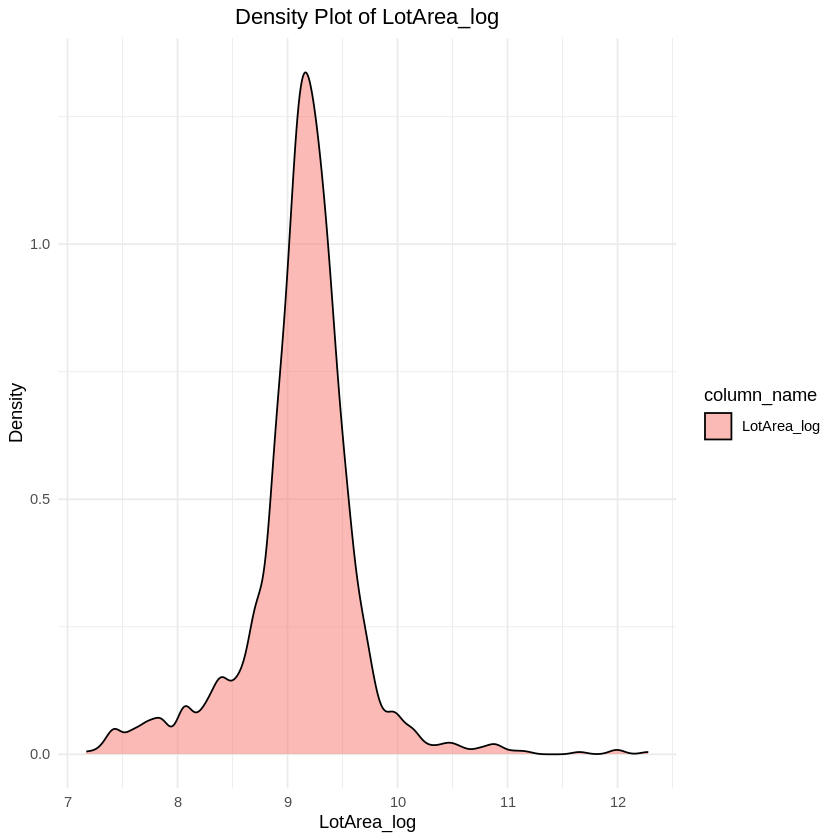

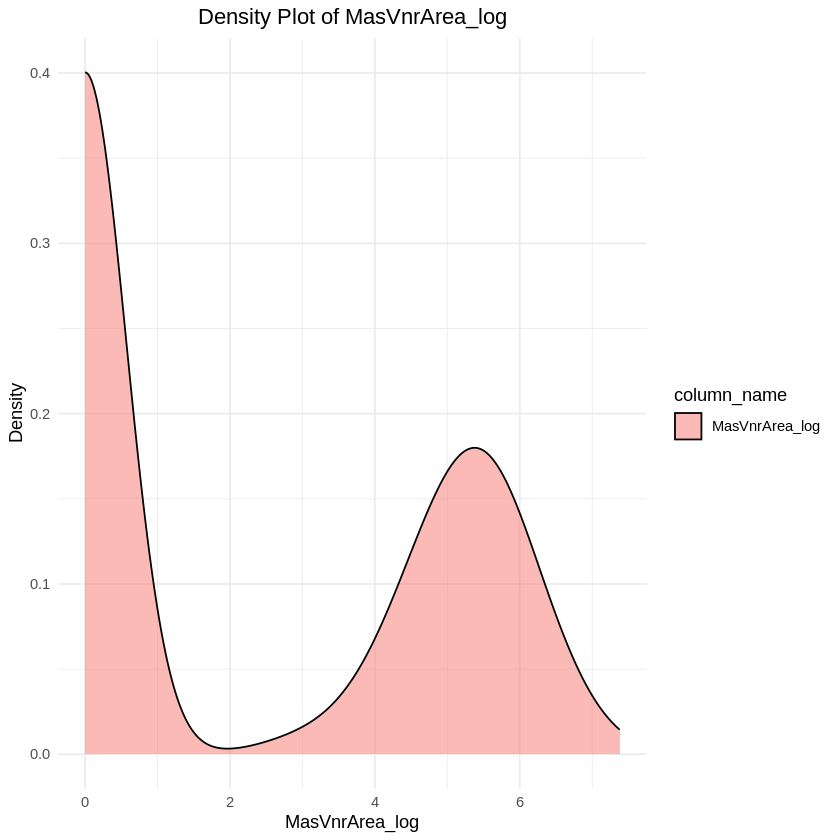

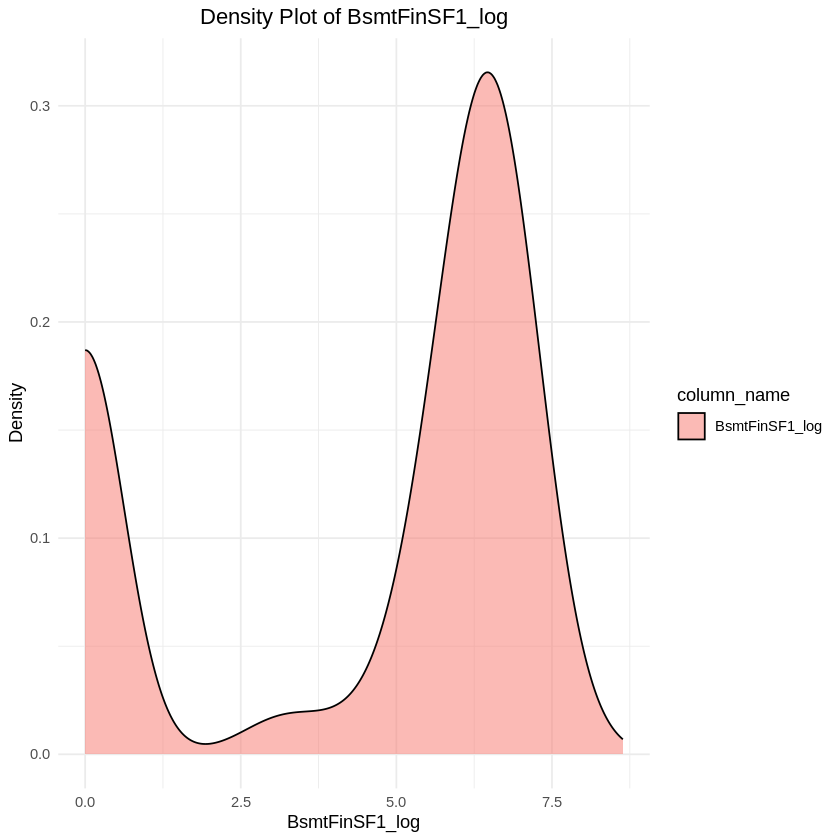

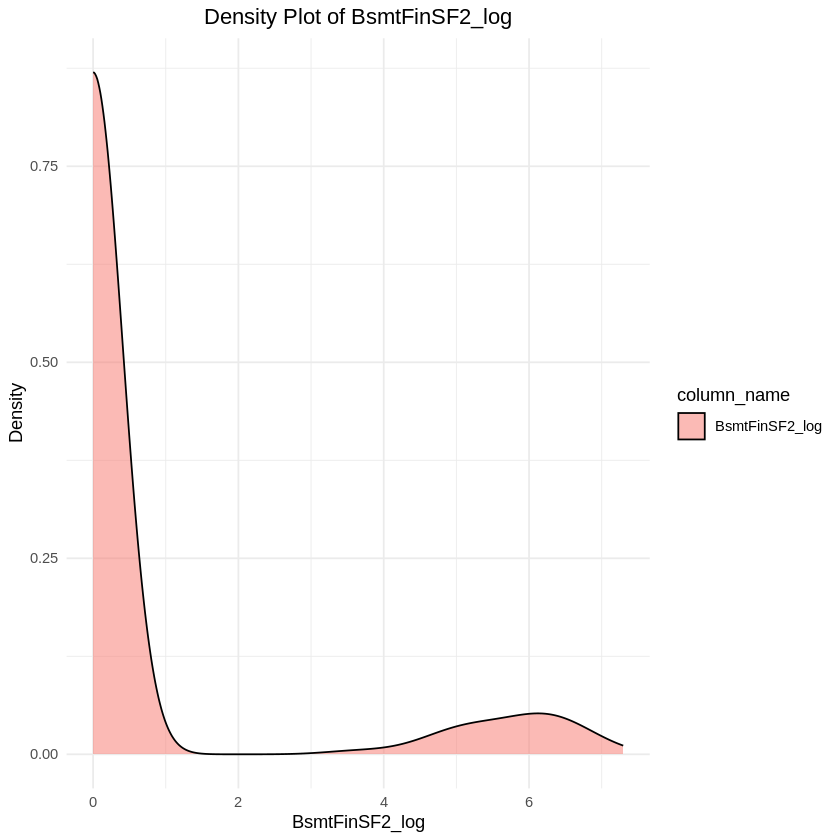

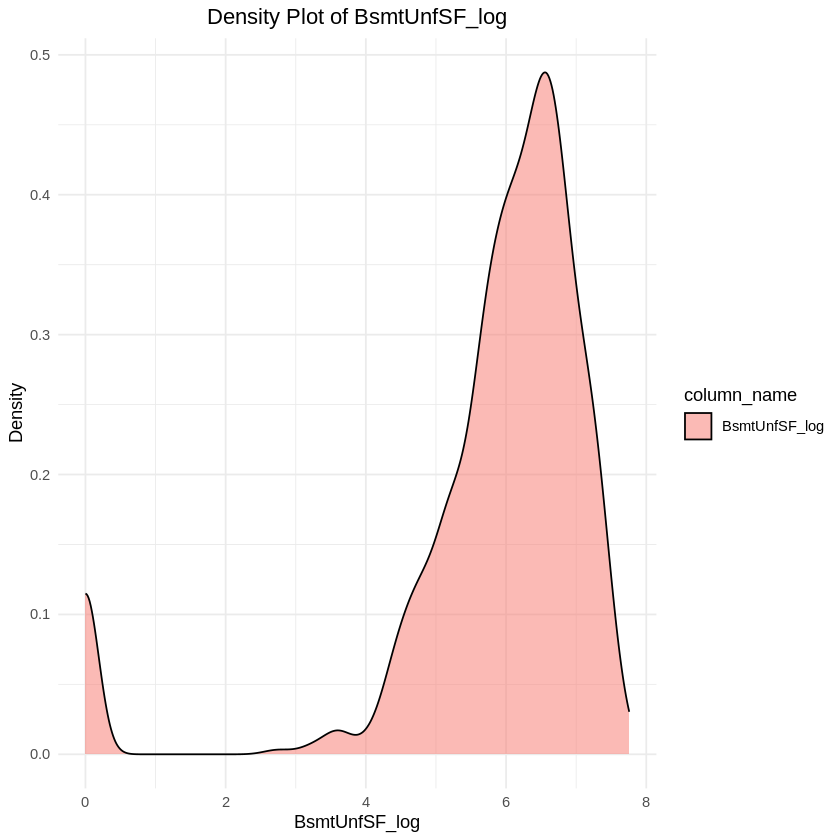

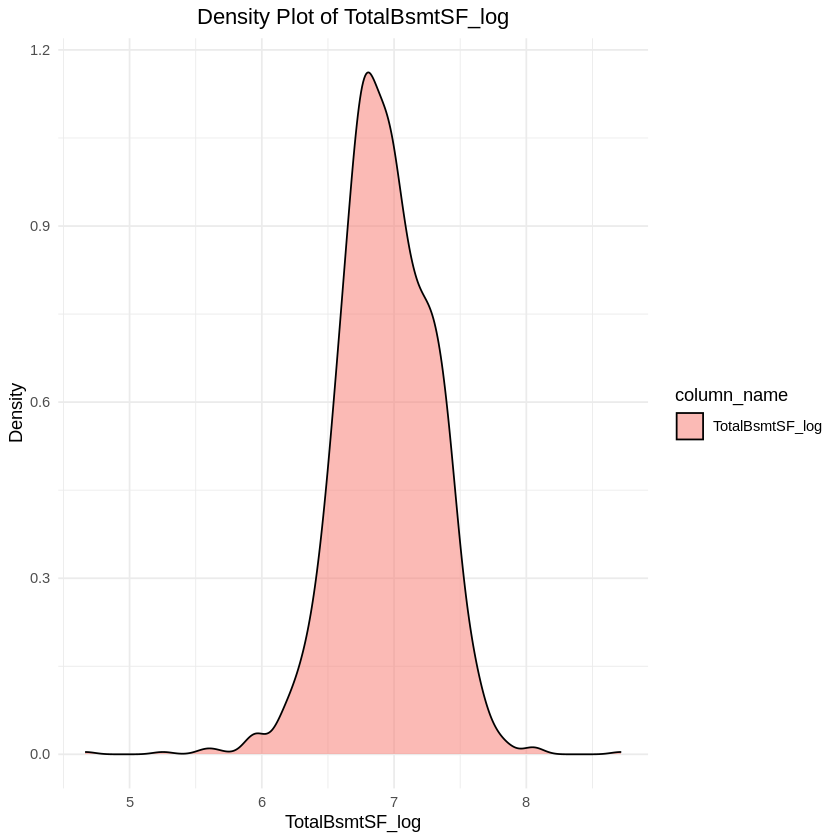

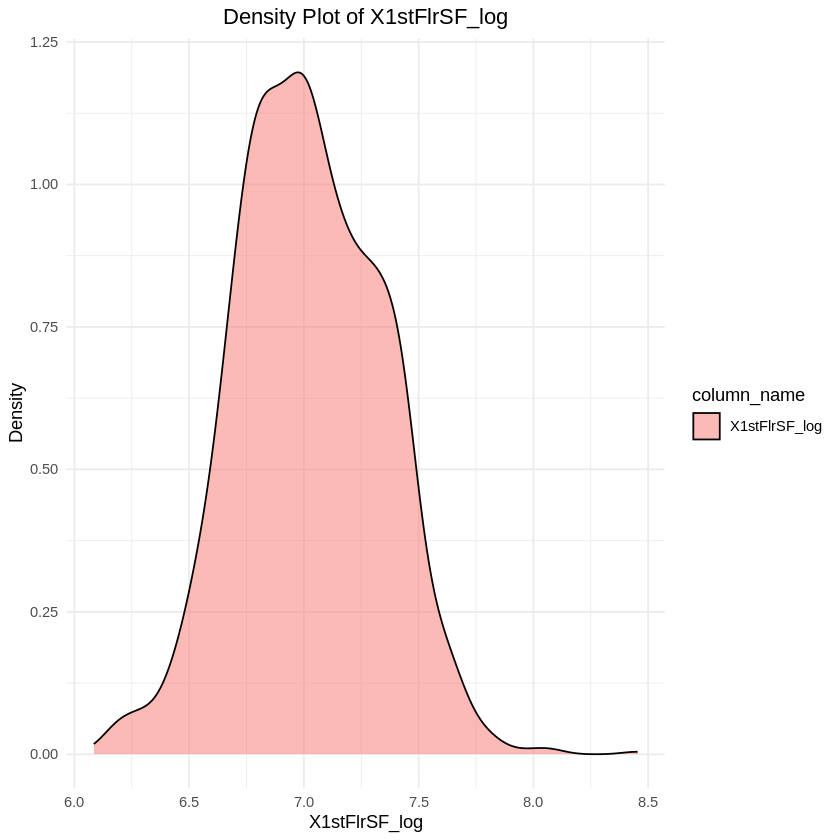

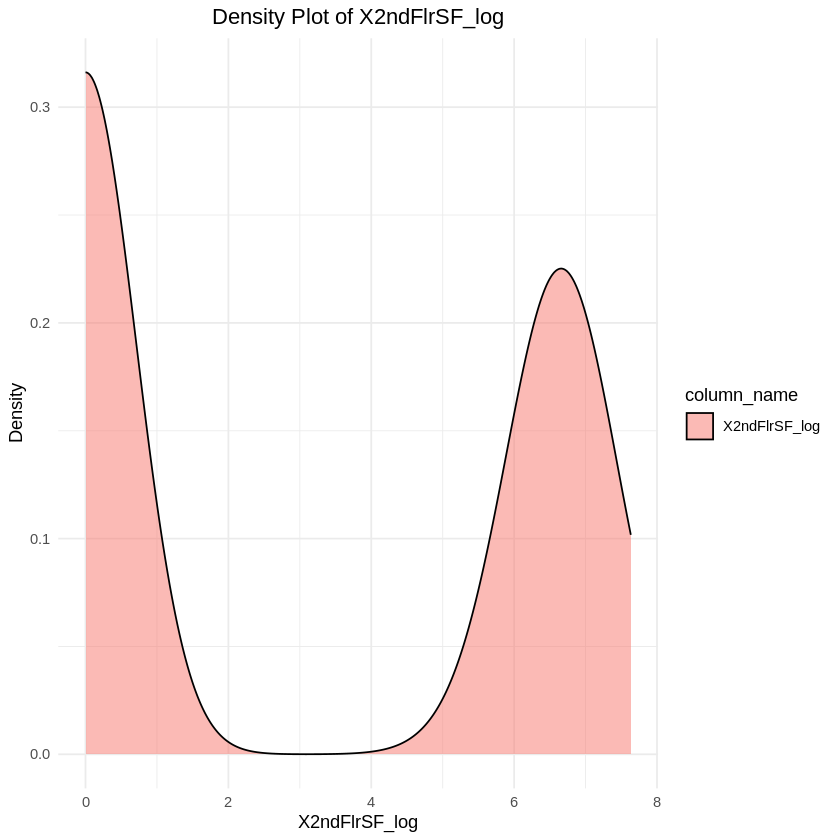

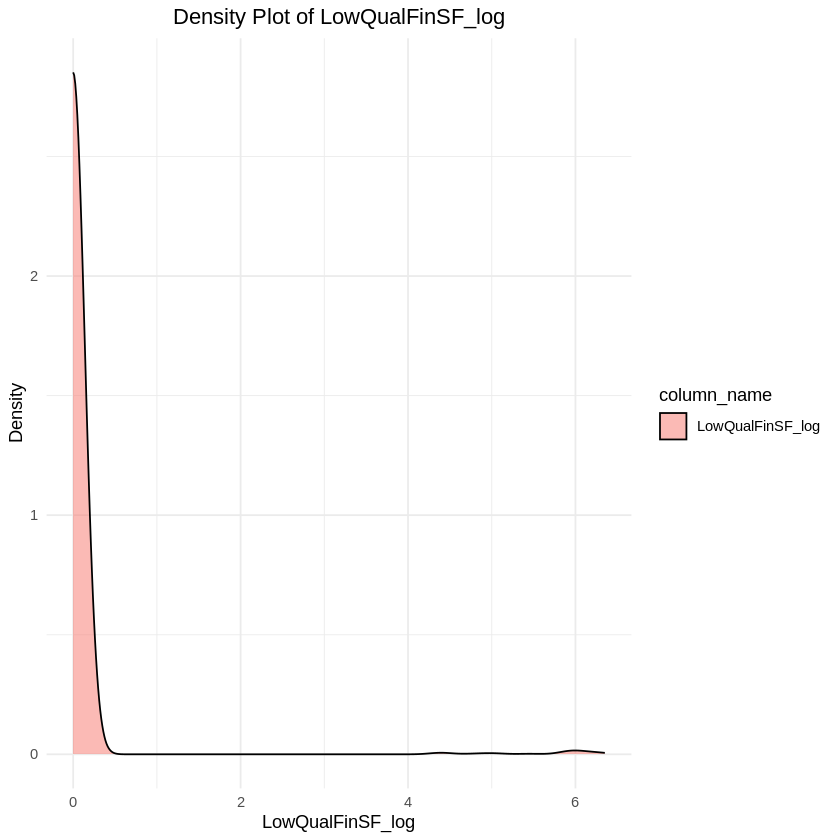

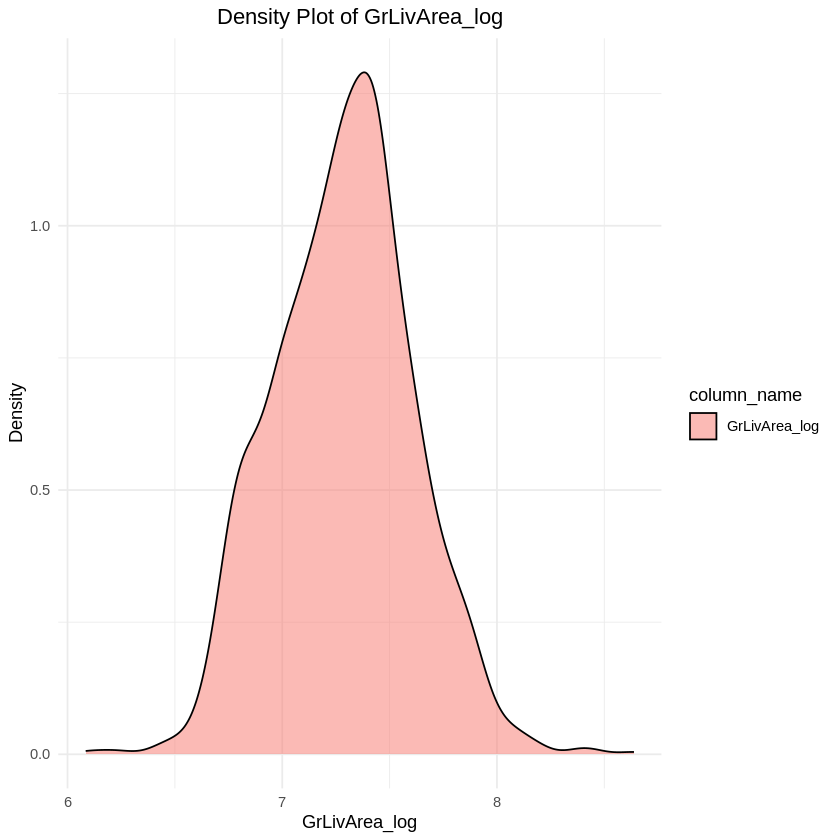

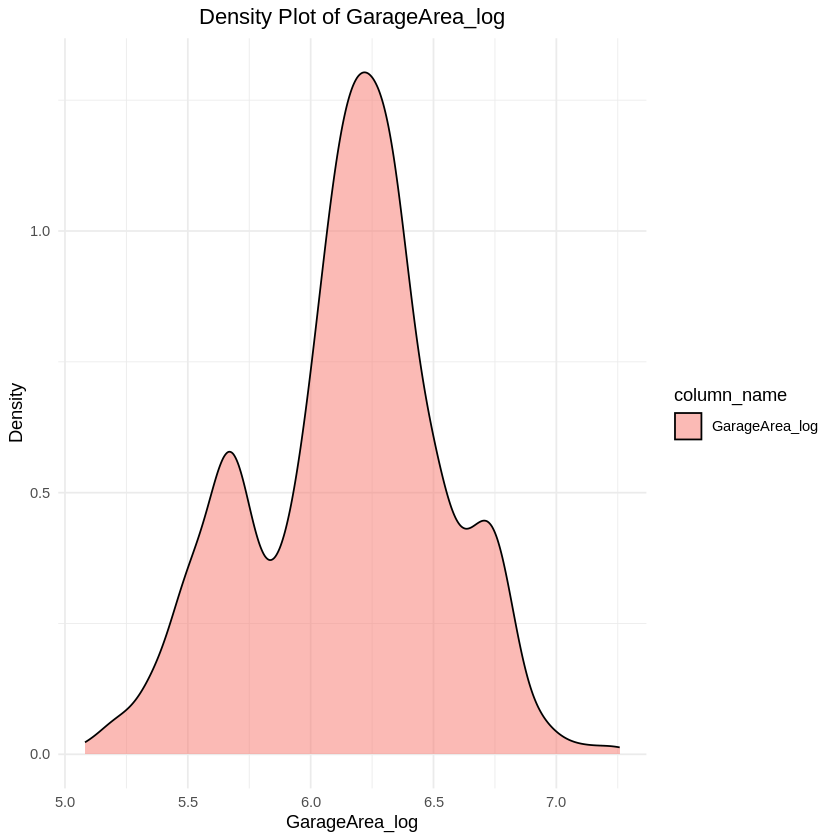

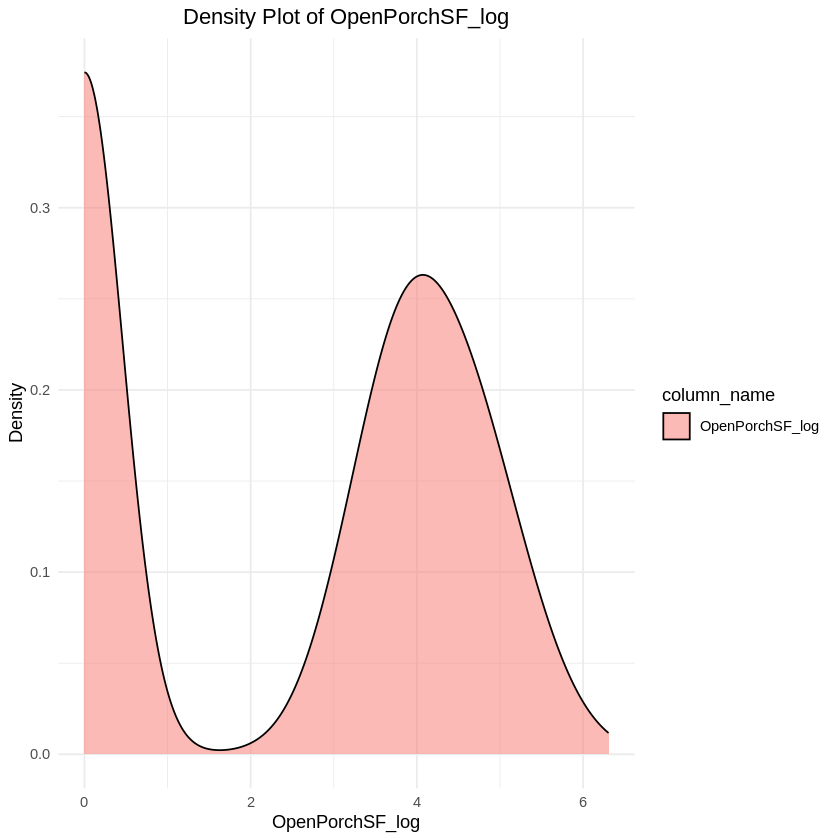

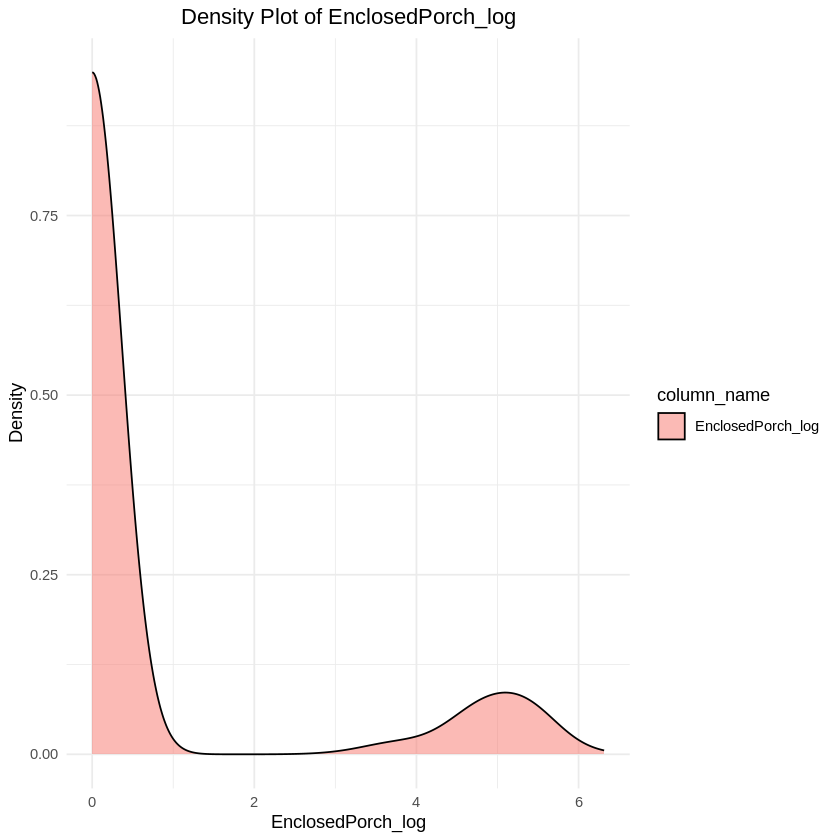

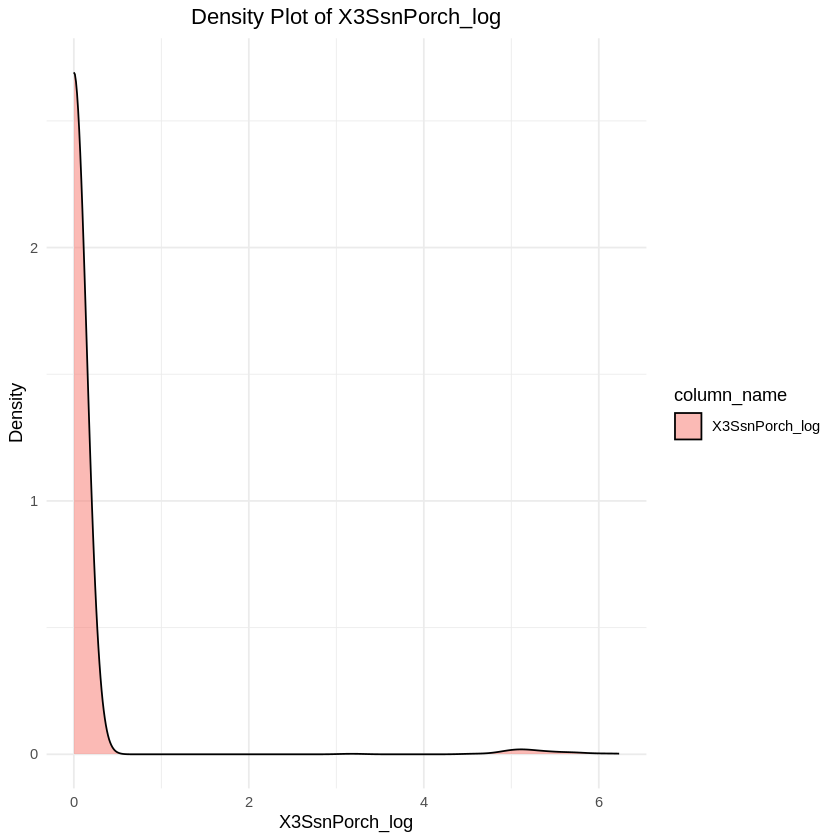

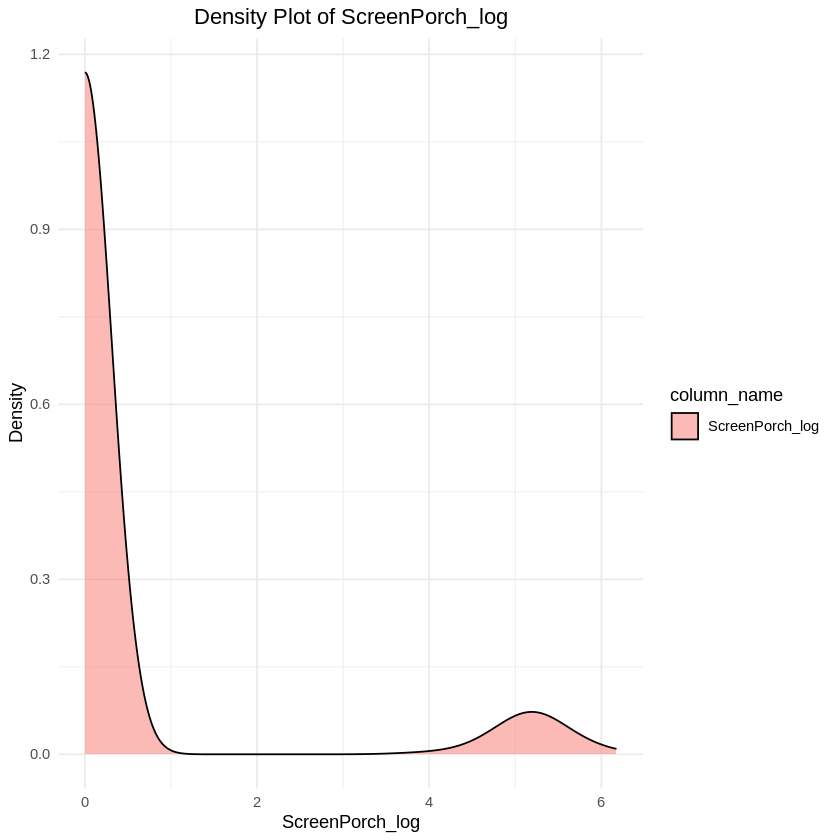

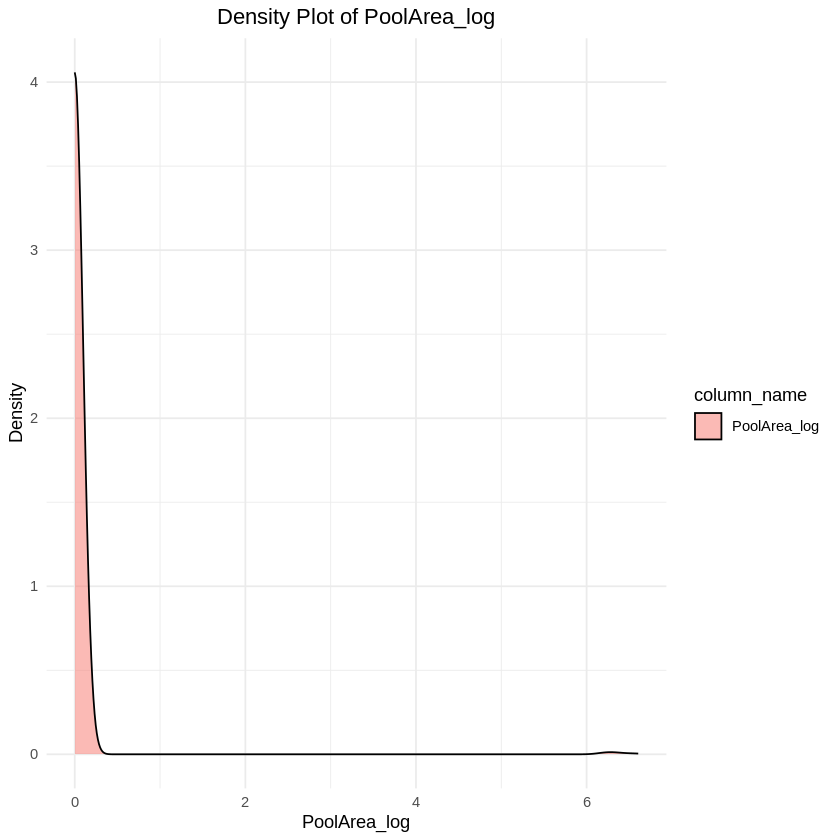

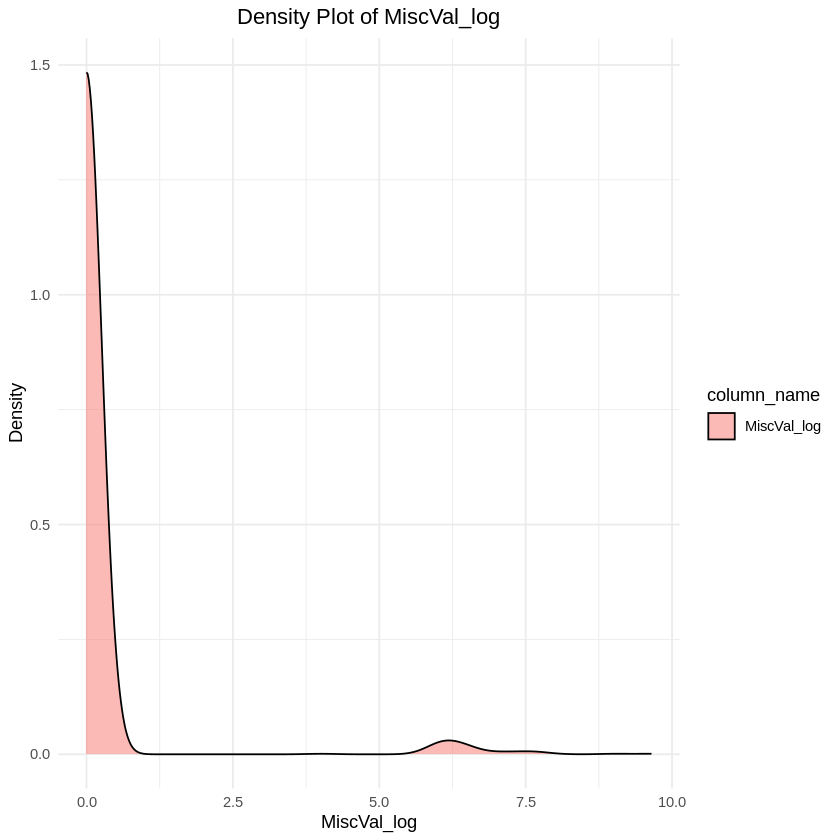

In [ ]:
plot_distribution <- function(data, col) {
  # Tạo biến mới để chứa tên cột cho biểu đồ
  data$column_name <- col

  # Vẽ biểu đồ mật độ với ggplot2
  p <- ggplot(data, aes(x = .data[[col]], fill = column_name, shape = column_name)) +
    geom_density(alpha = 0.5) +  # Sử dụng geom_density để vẽ biểu đồ mật độ
    labs(title = paste("Density Plot of", col),
         x = col,
         y = "Density") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))

  # Hiển thị biểu đồ
  print(p)
}

# Lặp qua từng cột số trong log_columns2 và vẽ biểu đồ
for (col in log_columns2) {
  plot_distribution(data, col)
}


#4.Phân tích đa biến

## Câu 4.1 Xác định độ tương quan giữa biến phụ thuộc và biến độc lập (dạng numerical)

In [ ]:
# Xóa các cột không phải ... và không phải log_columns và cột Id
data41 <- data[, !(names(data) %in% c(cat_cols, log_columns, "Id"))]

# Hiển thị thông tin về dữ liệu
str(data41)

'data.frame':	1338 obs. of  36 variables:
 $ MSSubClass       : int  60 20 60 70 60 50 20 60 50 190 ...
 $ LotFrontage      : int  65 80 68 60 84 85 75 0 51 50 ...
 $ OverallQual      : int  7 6 7 7 8 5 8 7 7 5 ...
 $ OverallCond      : int  5 8 5 5 5 5 5 6 5 6 ...
 $ YearBuilt        : int  2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 ...
 $ YearRemodAdd     : int  2003 1976 2002 1970 2000 1995 2005 1973 1950 1950 ...
 $ BsmtFullBath     : int  1 0 1 1 1 1 1 1 0 1 ...
 $ BsmtHalfBath     : int  0 1 0 0 0 0 0 0 0 0 ...
 $ FullBath         : int  2 2 2 1 2 1 2 2 2 1 ...
 $ HalfBath         : int  1 0 1 0 1 1 0 1 0 0 ...
 $ BedroomAbvGr     : int  3 3 3 3 4 1 3 3 2 2 ...
 $ KitchenAbvGr     : int  1 1 1 1 1 1 1 1 2 2 ...
 $ TotRmsAbvGrd     : int  8 6 6 7 9 5 7 7 8 5 ...
 $ Fireplaces       : int  0 1 1 1 1 0 1 2 2 2 ...
 $ GarageCars       : int  2 2 2 3 3 2 2 2 2 1 ...
 $ WoodDeckSF       : int  0 298 0 0 192 40 255 235 90 0 ...
 $ MoSold           : int  2 5 9 2 12 10 8 11 4 1 ..

Vẽ biểu đồ Heat Map để hiển thị mối tương quan giữa các biến numeric với SalePrice



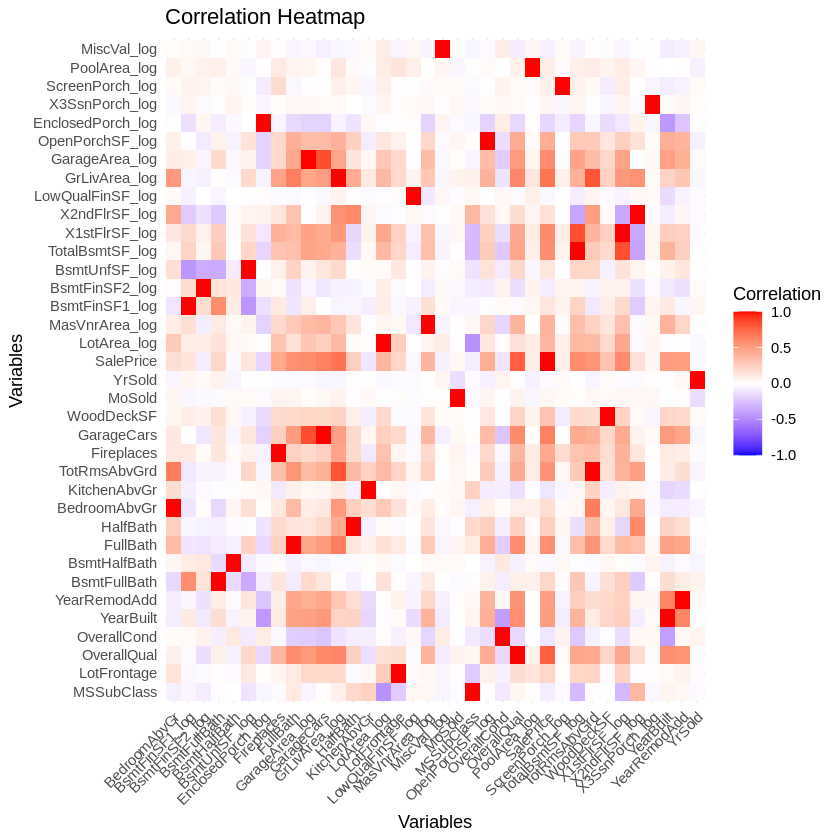

In [ ]:
# Tính toán ma trận tương quan
correlation_matrix <- cor(data41)

# Chuyển đổi ma trận tương quan thành dạng dataframe
correlation_df <- as.data.frame(correlation_matrix)
correlation_df$rowname <- rownames(correlation_df)

# Chuyển đổi ma trận tương quan thành dạng long
correlation_long <- melt(correlation_df, id.vars = "rowname")

# Đặt tên lại các cột
names(correlation_long) <- c("Var1", "Var2", "Correlation")

# Vẽ biểu đồ heatmap
ggplot(correlation_long, aes(x = Var1, y = Var2, fill = Correlation)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0, limit = c(-1, 1)) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Correlation Heatmap",
       x = "Variables",
       y = "Variables")

Lấy các chỉ số tương quan của biến SalePrice với các biến Numeric khác

In [ ]:
print(correlation_matrix["SalePrice", ])

       MSSubClass       LotFrontage       OverallQual       OverallCond 
      -0.07959852        0.21207466        0.78354561       -0.10862710 
        YearBuilt      YearRemodAdd      BsmtFullBath      BsmtHalfBath 
       0.50429718        0.50143538        0.20969466       -0.03017500 
         FullBath          HalfBath      BedroomAbvGr      KitchenAbvGr 
       0.56931263        0.25817492        0.16926555       -0.11140820 
     TotRmsAbvGrd        Fireplaces        GarageCars        WoodDeckSF 
       0.55182070        0.44543443        0.64015436        0.30598288 
           MoSold            YrSold         SalePrice       LotArea_log 
       0.04130961       -0.02045102        1.00000000        0.37879302 
   MasVnrArea_log    BsmtFinSF1_log    BsmtFinSF2_log     BsmtUnfSF_log 
       0.38621608        0.13800081       -0.07507666        0.13033574 
  TotalBsmtSF_log     X1stFlrSF_log     X2ndFlrSF_log  LowQualFinSF_log 
       0.57928915        0.58982234        0.155220

**Nhận Xét**

1. Tương quan dương mạnh với OverallQual (0.78) và GrLivArea_log (0.69), chỉ ra rằng chất lượng tổng thể và diện tích sống trên mức đất lớn thường đi kèm với giá nhà cao.

2. Tương quan âm nhẹ với EnclosedPorch_log (-0.17), diện tích của khu vực porch (hiên) được kín lại (enclosed) trong căn nhà càng lớn có thể dẫn đến giá thấp hơn.

3. Tương quan tích cực trung bình với GarageCars (0.64)(sức chứa garage) và 1stFlrSF_log (0.59)(diện tích tầng 1), nhưng không mạnh mẽ như OverallQual.

4. Các biến MSSubClass (-0.08)(lớp xây dựng), KitchenAbvGr (-0.11)(số lượng phòng bếp trên mỗi tầng) và OverallCond (-0.11) có tương quan tiêu cực nhẹ với giá nhà, tuy nhiên, tương quan này không đặc biệt mạnh mẽ.

## Câu 4.2 Trực quan dữ liệu giữa biến độc lập (numerical và categorical) với biến phụ thuộc.

Lọc lại các biến numerical đã chuẩn hóa để trực quan với biến phụ thuộc

In [ ]:
# Tạo vector log_num_cols
log_num_cols <- character(length(num_cols))

# Vòng lặp qua từng phần tử trong num_cols
for (i in 1:length(num_cols)) {
  # Kiểm tra nếu phần tử tương ứng trong num_cols có trong log_columns
  if (num_cols[i] %in% log_columns) {
    # Thêm '_log' vào phần tử
    log_num_cols[i] <- paste(num_cols[i], "_log", sep = "")
  } else {
    # Giữ nguyên phần tử nếu không có trong log_columns
    log_num_cols[i] <- num_cols[i]
  }
}

# In ra log_num_cols
#print(log_num_cols)


# Tạo vector num_col42
num_col42 <- log_num_cols

# Loại bỏ các giá trị 'Id' và 'SalePrice' khỏi num_col42
num_col42 <- num_col42[!(num_col42 %in% c('Id', 'SalePrice'))]

# In ra num_col42
print(num_col42)

 [1] "MSSubClass"        "LotFrontage"       "LotArea_log"      
 [4] "OverallQual"       "OverallCond"       "YearBuilt"        
 [7] "YearRemodAdd"      "MasVnrArea_log"    "BsmtFinSF1_log"   
[10] "BsmtFinSF2_log"    "BsmtUnfSF_log"     "TotalBsmtSF_log"  
[13] "X1stFlrSF_log"     "X2ndFlrSF_log"     "LowQualFinSF_log" 
[16] "GrLivArea_log"     "BsmtFullBath"      "BsmtHalfBath"     
[19] "FullBath"          "HalfBath"          "BedroomAbvGr"     
[22] "KitchenAbvGr"      "TotRmsAbvGrd"      "Fireplaces"       
[25] "GarageCars"        "GarageArea_log"    "WoodDeckSF"       
[28] "OpenPorchSF_log"   "EnclosedPorch_log" "X3SsnPorch_log"   
[31] "ScreenPorch_log"   "PoolArea_log"      "MiscVal_log"      
[34] "MoSold"            "YrSold"           


### 4.2.1 Trực quan boxplot các biến categorical với biến phụ thuộc

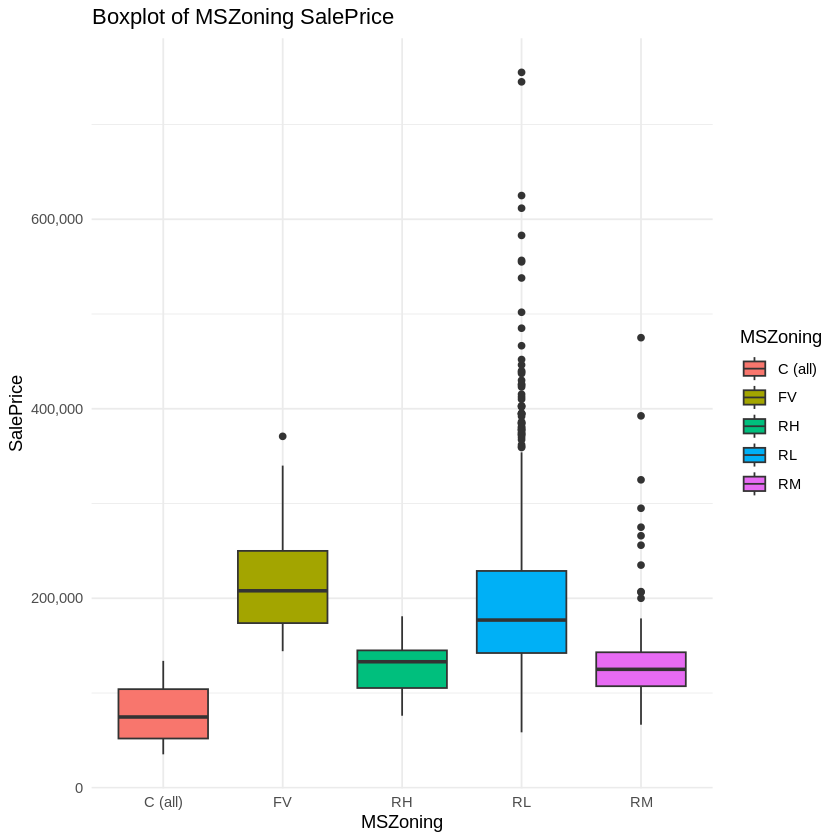

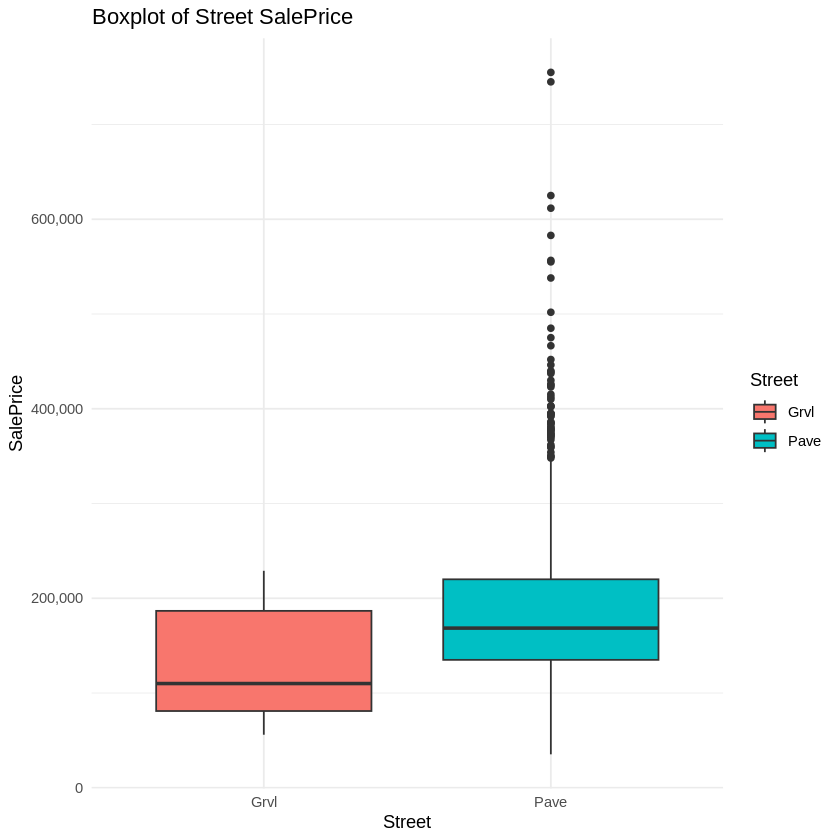

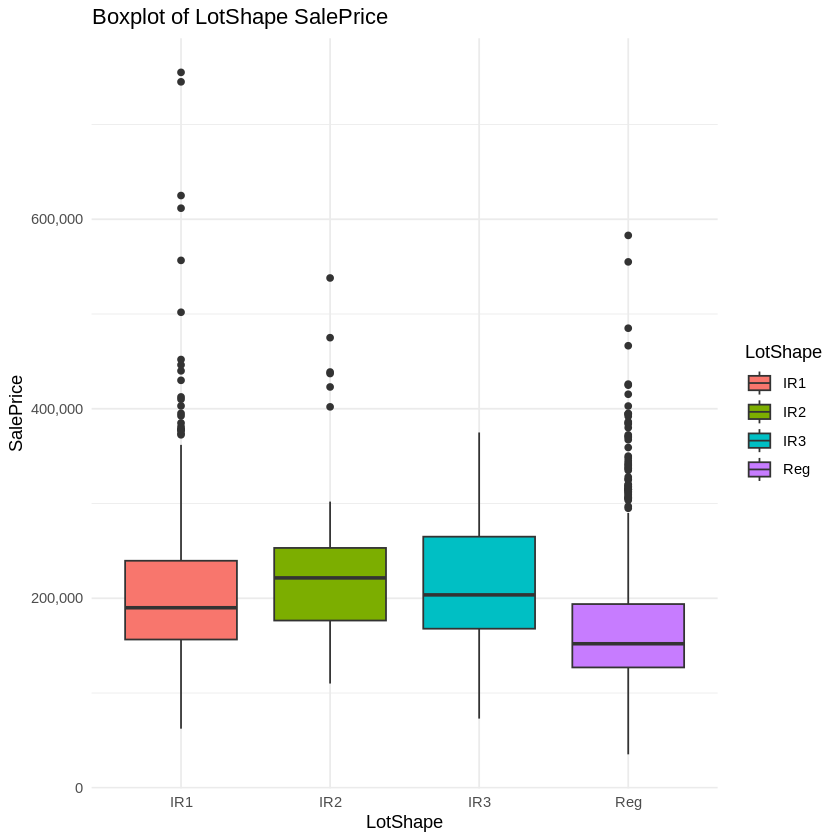

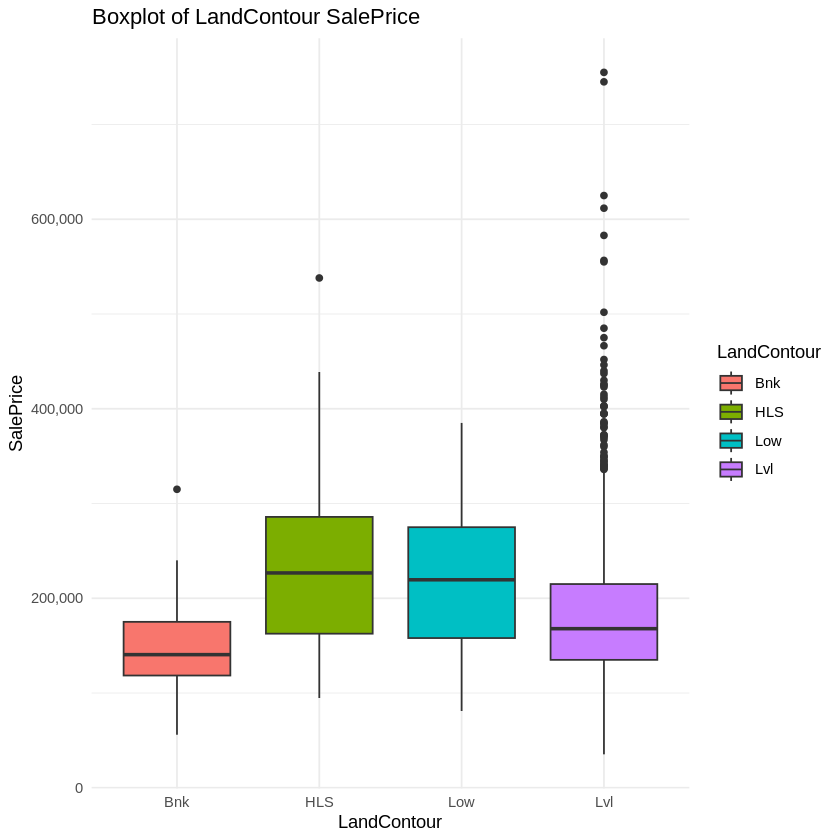

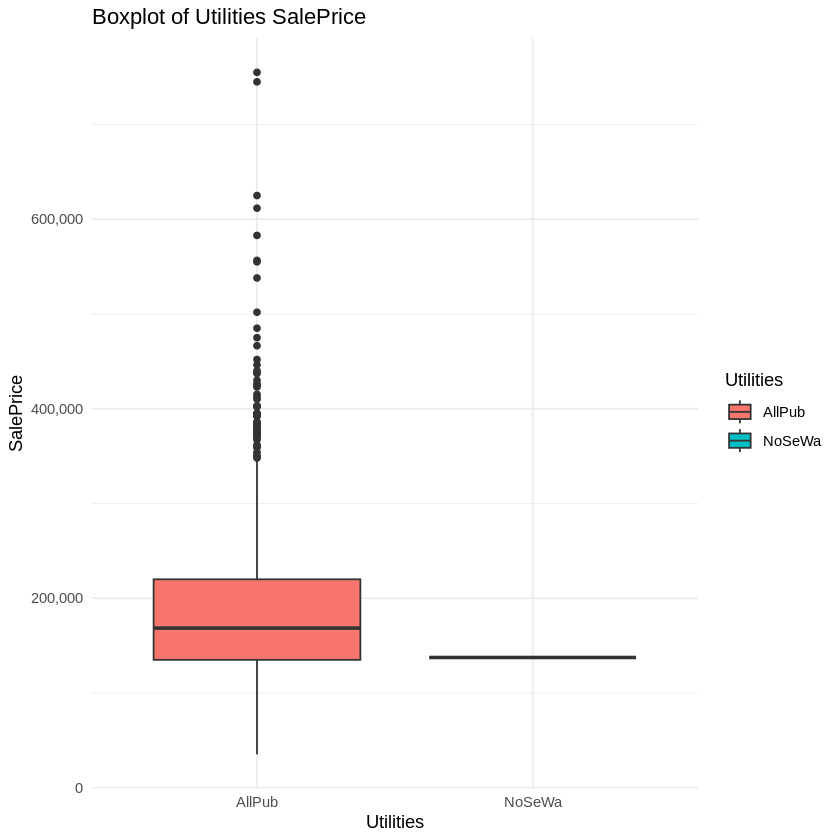

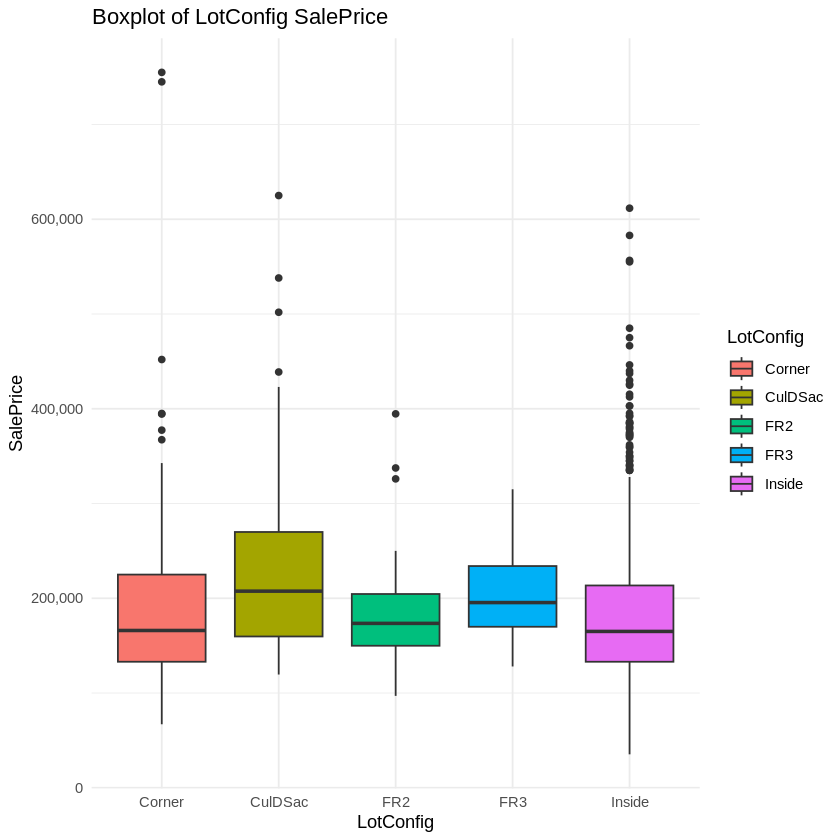

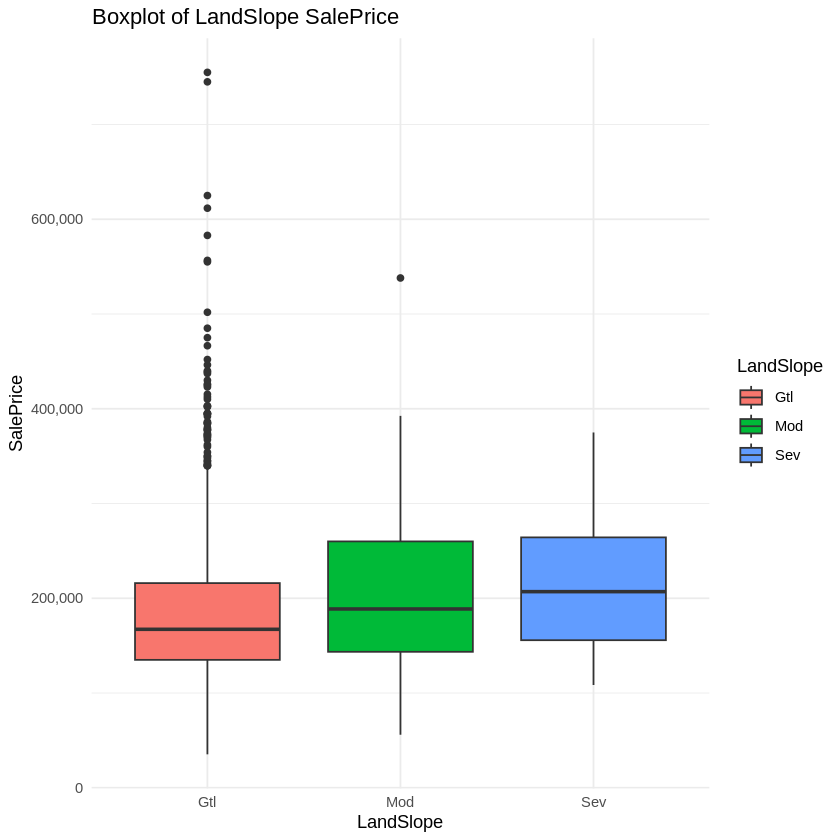

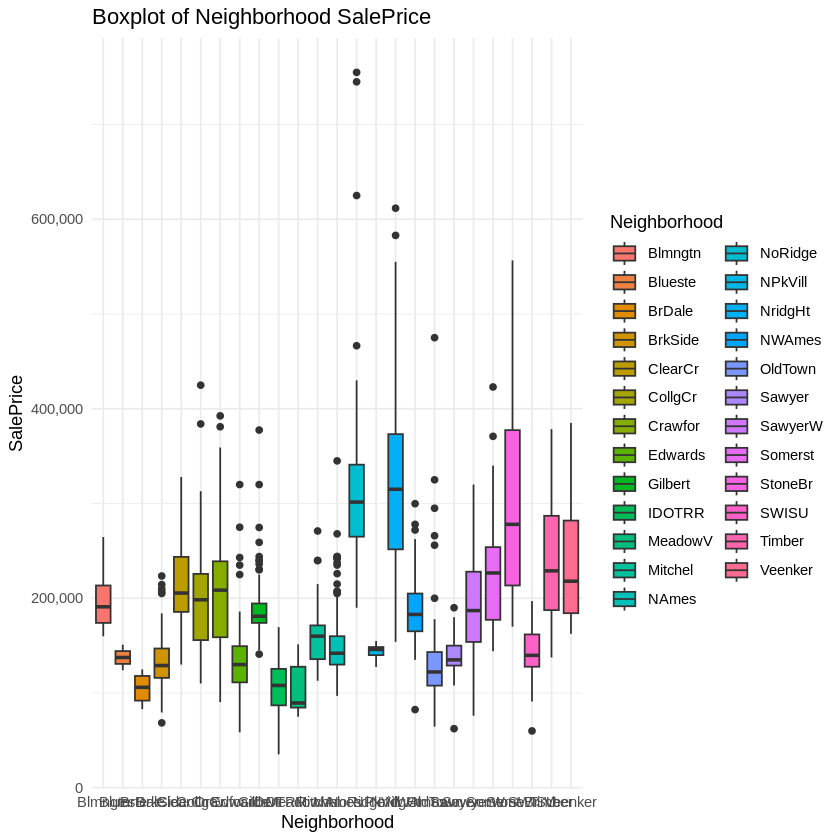

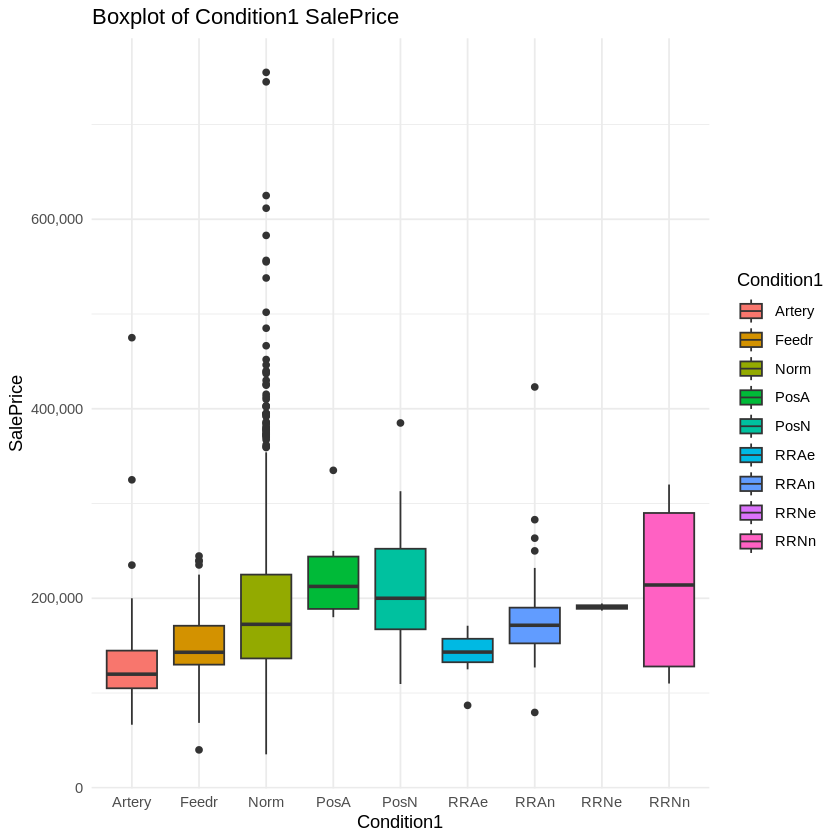

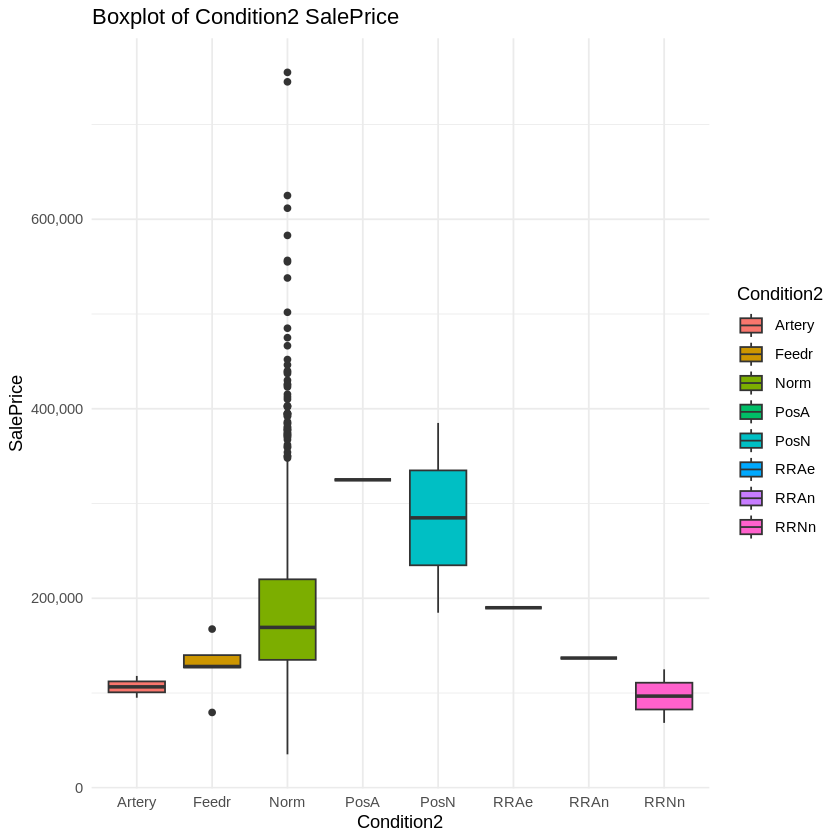

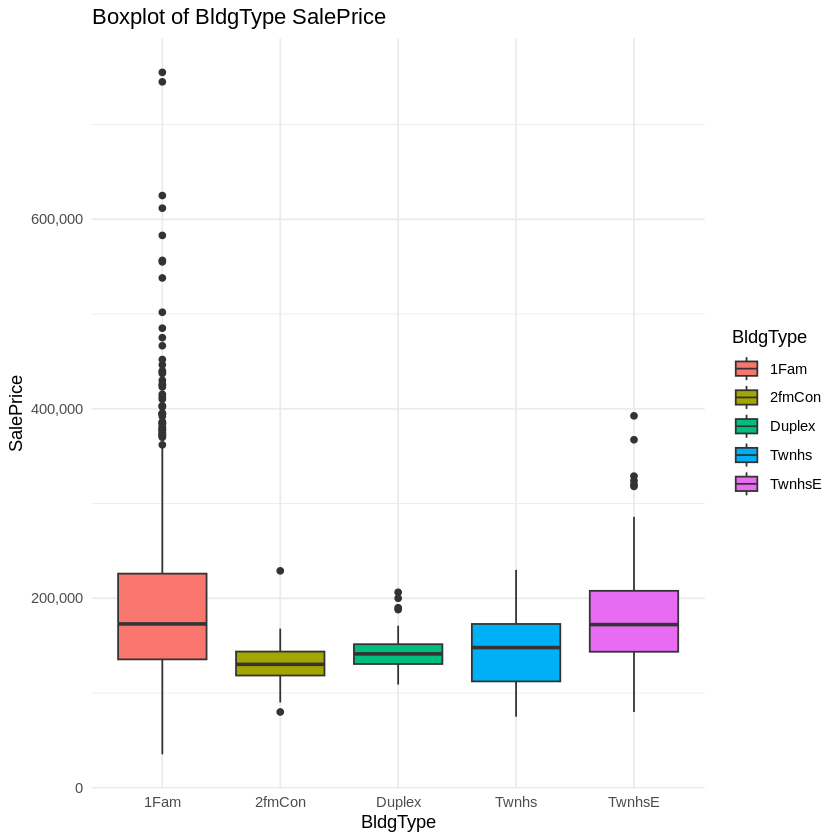

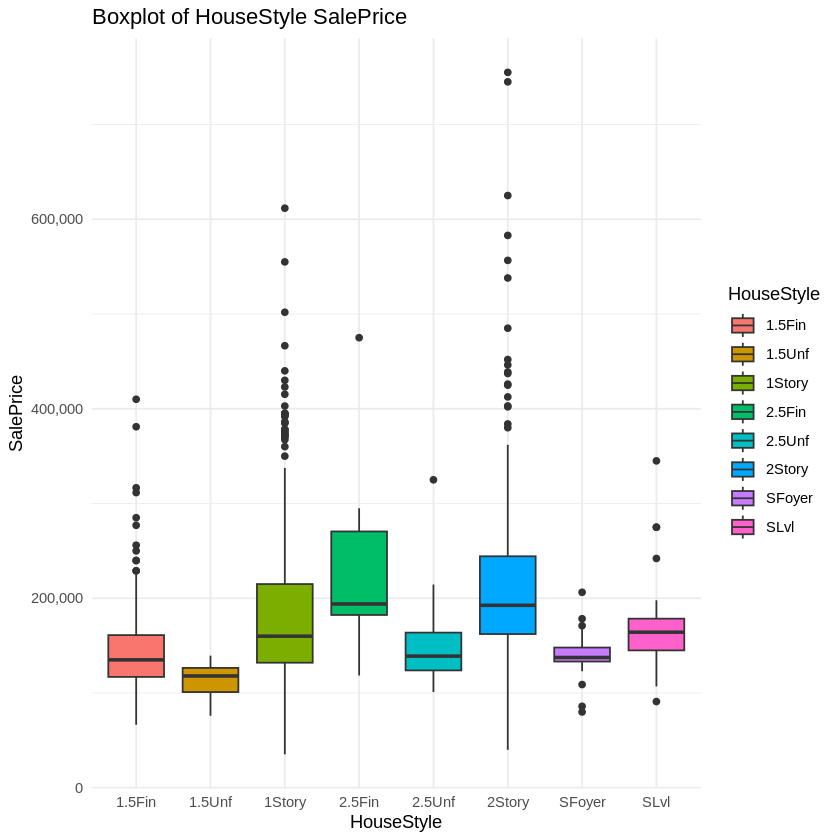

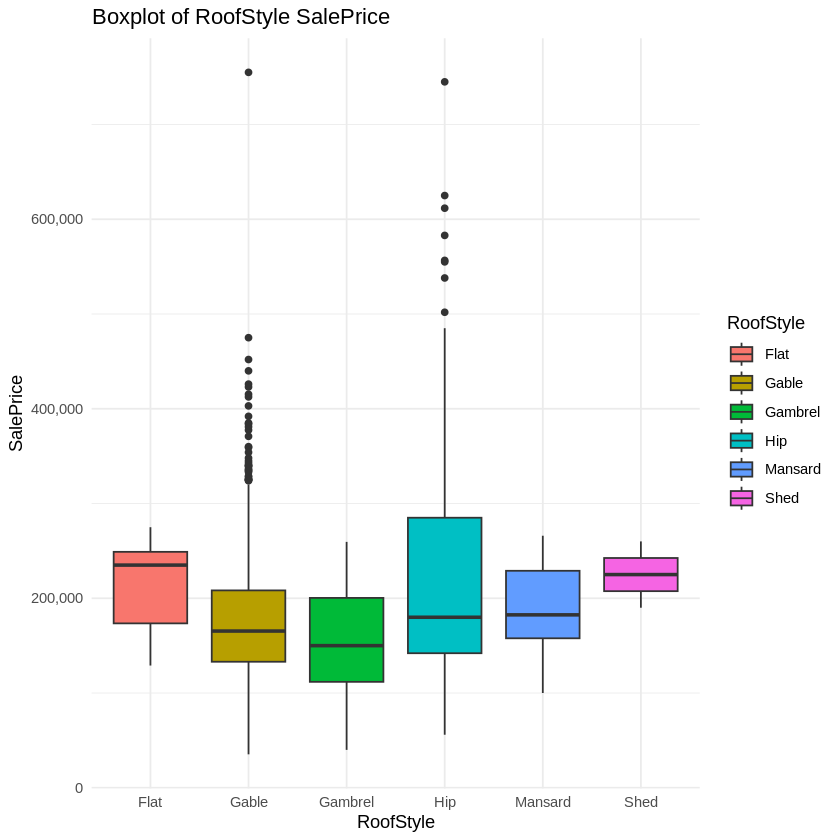

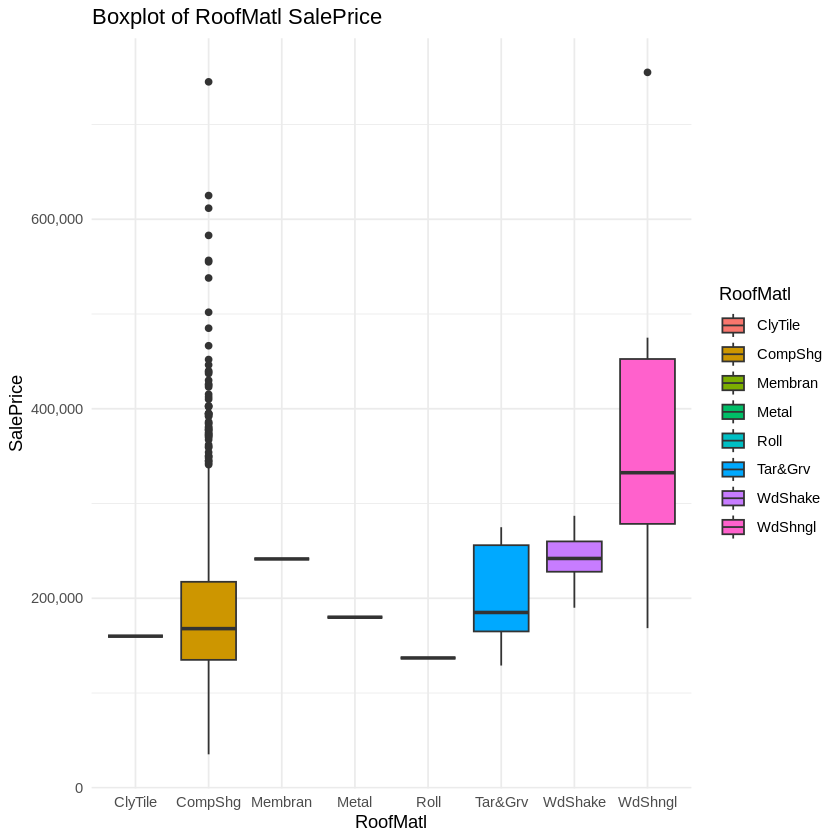

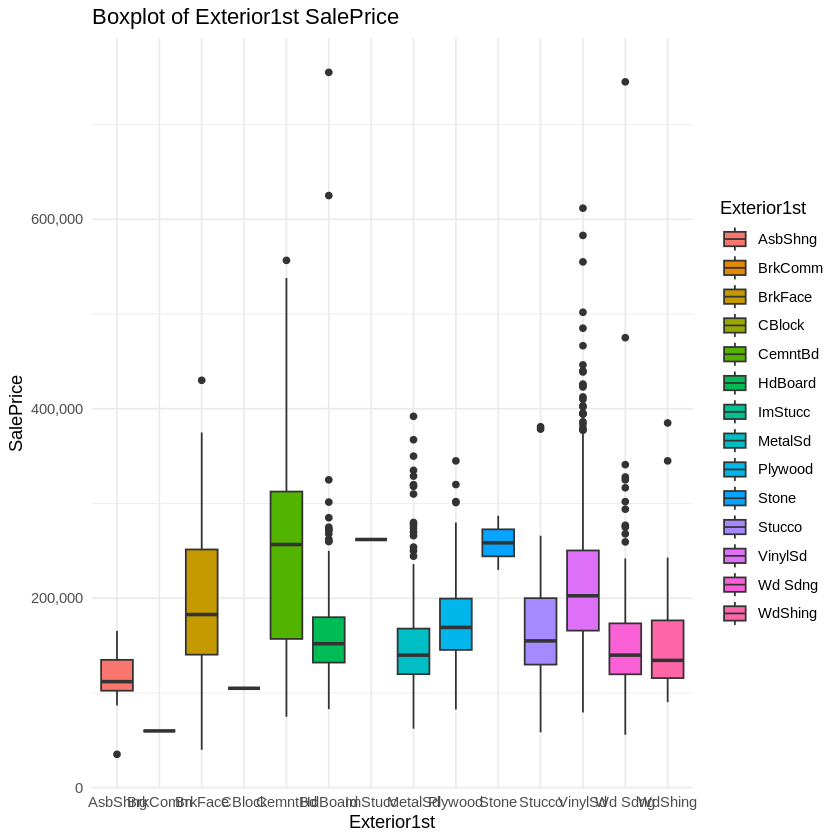

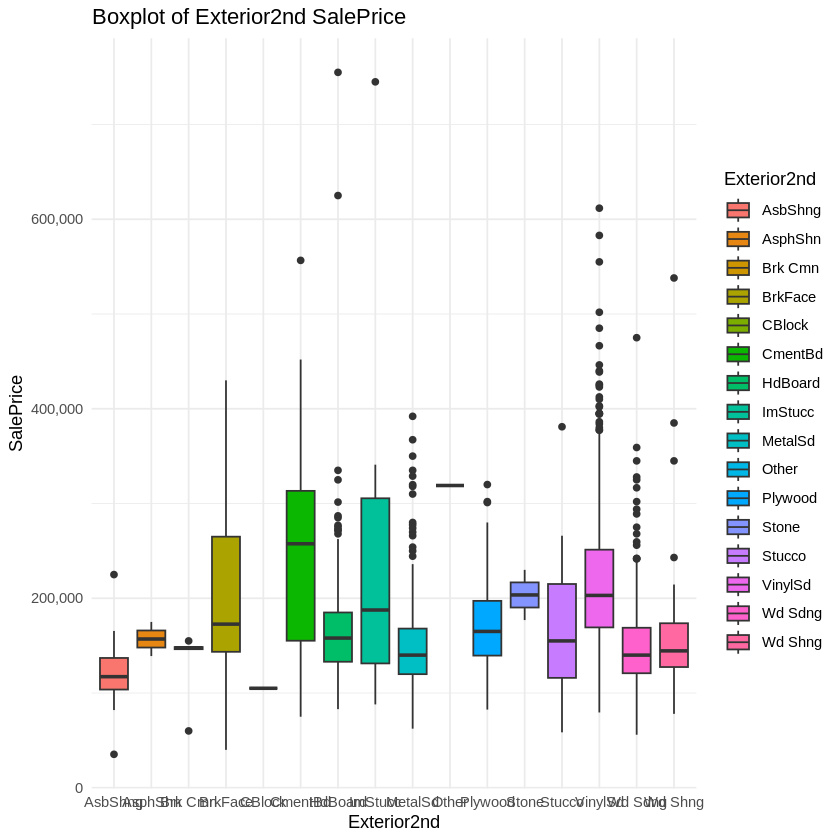

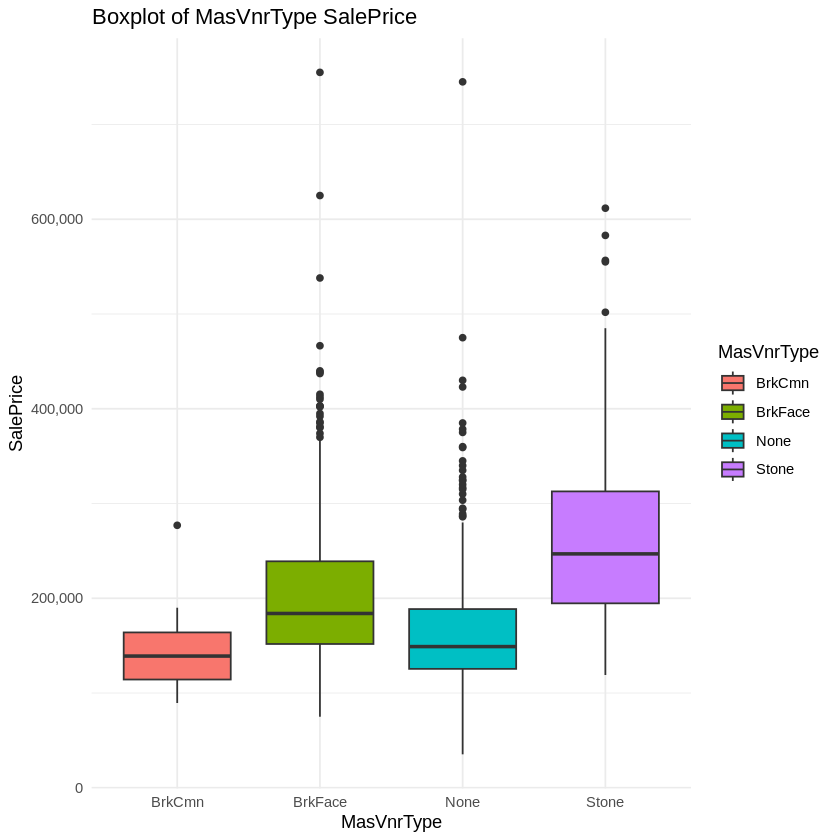

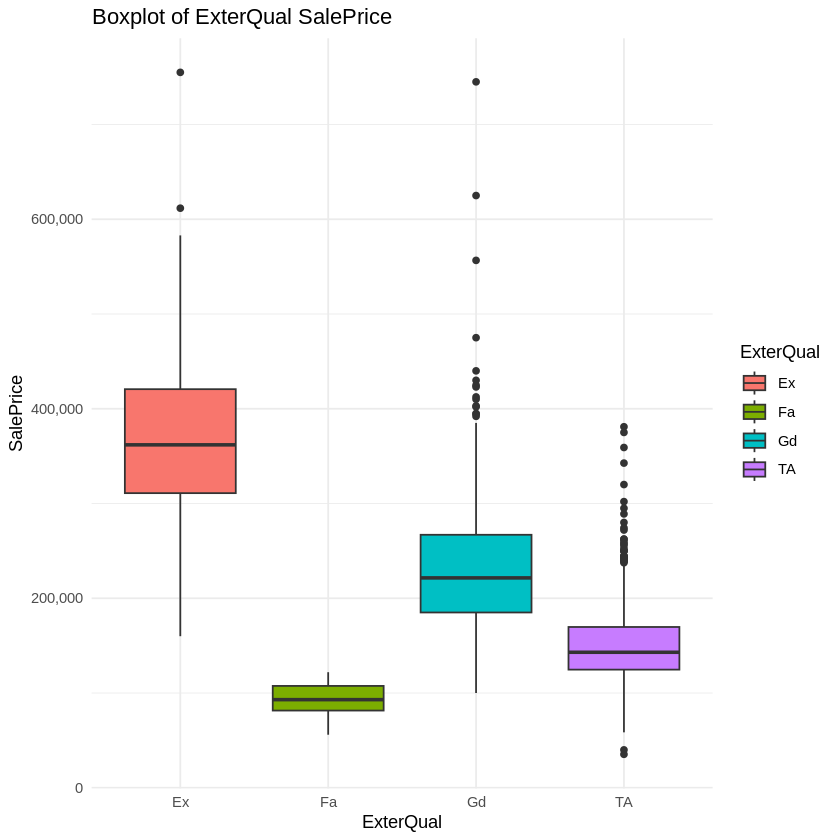

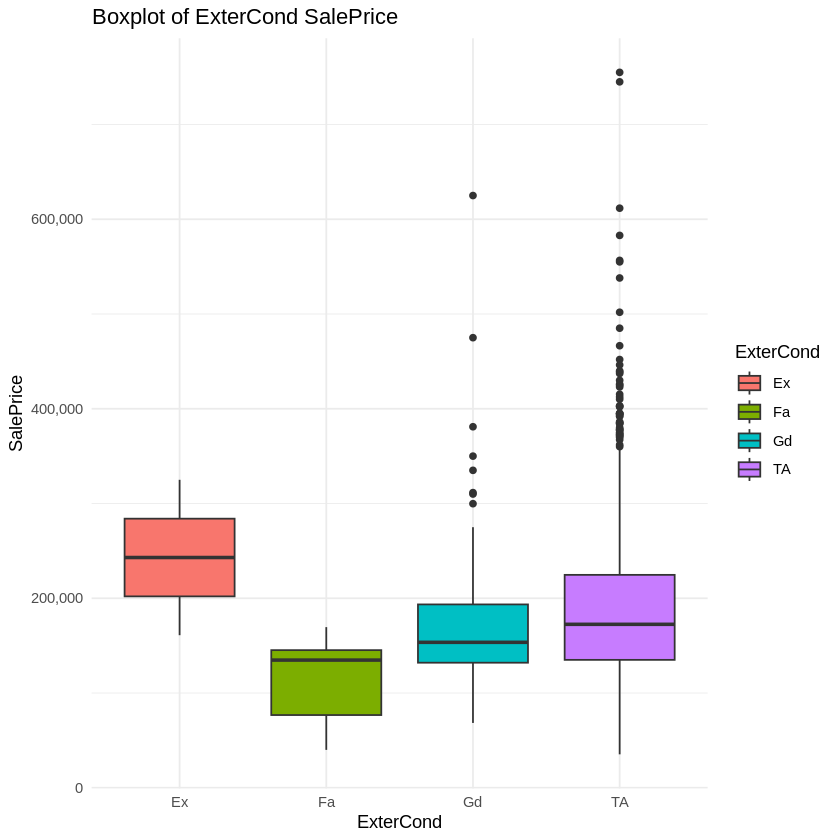

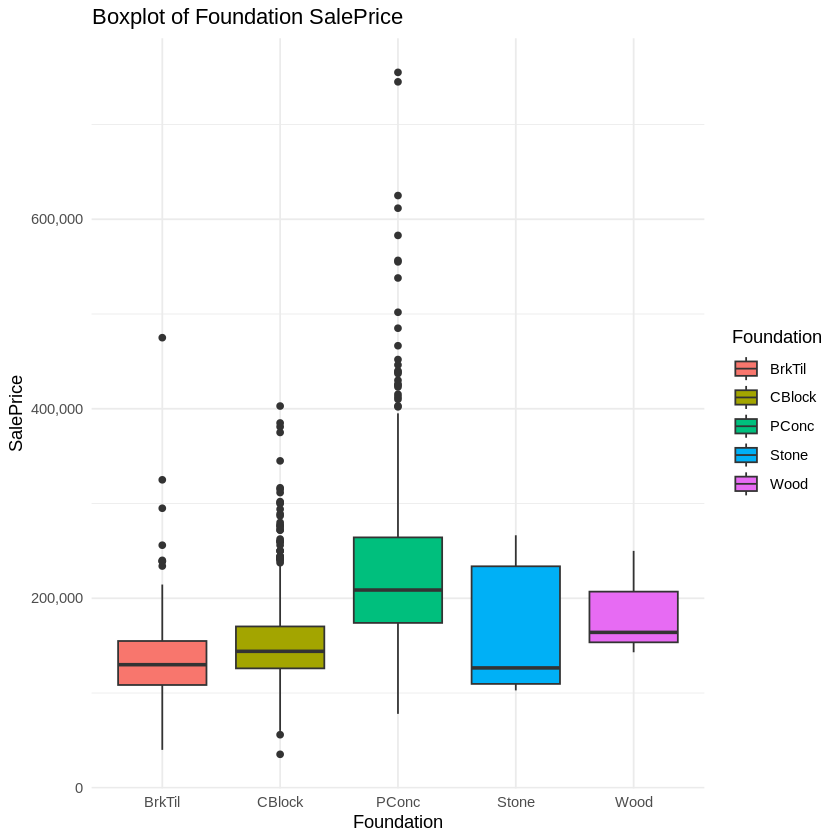

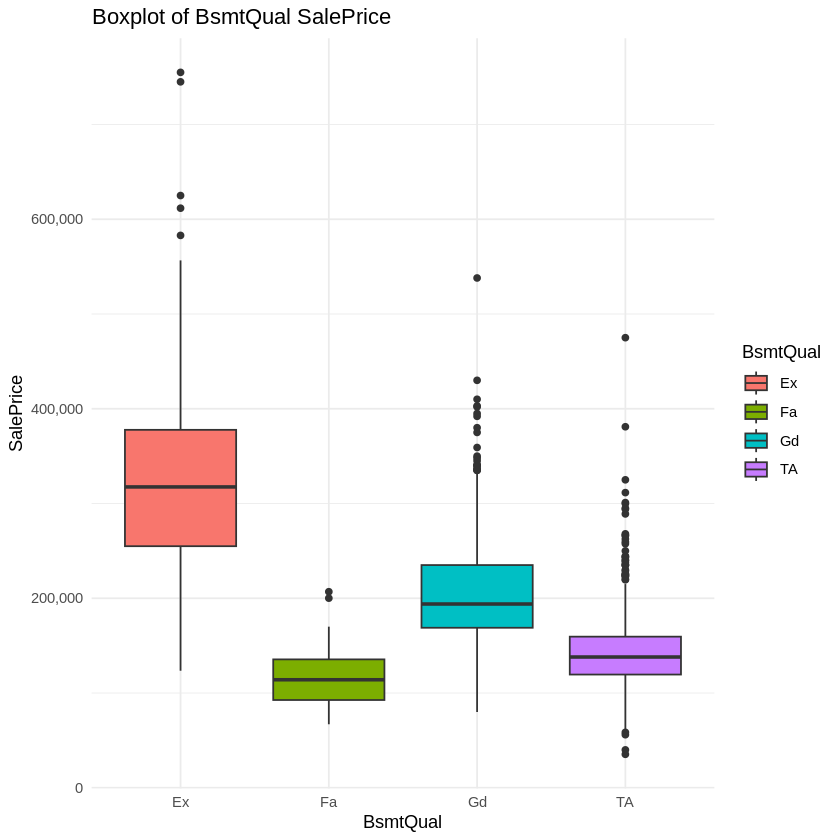

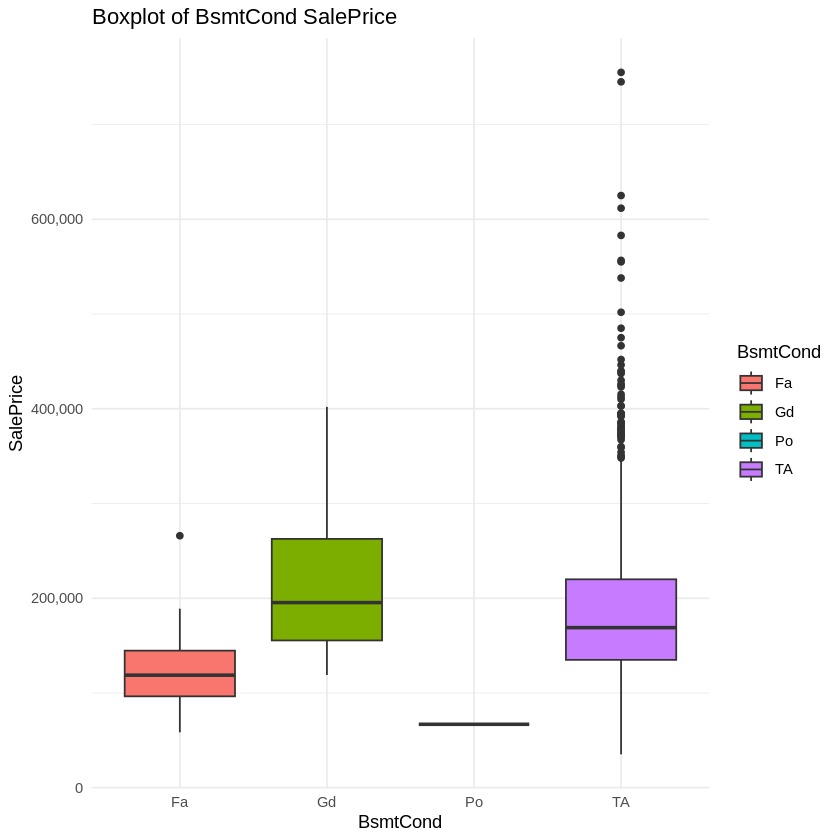

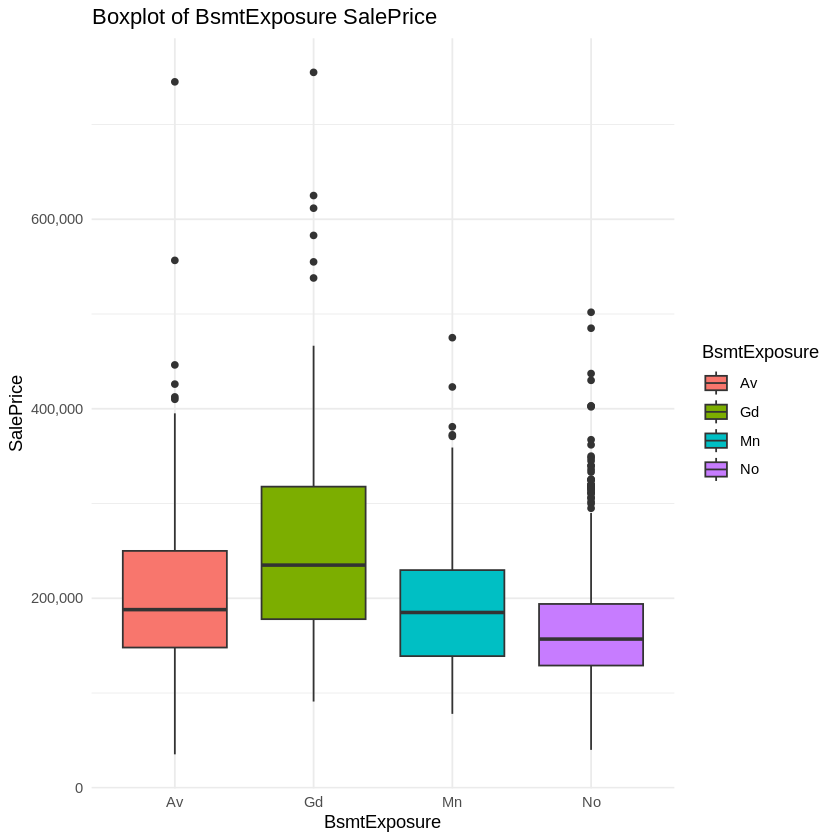

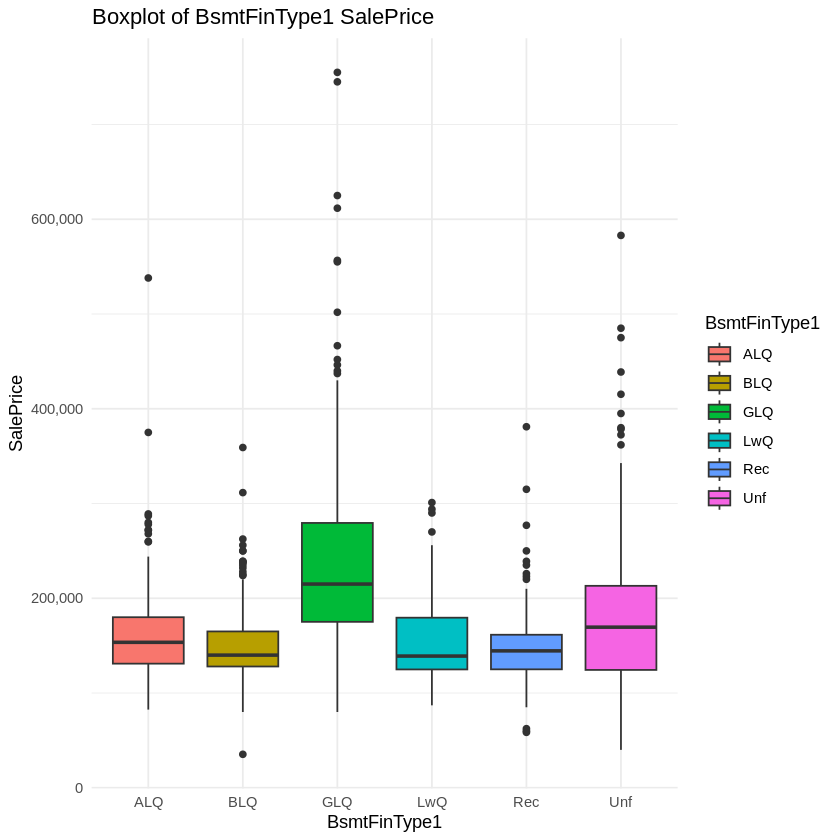

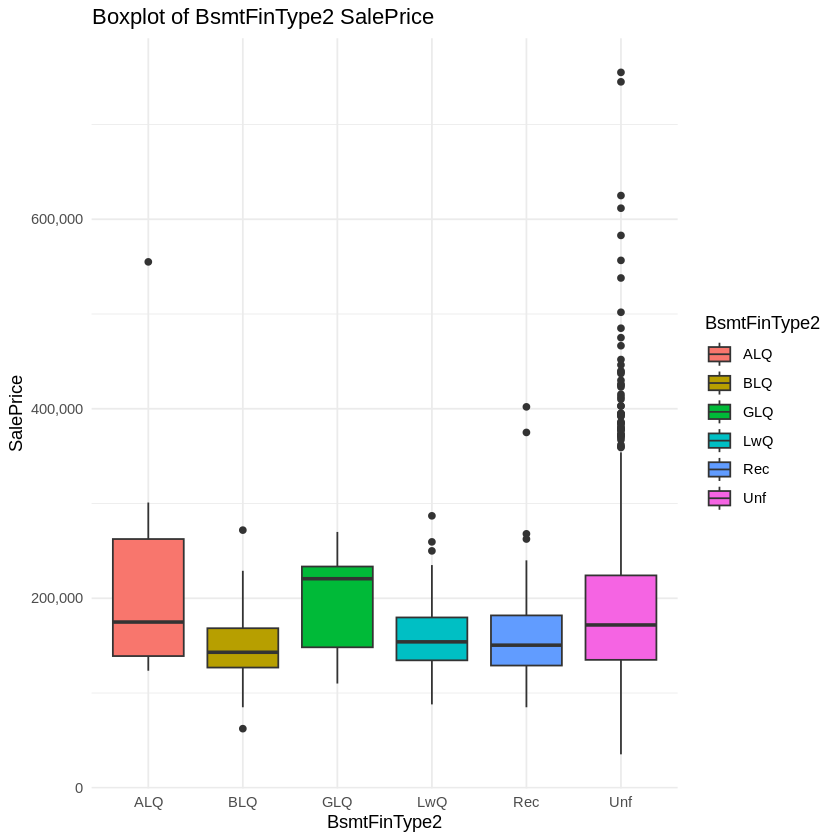

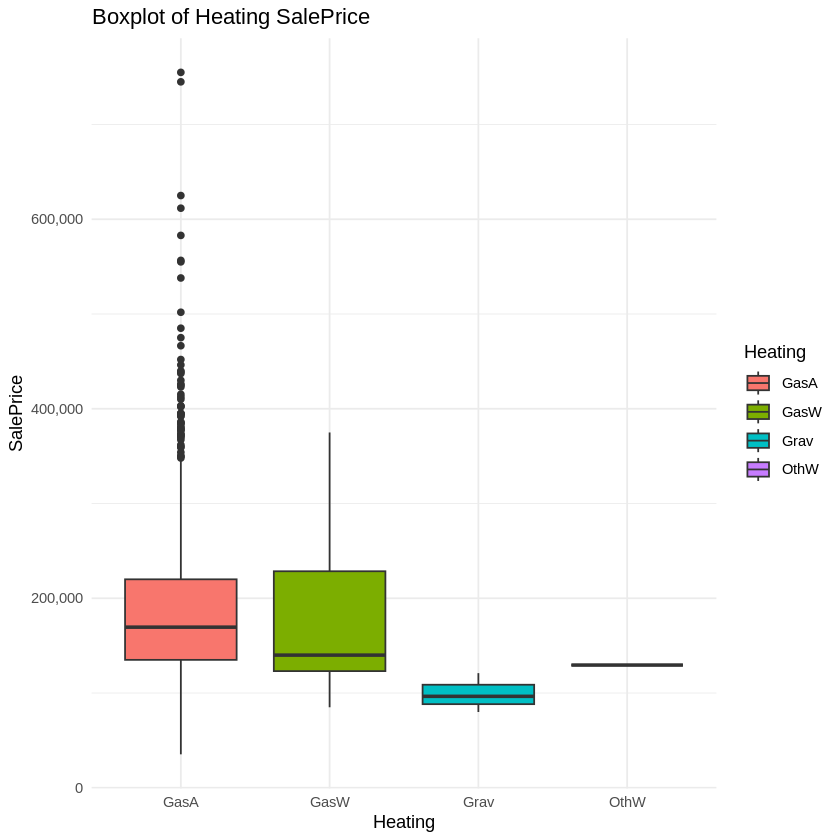

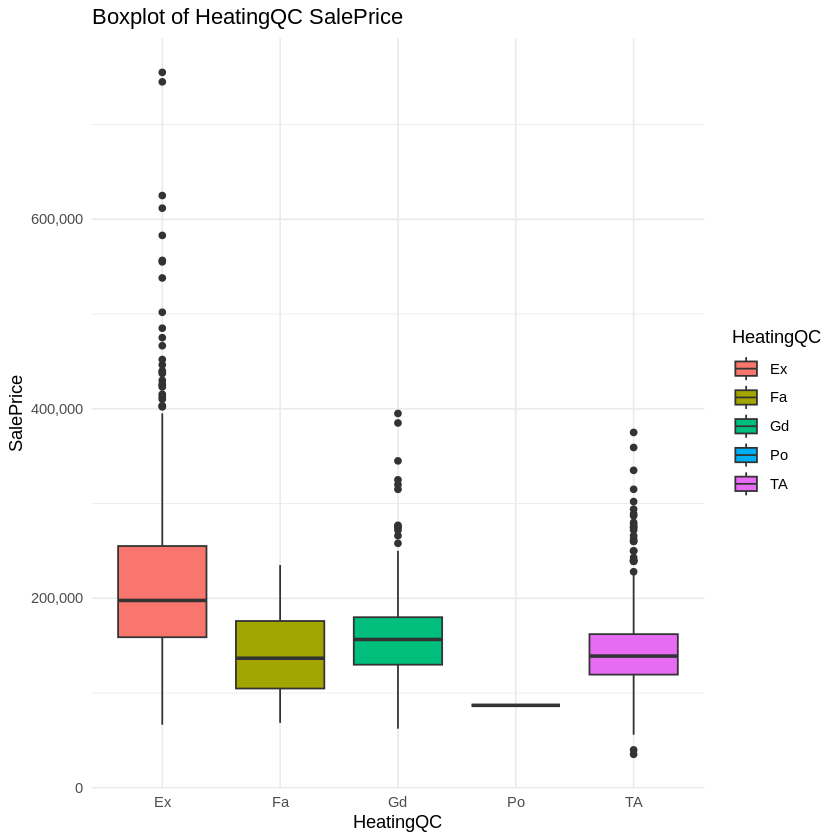

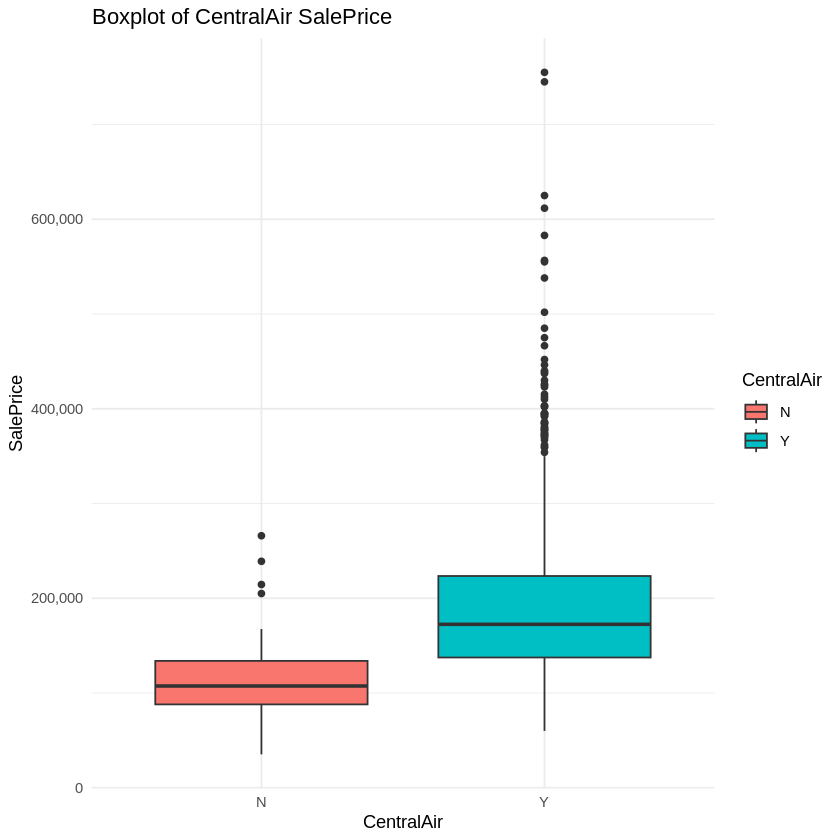

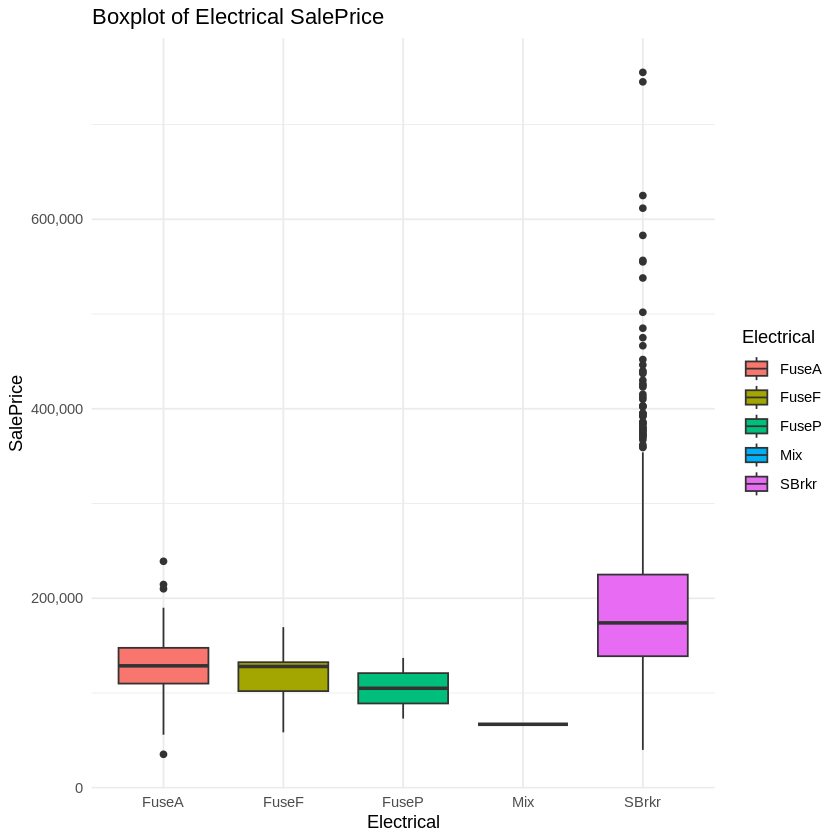

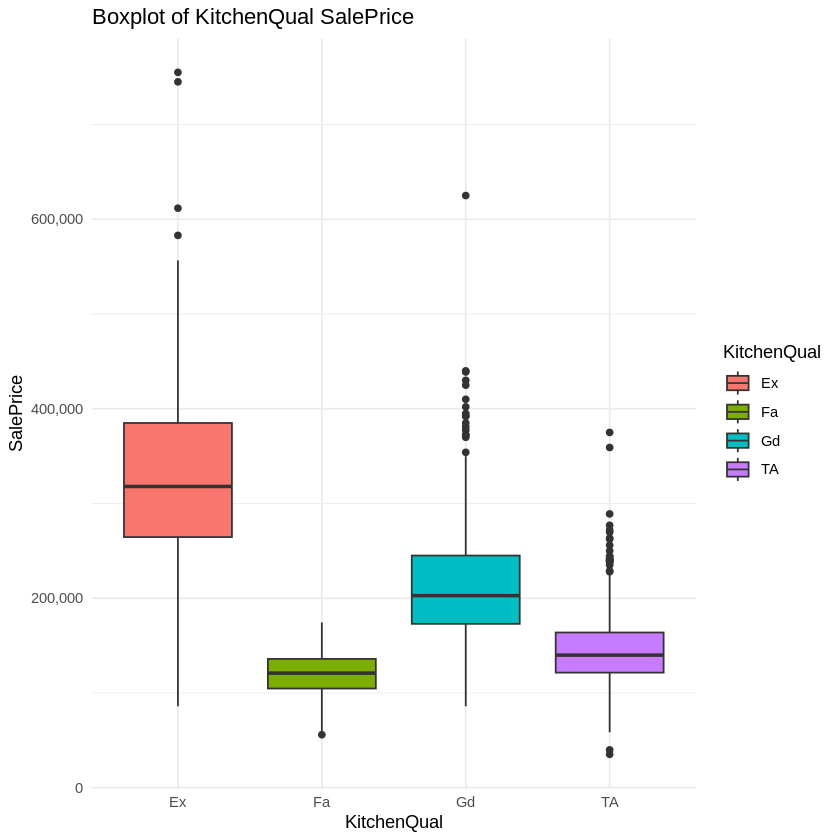

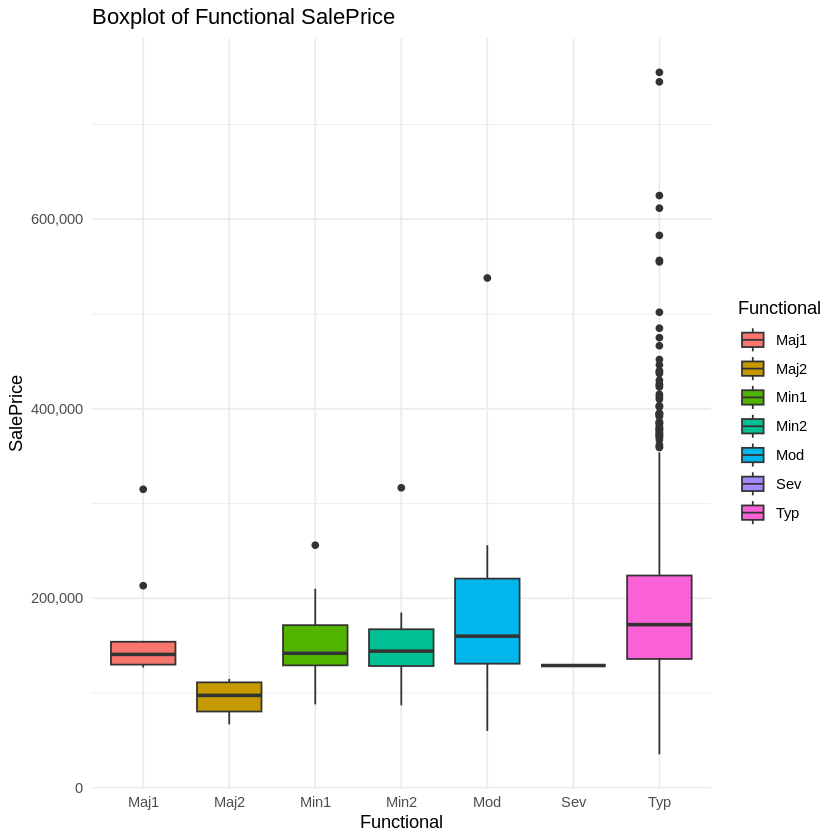

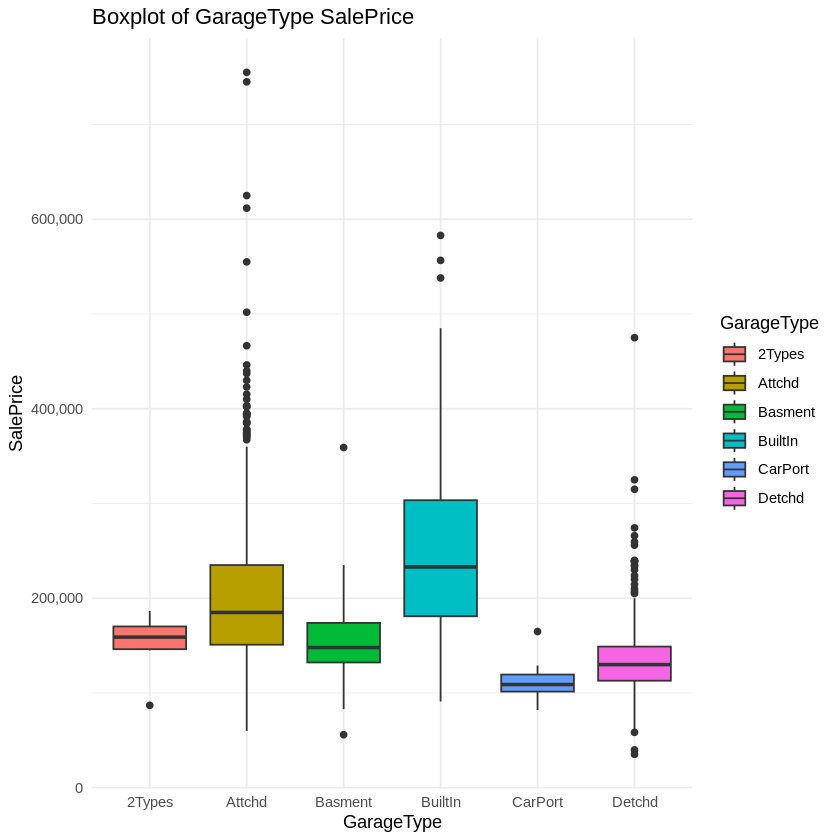

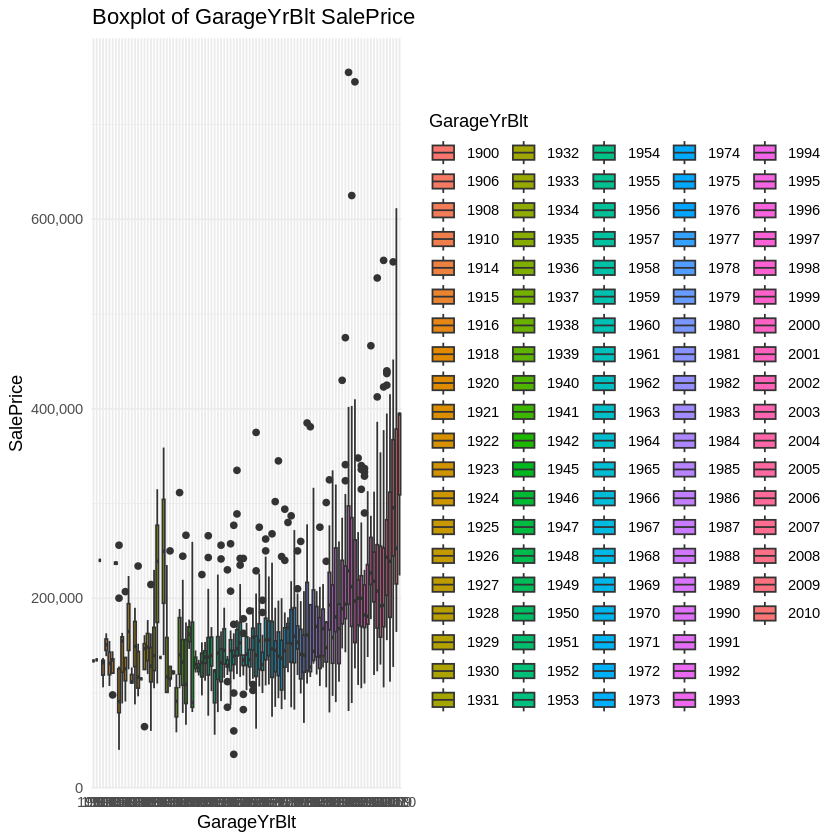

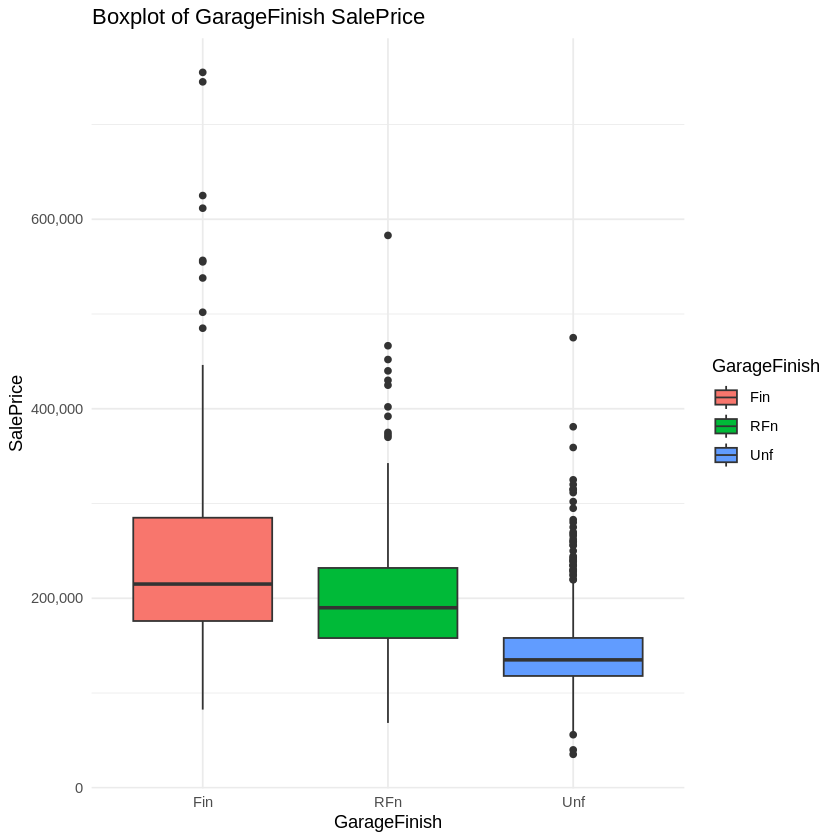

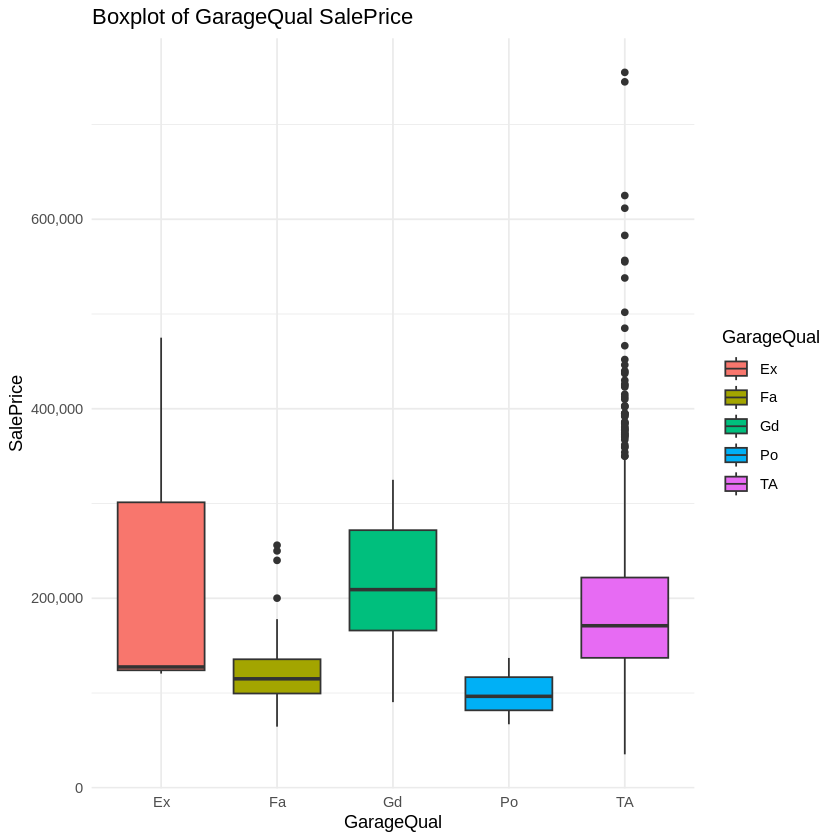

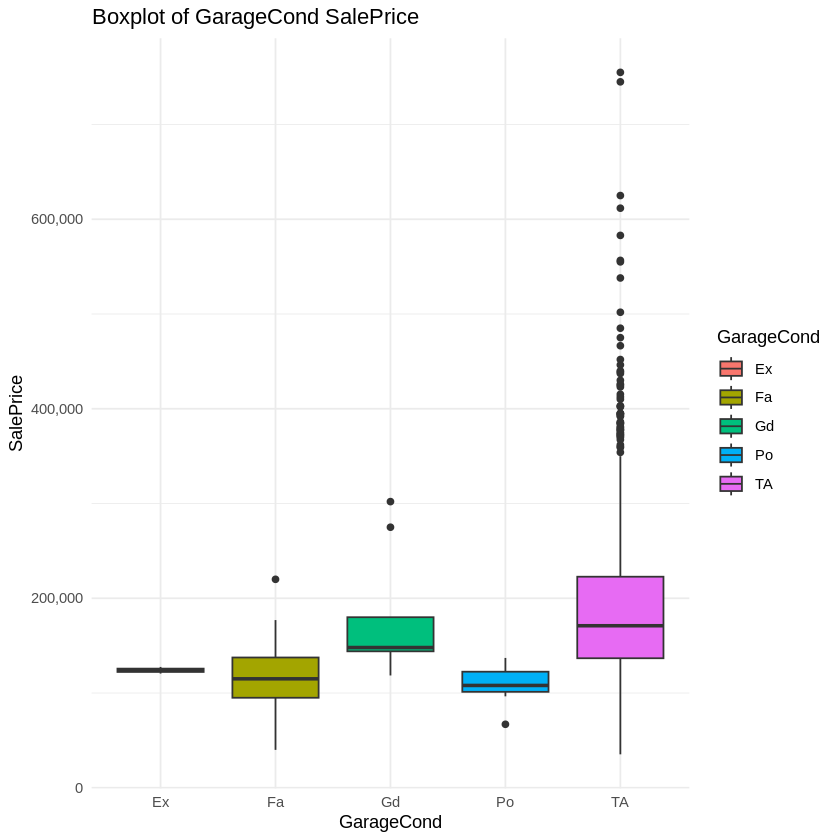

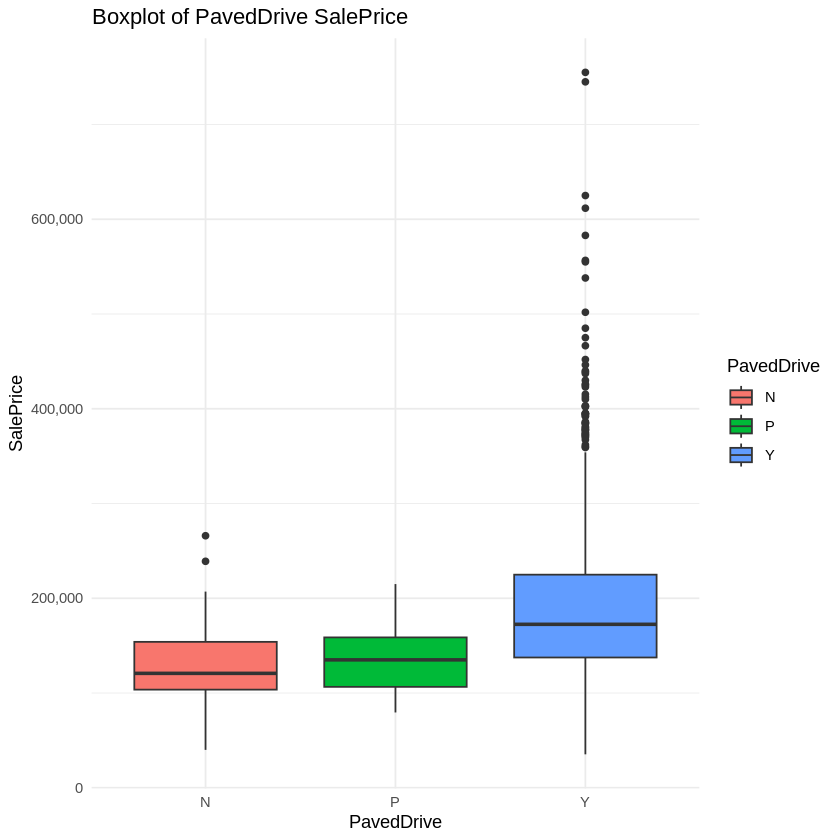

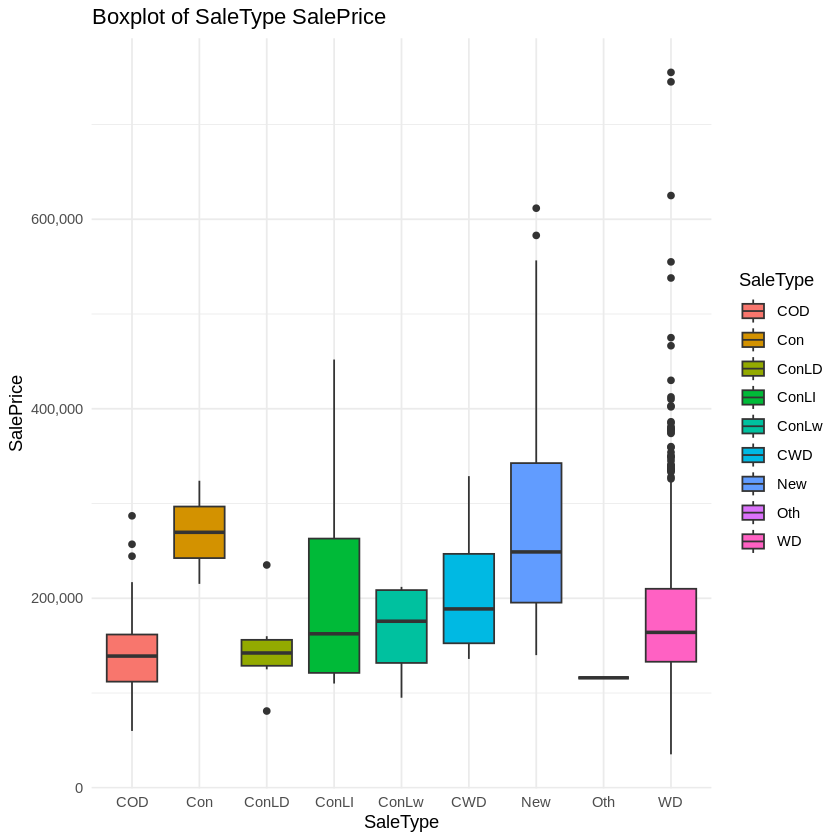

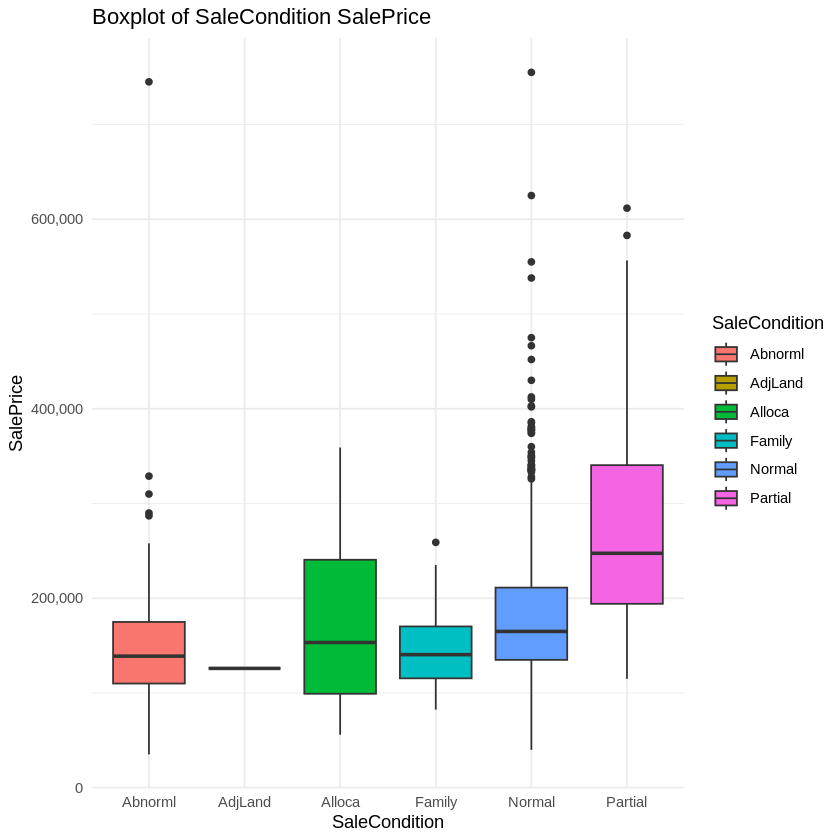

In [ ]:
# Tạo plot
plot_char_vs_label <- function(data, label_column, char_columns) {
  plots <- lapply(char_columns, function(char_column) {
    # Vẽ biểu đồ boxplot cho mỗi cột ký tự
    ggplot(data, aes(x = .data[[char_column]], y = .data[[label_column]], fill = .data[[char_column]])) +
      geom_boxplot() +
      labs(title = paste("Boxplot of", char_column, label_column),
           x = char_column,
           y = label_column) +
      theme_minimal() +
      scale_y_continuous(labels = scales::comma)  # Đặt lại định dạng trục y
  })

  # Hiển thị các biểu đồ
  return(plots)
}

# Sử dụng hàm với dữ liệu mẫu
plots <- plot_char_vs_label(data, "SalePrice", cat_cols)

# Hiển thị các biểu đồ
for (i in seq_along(plots)) {
  print(plots[[i]])
}


**Nhận Xét**

1. Đa số biến độc lập có phân phối tập trung trong khoảng giá từ 100,000 đến 300,000 đối với biến phụ thuộc SalePrice.

2. Các biến SaleCondition, GarageQual, GarageCond, PavedDrive, SaleType, Heating, HeatingQC, CentralAir, Electrical, SaleCondition, Exterior, ExterCond, Foundation, BsmtQual, BsmtCond, Condition1, Condition2, BldgType, HouseStyle, MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood đều có phân phối tập trung trong khoảng giá từ 100,000 đến 400,000.

3. Các biến GarageQual, GarageCond, PavedDrive, SaleType, Heating, HeatingQC, CentralAir, Electrical, SaleCondition, Exterior, ExterCond, Foundation, BsmtQual, BsmtCond, Condition1, Condition2, BldgType, HouseStyle, MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood có nhiều giá trị ngoại lệ so với các biến khác.

### 4.2.2 Trực quan các biến numerical với biến phụ thuộc

Chuẩn hóa log cho cột SalePrice để vẽ biểu đồ cột

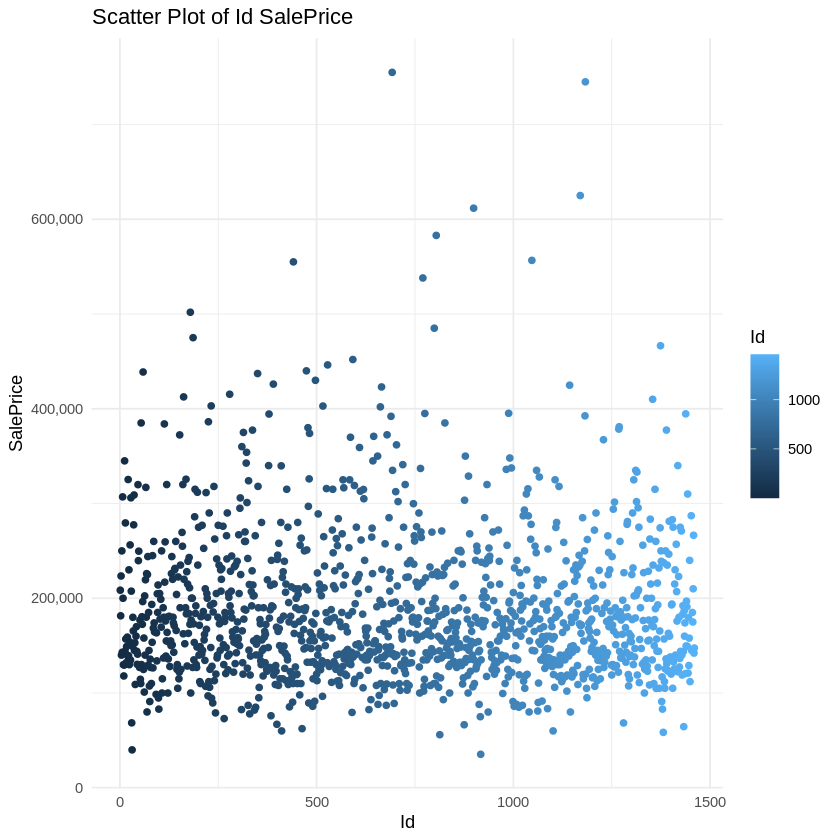

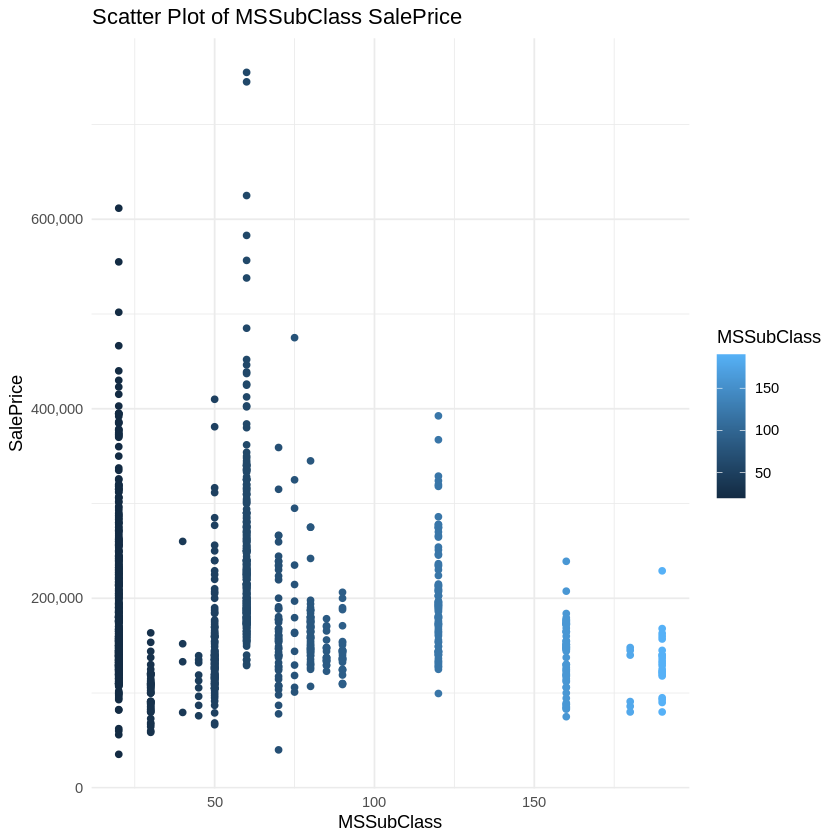

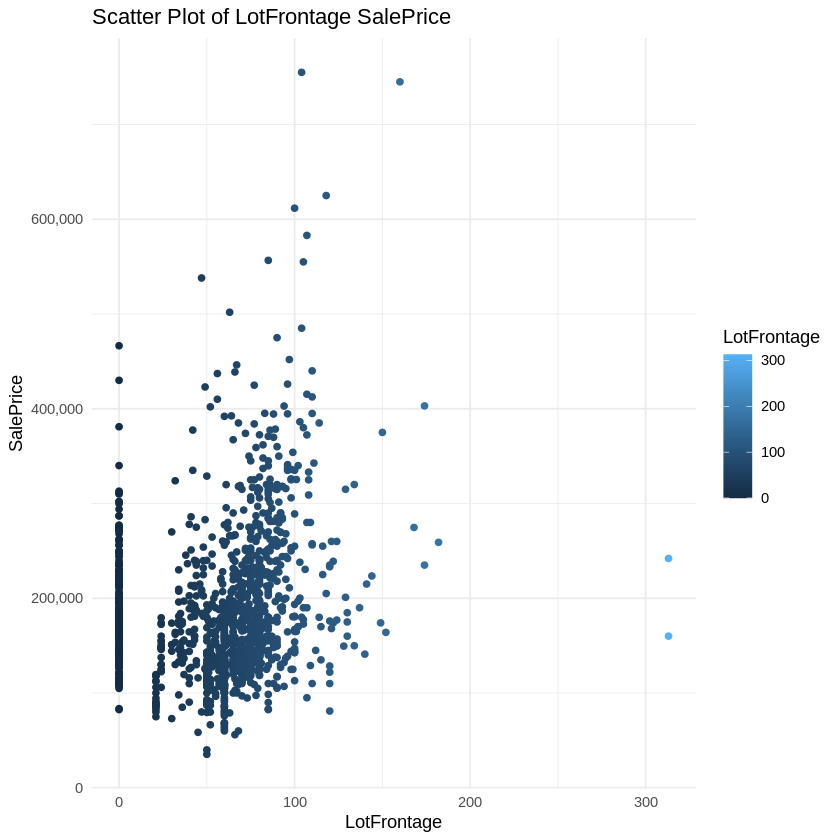

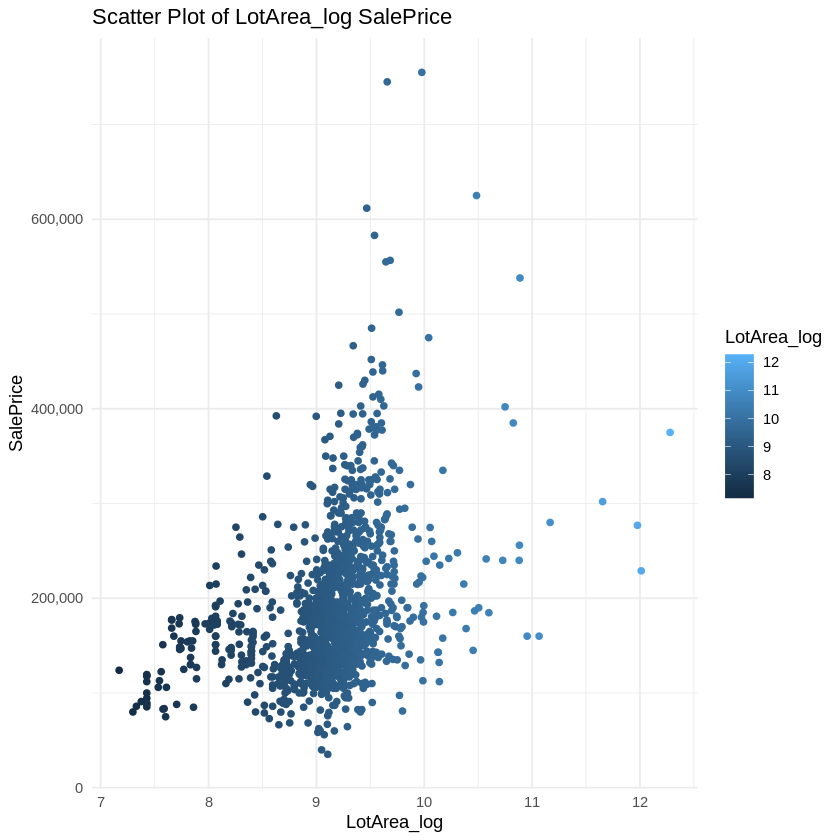

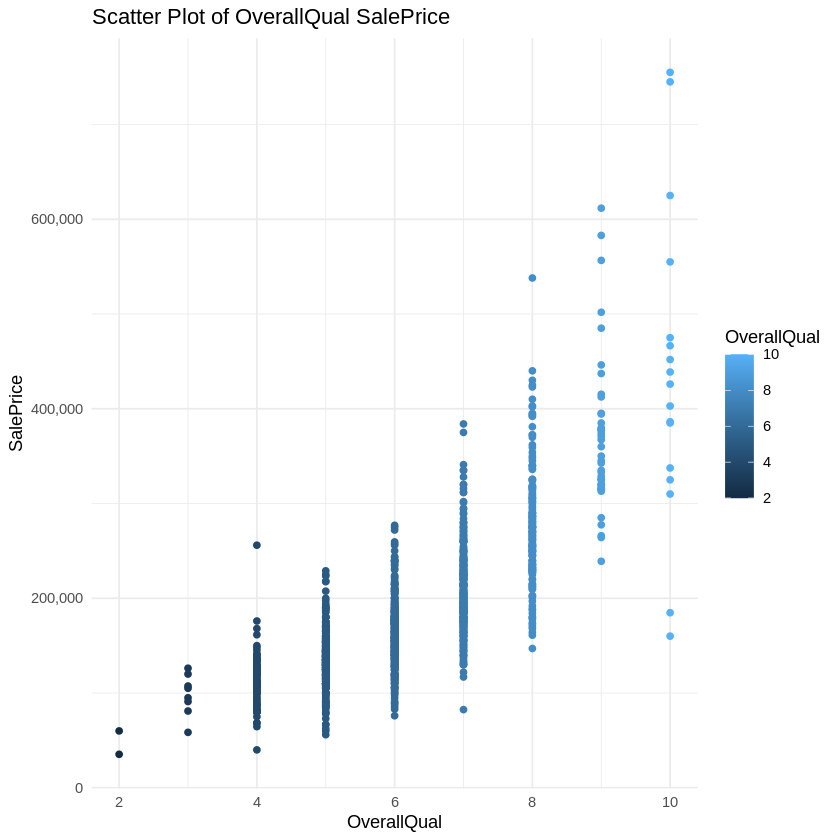

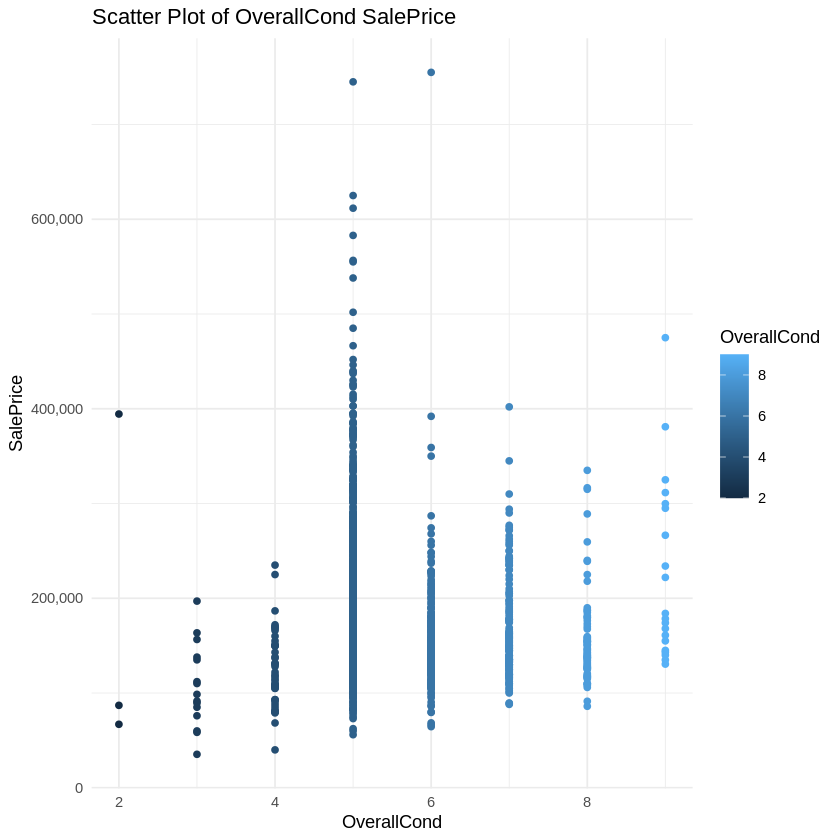

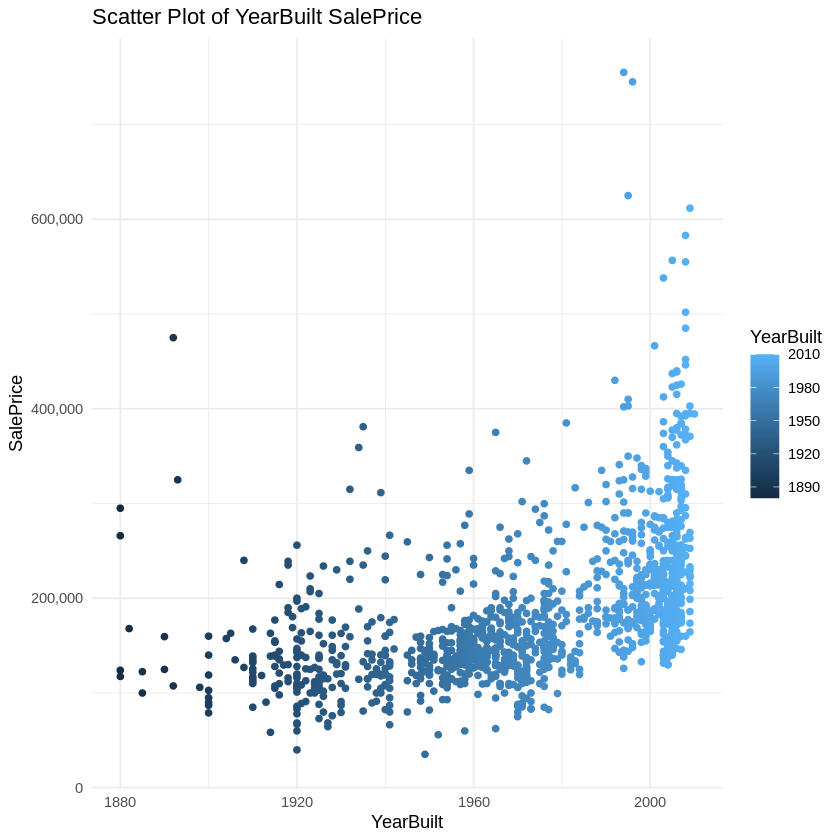

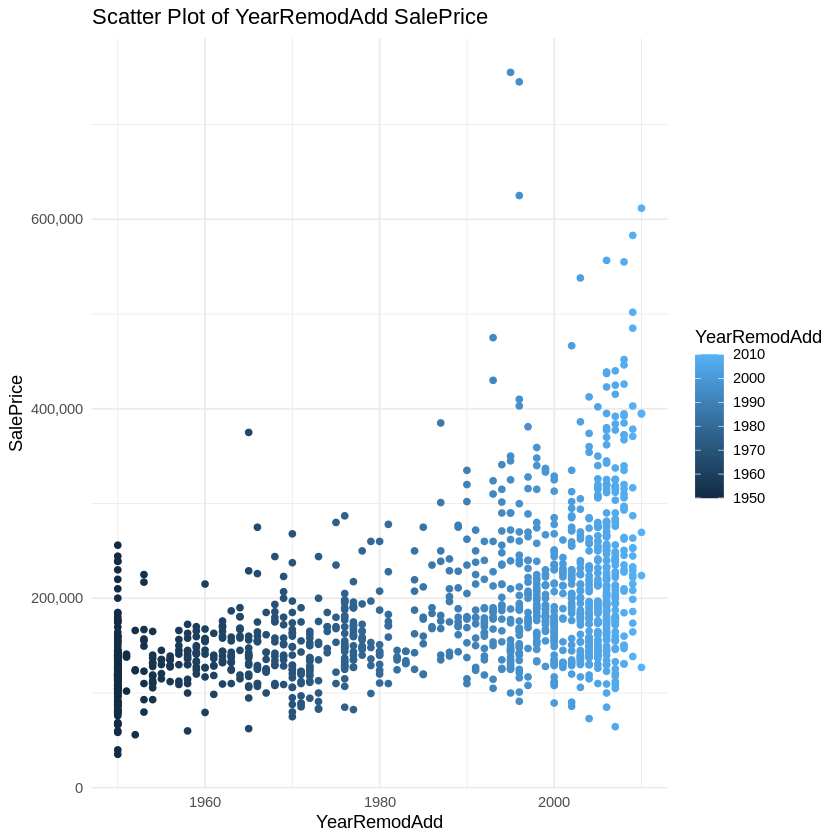

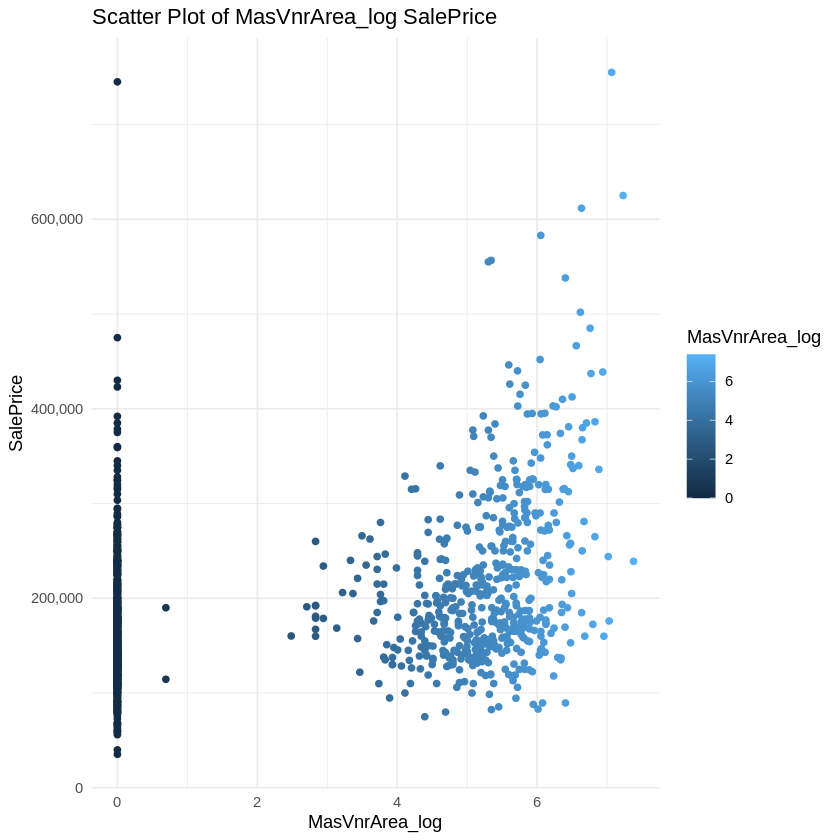

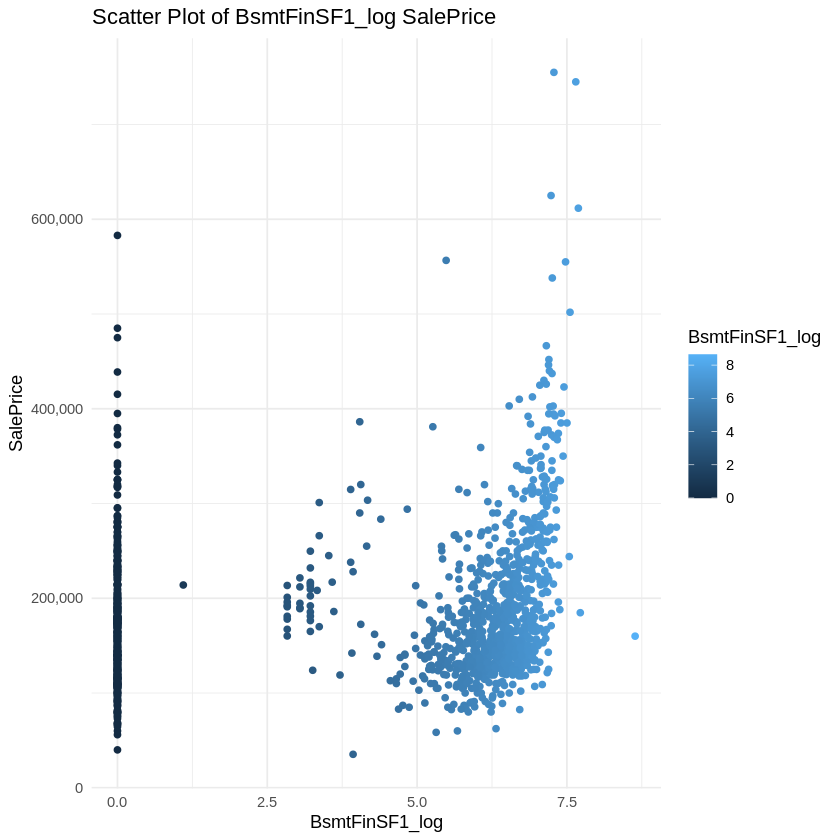

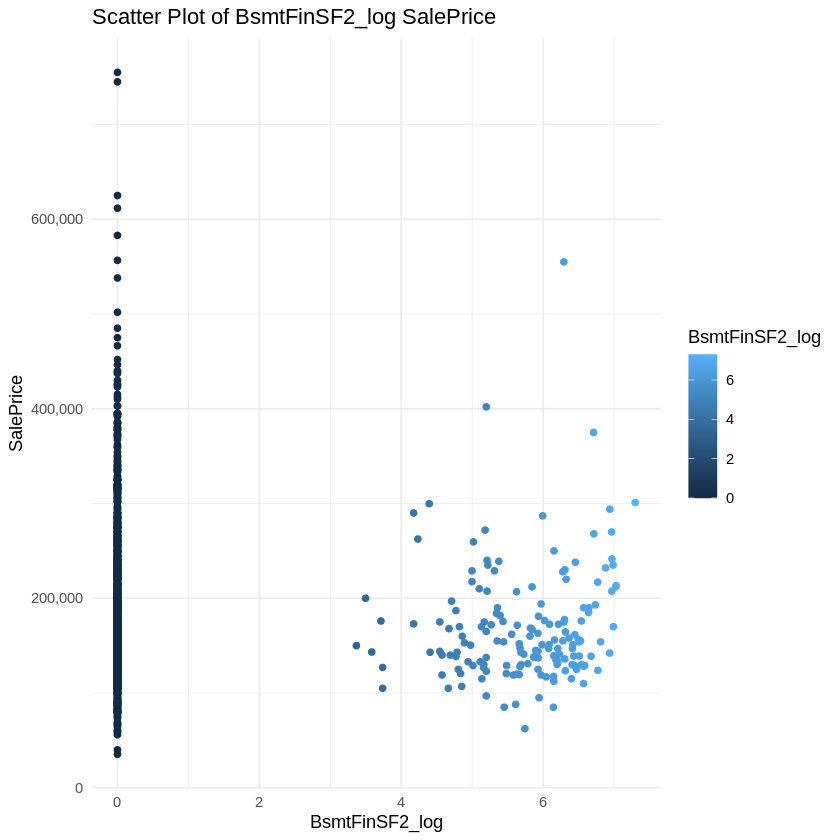

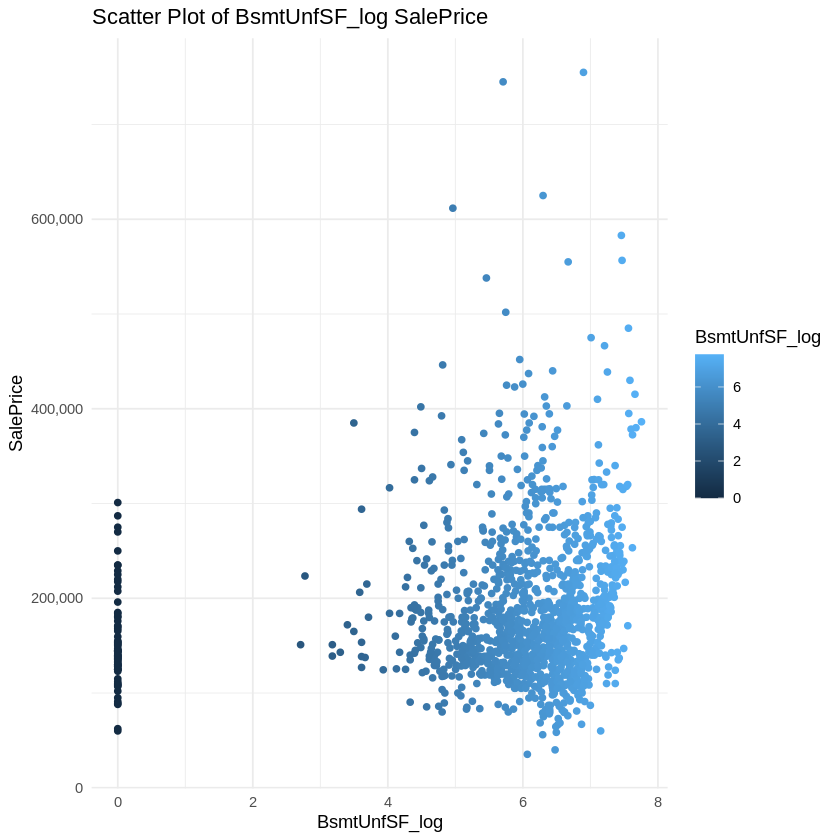

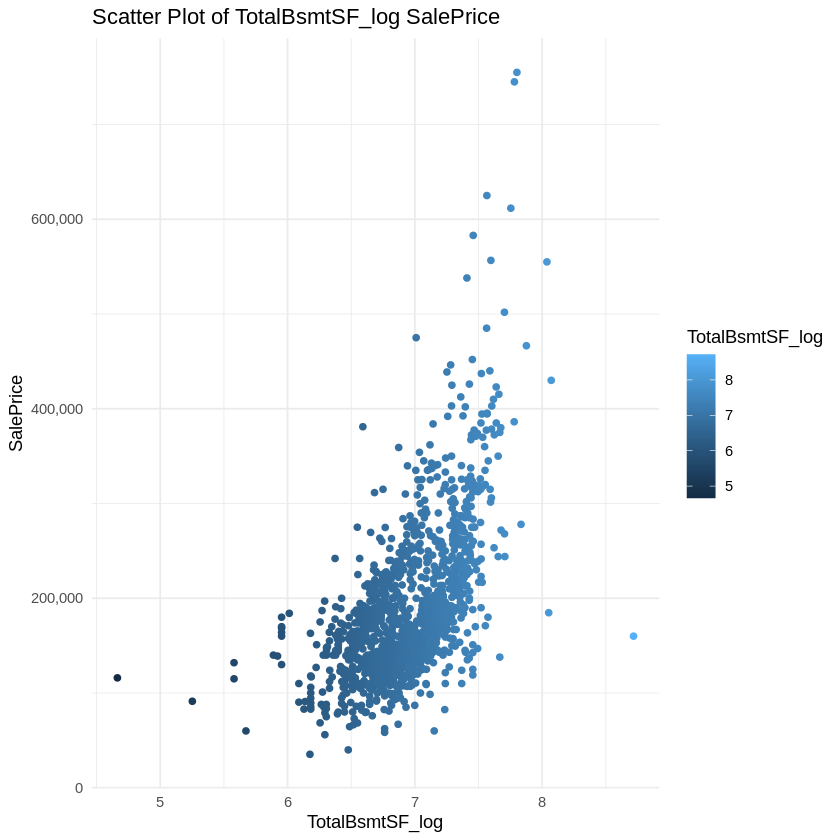

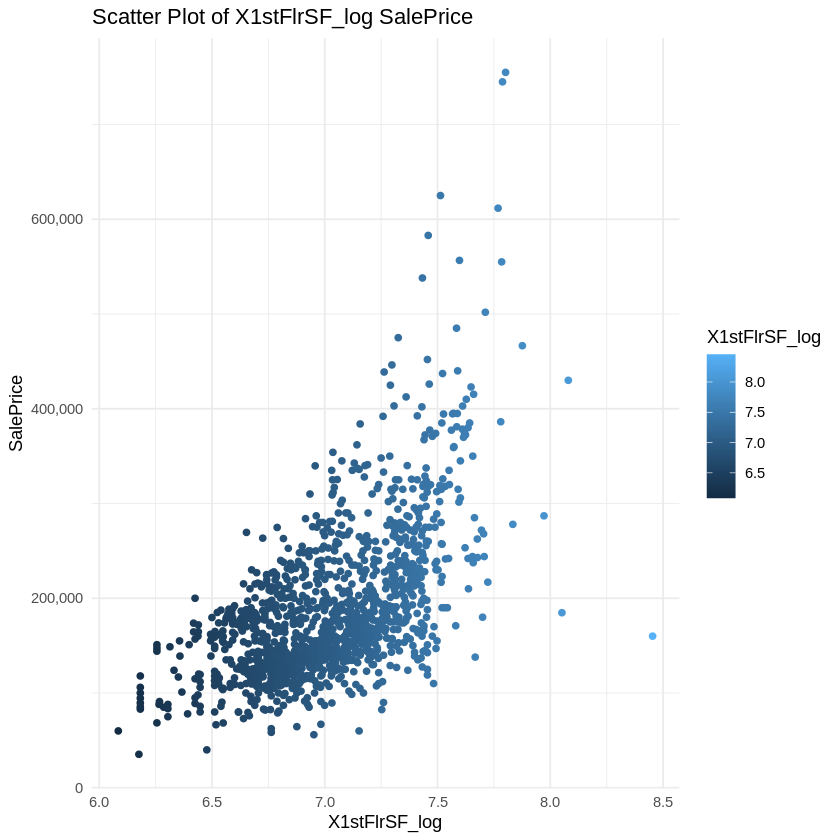

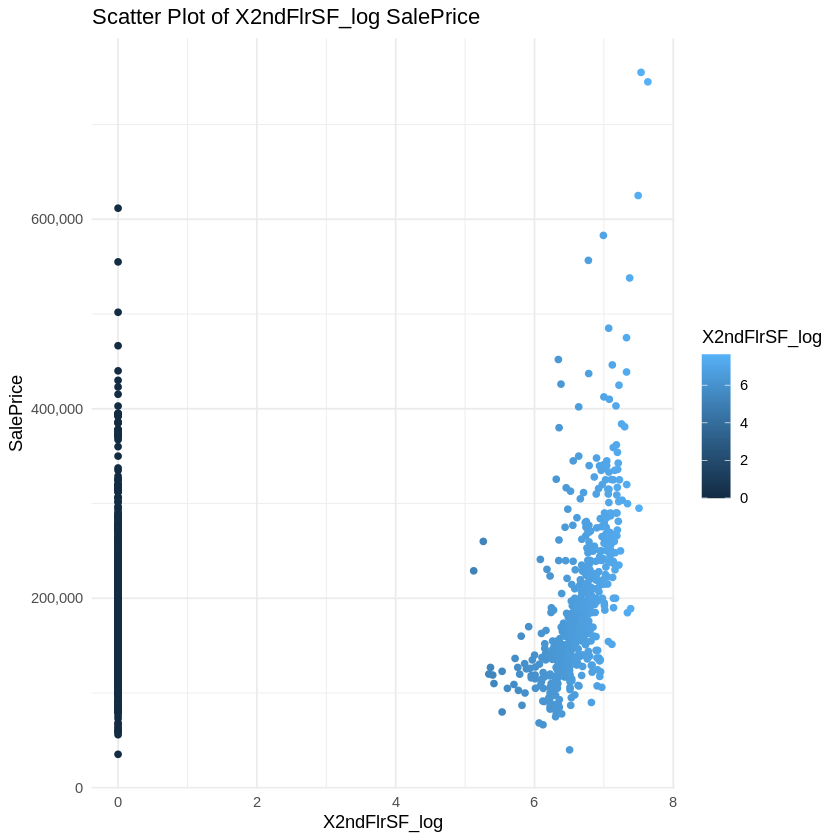

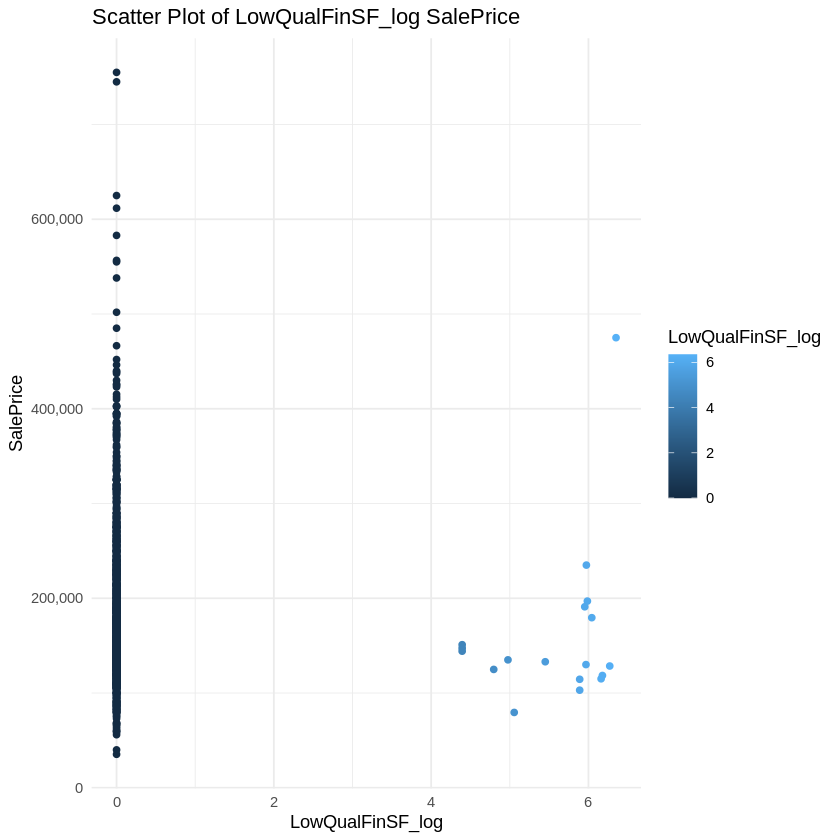

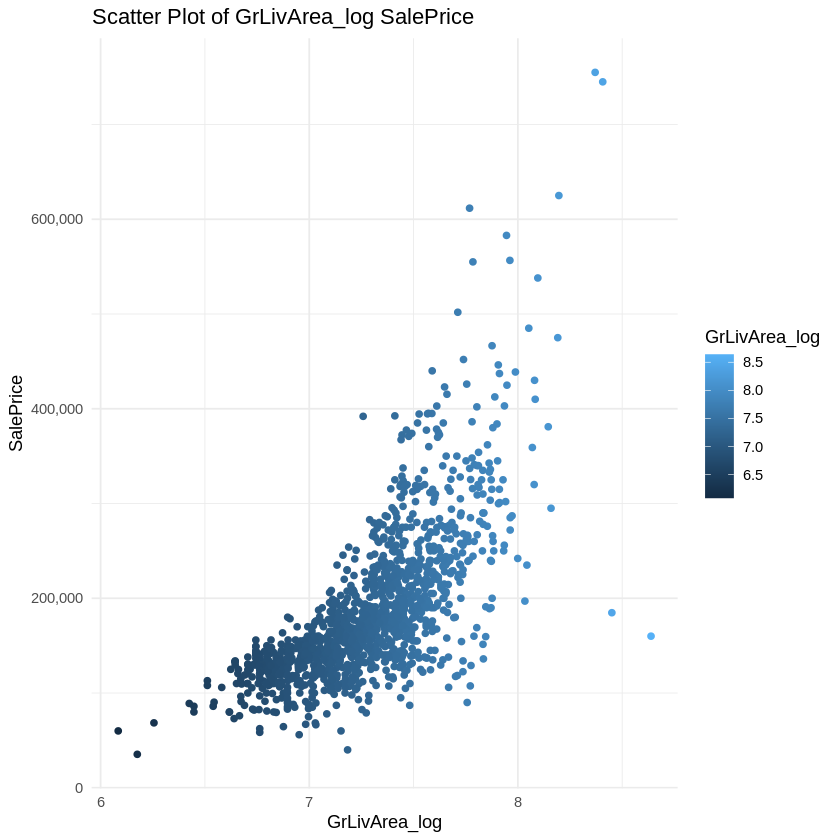

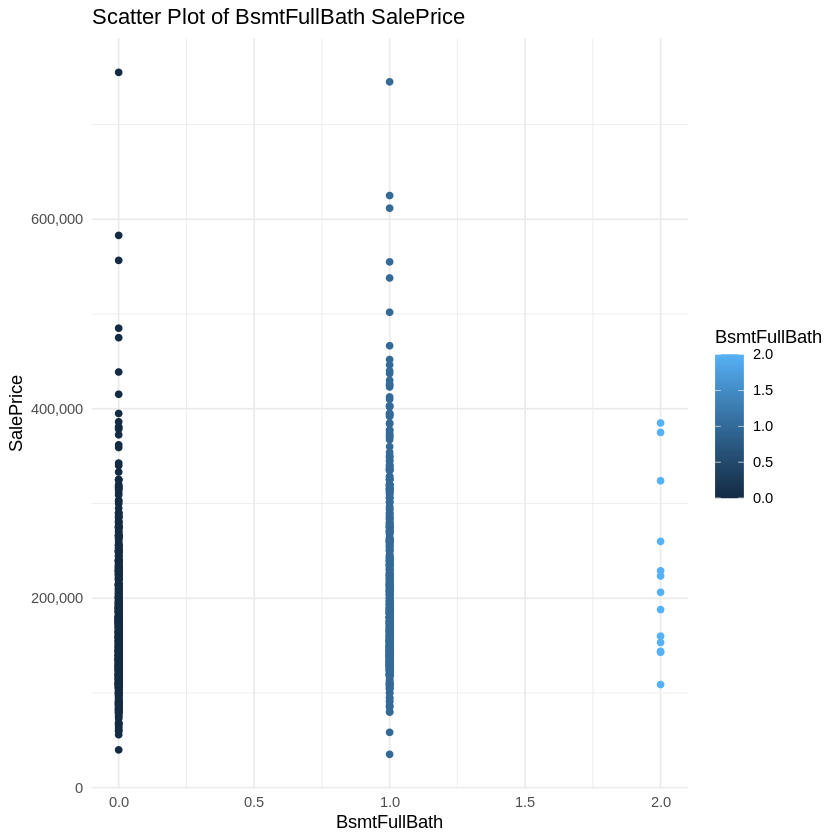

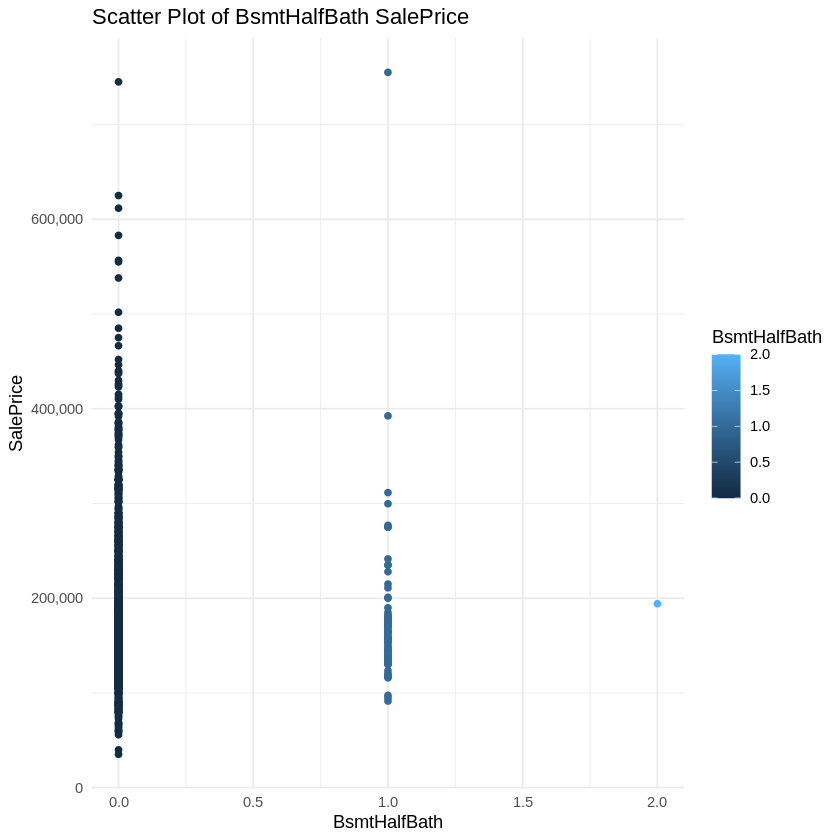

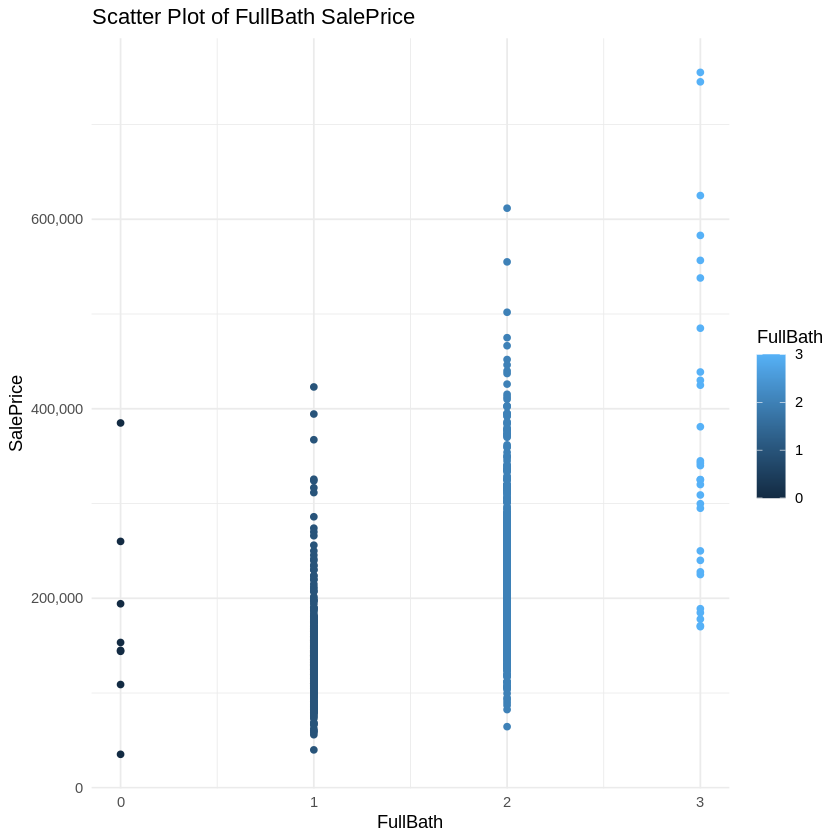

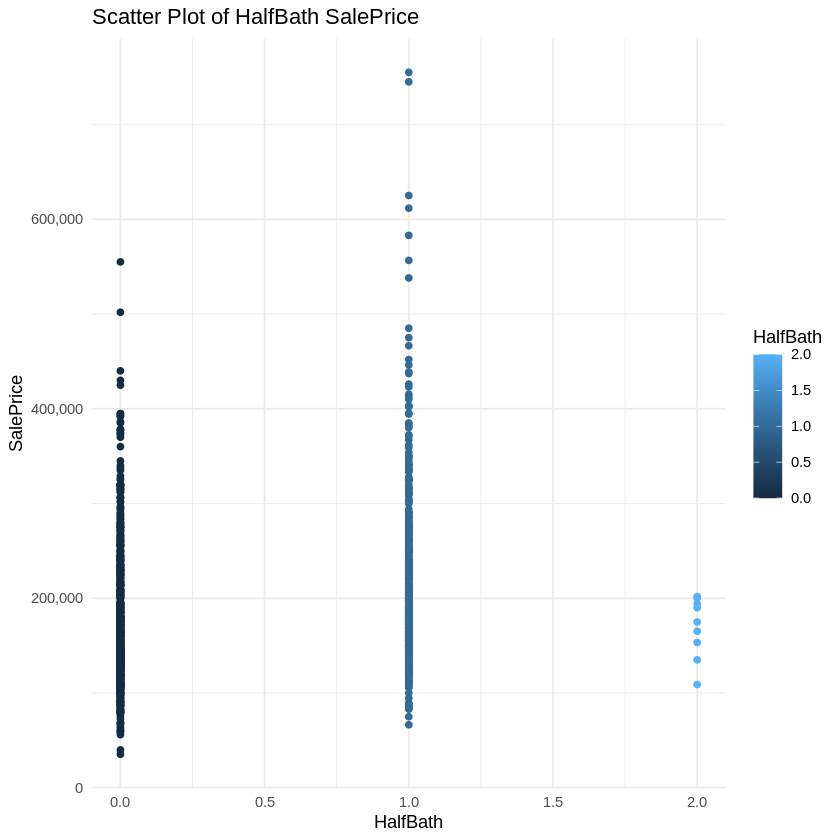

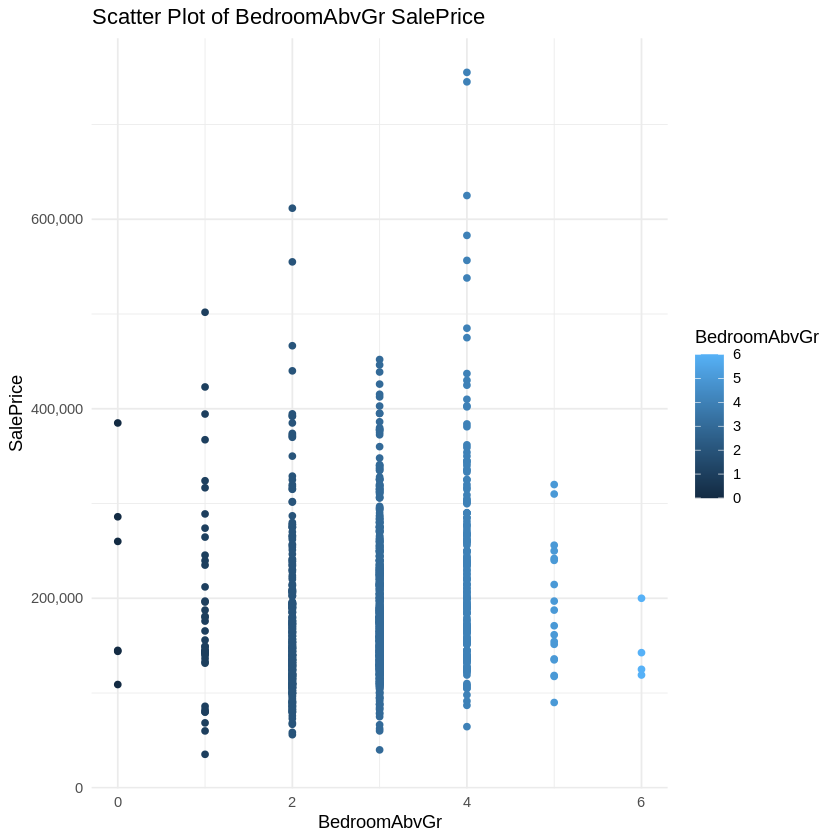

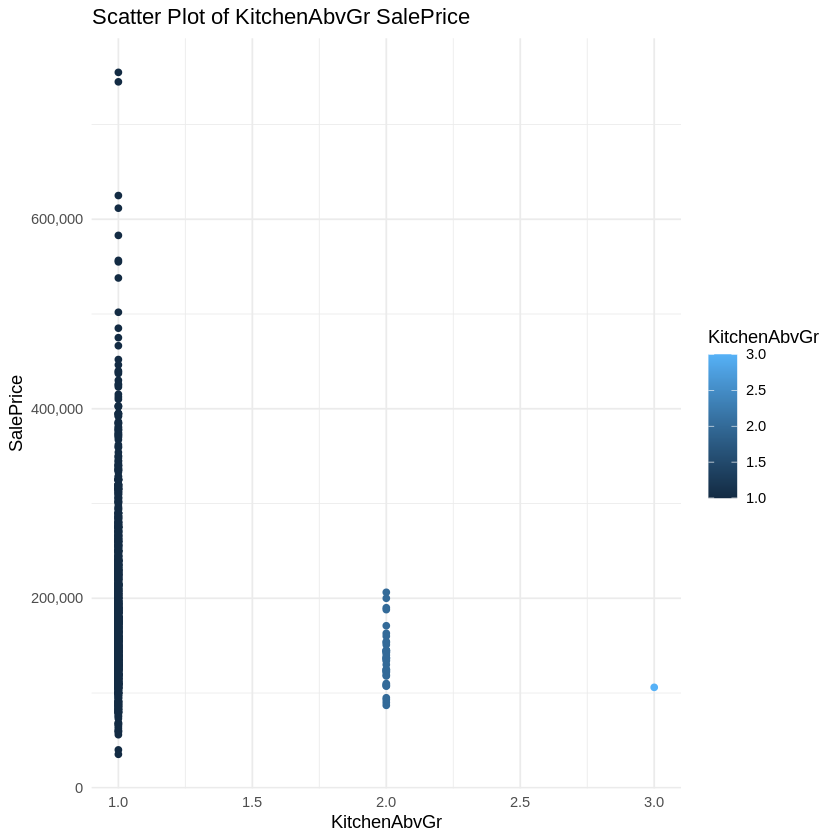

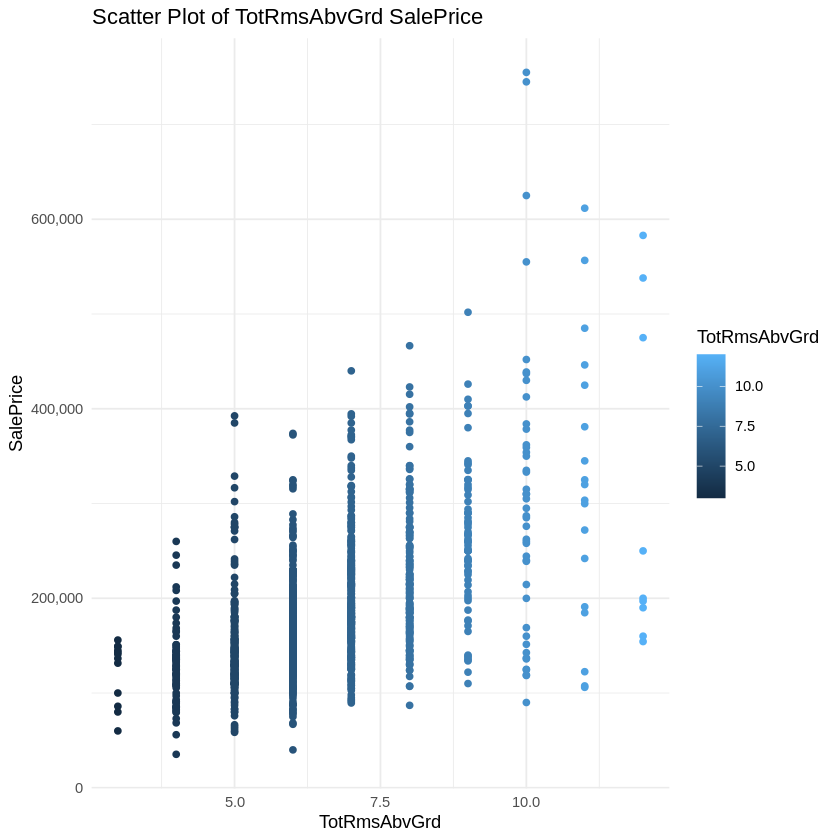

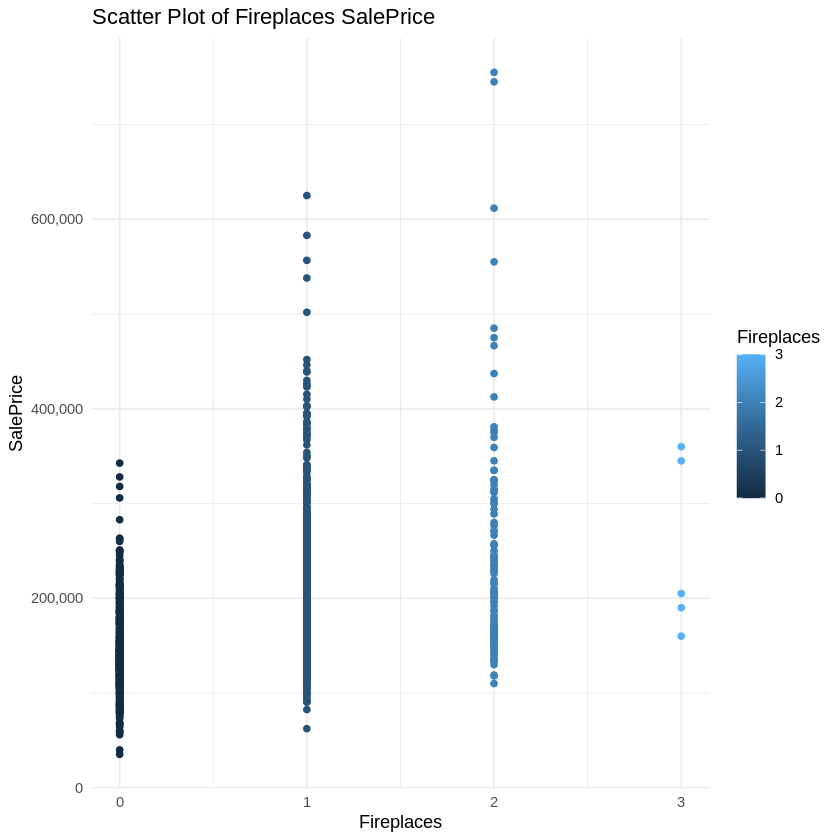

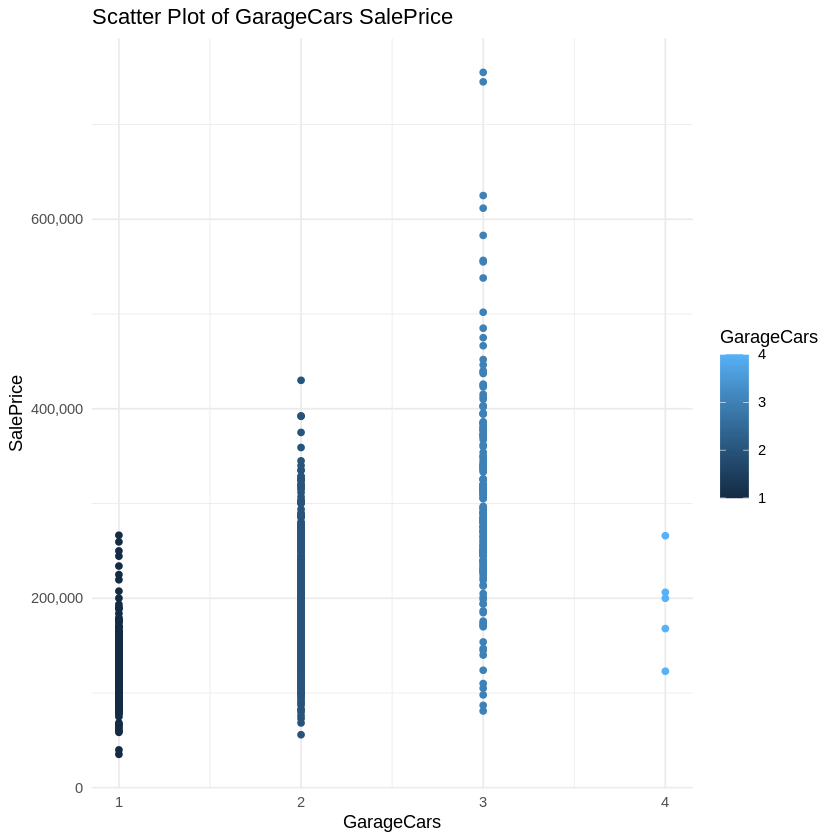

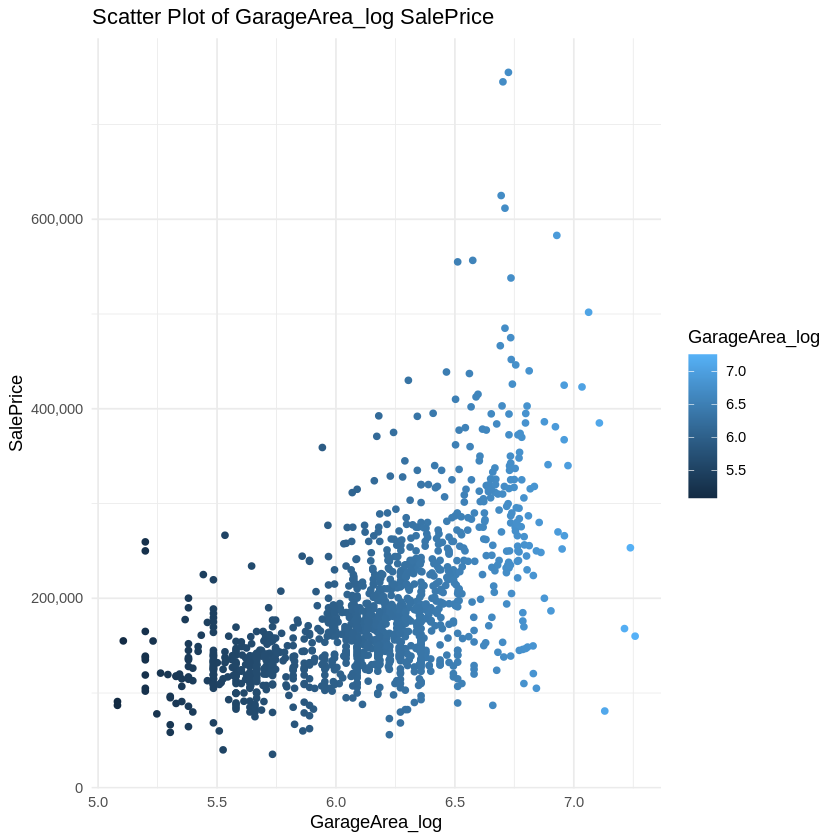

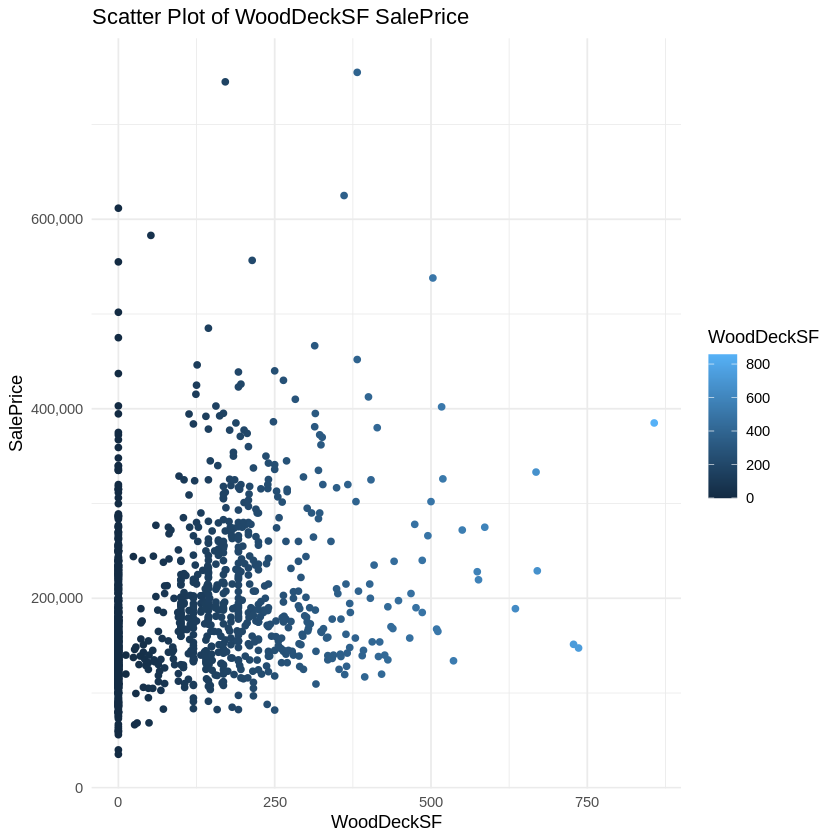

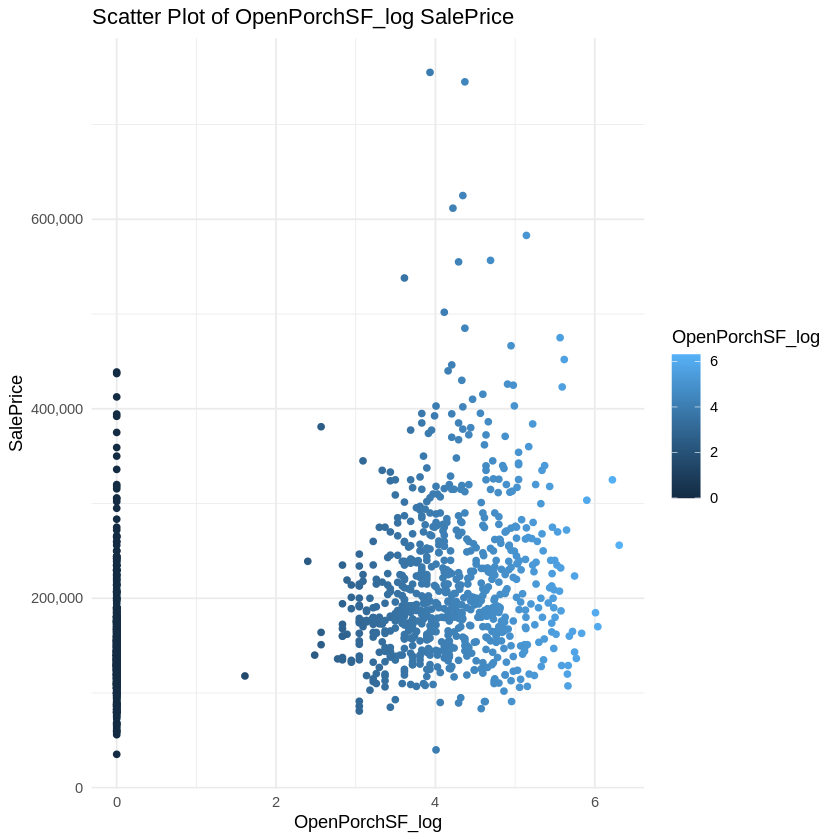

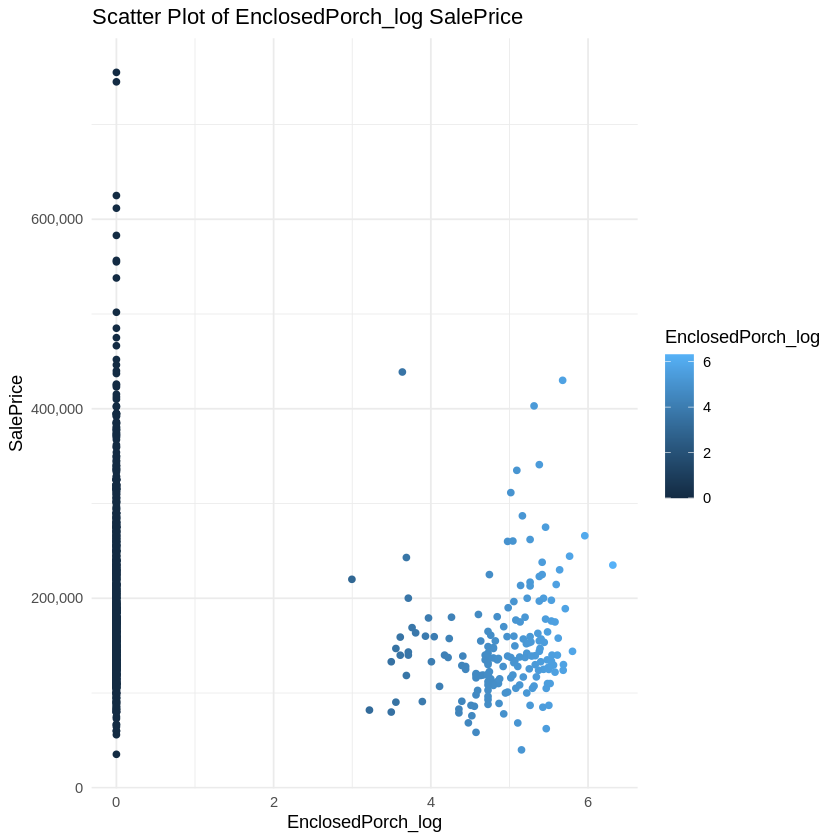

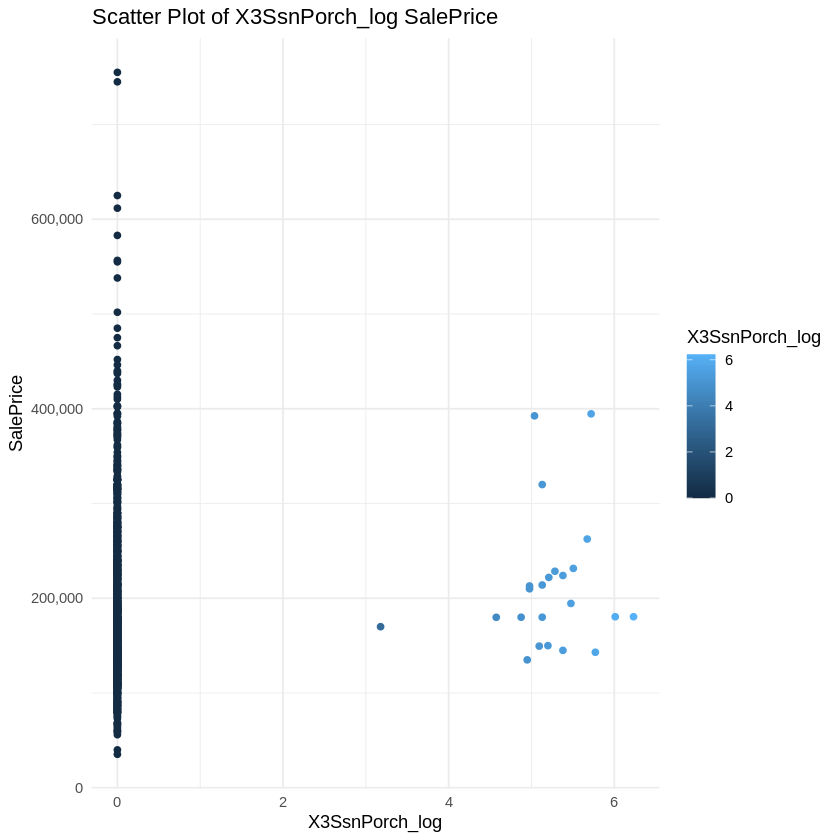

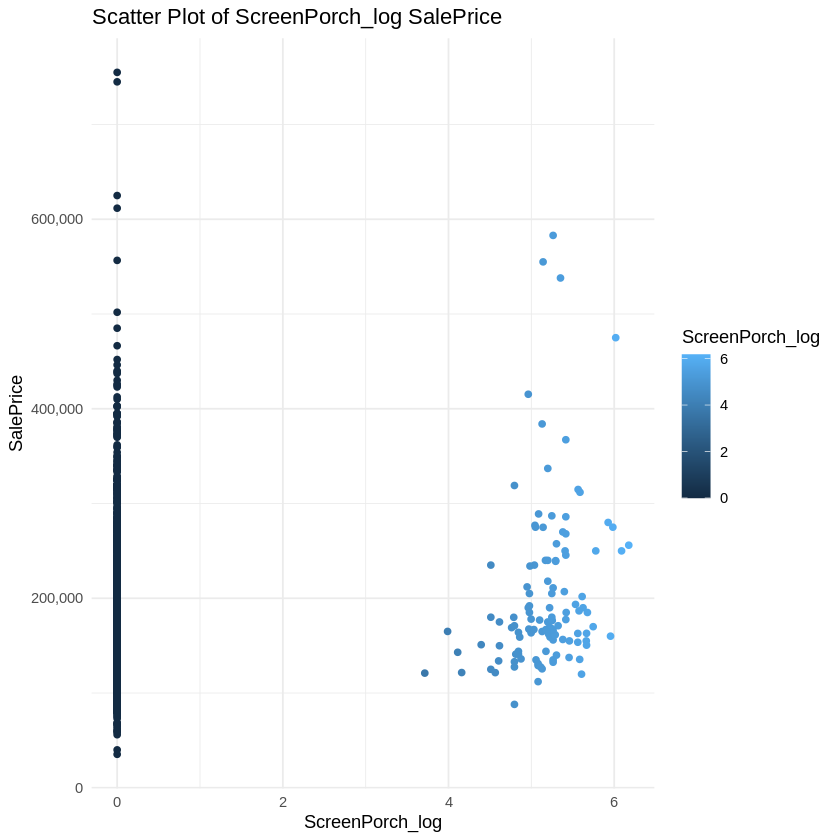

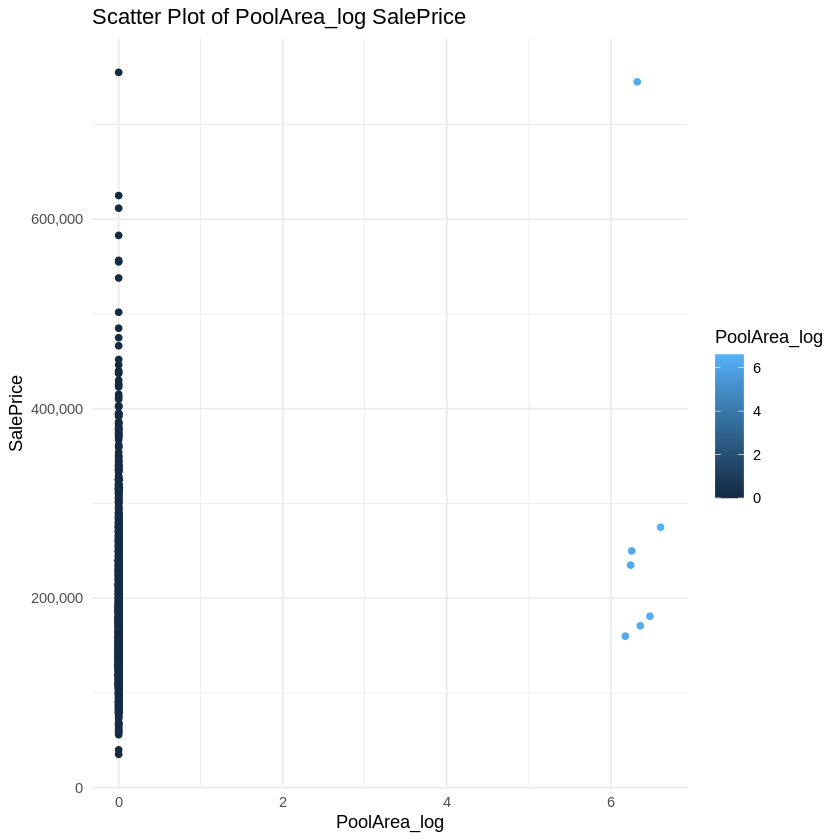

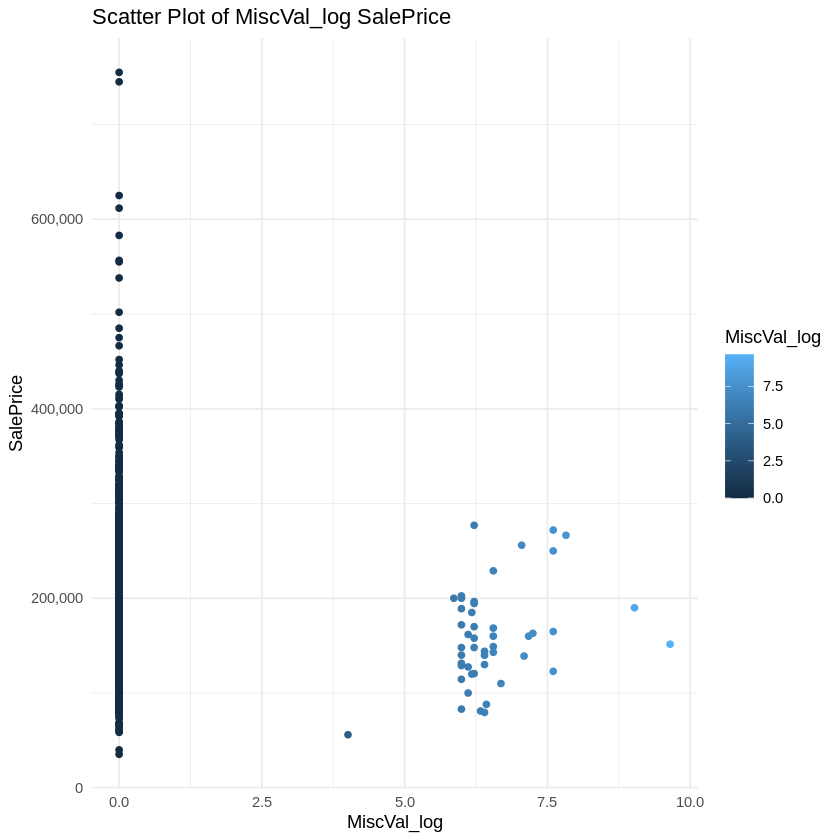

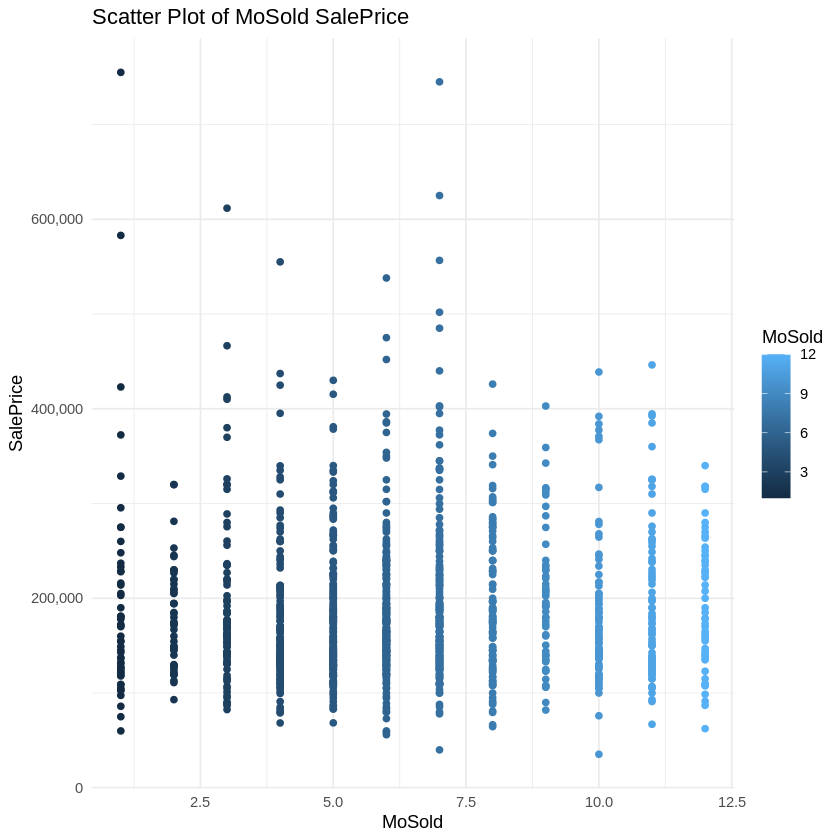

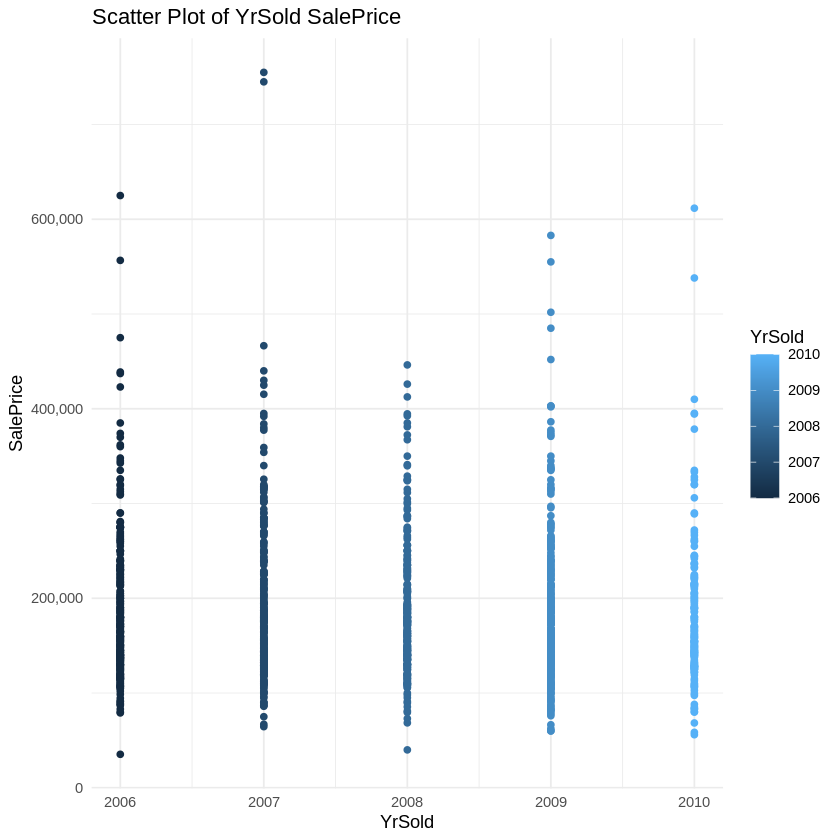

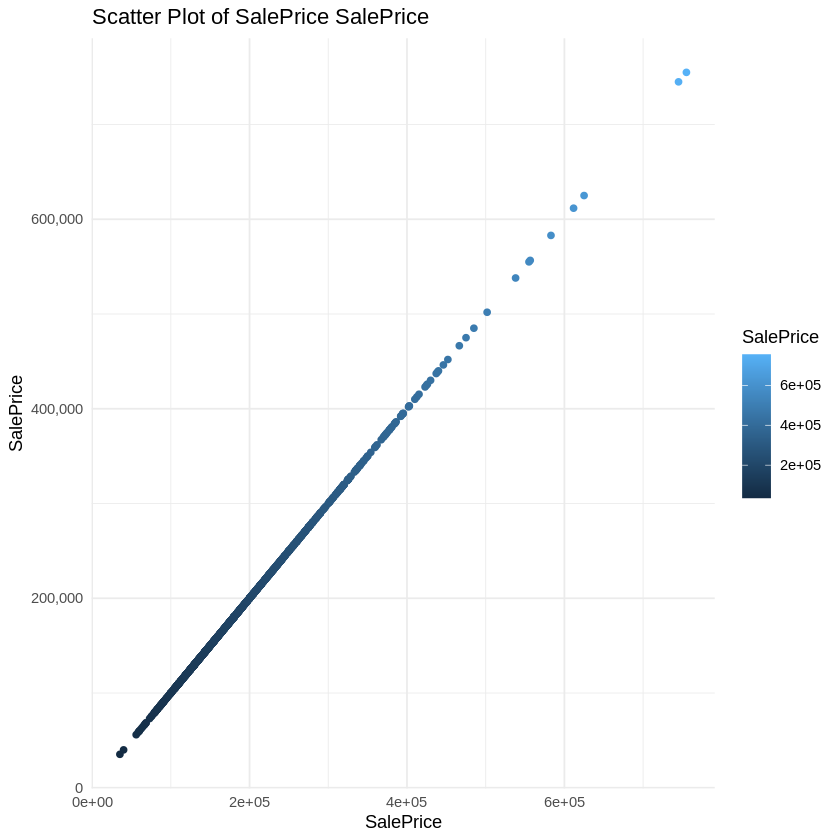

In [ ]:
# Tạo plot
plot_num_vs_label <- function(data, label_column, num_columns) {
  plots <- lapply(num_columns, function(num_column) {
    # Vẽ biểu đồ scatter plot cho mỗi cột số
    ggplot(data, aes(x = .data[[num_column]], y = .data[[label_column]], color = .data[[num_column]])) +
      geom_point() +
      labs(title = paste("Scatter Plot of", num_column, label_column),
           x = num_column,
           y = label_column) +
      theme_minimal() +
      scale_y_continuous(labels = scales::comma)  # Đặt lại định dạng trục y
  })

  # Hiển thị các biểu đồ
  return(plots)
}

# Sử dụng hàm với dữ liệu mẫu
plots <- plot_num_vs_label(data, "SalePrice", log_num_cols)

# Hiển thị các biểu đồ
for (i in seq_along(plots)) {
  print(plots[[i]])
}


**Nhận Xét**

MoSold vs SalePrice: Số lượng người mua nhà ở các mức giá dưới 400,000 phân bố đều trong các tháng.

YrSold: Số lượt bán nhà chủ yếu tập trung vào các năm 2006, 2007, 2008, 2009, và 2010, đặc biệt là ở các mức giá dưới 400,000.

LotFrontage: Các ngôi nhà ở mức giá dưới 400,000 và có khoảng cách đến đường phố từ 25-100 feet có sự hấp dẫn.

LotArea log: Các ngôi nhà ở mức giá dưới 400,000 và có diện tích lô đất từ 8.5-10 feet có sự hấp dẫn.

OverallQual: Mức đánh giá vật liệu và hoàn thiện chung của ngôi nhà có ảnh hưởng đáng kể đến giá bán, với mức độ cao hơn tương ứng với giá cao hơn.

OverallCond: Các ngôi nhà với điểm đánh giá tình trạng chung là 5 có sự biến động giá cao nhất, dao động chủ yếu từ 100,000 đến 600,000.

YearRemodAdd: Số lượng ngôi nhà có mức giá dưới 300,000 và đã được cải tạo trong khoảng từ 2000 đến 2010 có sự hấp dẫn.

YearBuilt: Các ngôi nhà được xây sau năm 2000 thường có sự biến động giá lớn nhất, với giá dao động chủ yếu từ 100,000 đến 600,000, cho thấy sự hấp dẫn của những ngôi nhà mới xây.

MasVnrArea: Các ngôi nhà có giá dưới 400,000 và có diện tích vật liệu ốp bên ngoài từ 4.0-7.0 có sự hấp dẫn lớn.

1stFlrSF: Các ngôi nhà ở mức giá dưới 400,000 và có diện tích tầng 1 từ 6.5-7.7 feet có sự hấp dẫn.

2ndFlrSF: Các ngôi nhà ở mức giá dưới 400,000 và có diện tích tầng 2 từ 6.0-7.5 feet có sự hấp dẫn.

GrLLivArea: Các ngôi nhà ở mức giá dưới 400,000 và có diện tích đất ở từ 6.5-8.0 có sự hấp dẫn.

LowQalFinSF: Các ngôi nhà có diện tích hoàn thiện chất lượng từ 4.5-6.5 có sự biến động giá rời rạc.

BsmtFullBath: Các ngôi nhà có số lượng phòng tắm đầy đủ trong tầng hầm thường có giá dao động từ 100,000 đến 1000,000, cho thấy sự hấp dẫn của những ngôi nhà kiểu này.

FullBath: Số lượng phòng tắm đầy đủ trên mặt đất thường tương quan với giá, đặc biệt là khi có 3 phòng tắm đầy đủ, giá có thể dao động từ 200,000 đến 600,000.

BsmtHalfBath: Số lượng phòng tắm bán trong tầng hầm thường có giá dao động thấp hơn 300,000, đặc biệt khi có 1 phòng tắm bán.

HalfBath: Số lượng phòng tắm bán trên mặt đất thường tương quan với giá, đặc biệt khi có 1 phòng tắm bán, giá có thể thấp hơn 700,000.

GarageYrBlt: Các ngôi nhà có mức giá dưới 400,000 và năm xây garage từ 1950-2010 có sự hấp dẫn.

GarageCars: Các ngôi nhà có garage có thể chứa 3 xe thường có giá dao động lớn nhất, giá thường dưới 600,000.

GarageArea: Các ngôi nhà có giá dưới 300,000 và diện tích garage từ 6.0 đến 6.5 có sự hấp dẫn.

WoodDeckSF: Các ngôi nhà có giá dưới 350,000 và diện tích sân deck từ 0-300 feet có sự hấp dẫn.

OpenPorchSF: Các ngôi nhà có giá dưới 400,000 và diện tích sân hiên mở từ 3-5.5 feet có sự hấp dẫn.

3SsnPorch: Các ngôi nhà có sân hiên ba mùa từ 5-6 feet có sự biến động giá rời rạc, thường dưới 400,000.

ScreenPorch: Các ngôi nhà có diện tích sân hiên màn hình từ 4.5-6.0 có sự hấp dẫn.

PoolArea: Các ngôi nhà có diện tích hồ bơi lớn hơn 6 feet có giá dưới 300,000.

MiscVal: Các ngôi nhà có giá trị vật phẩm trong nhà từ 6-8($) có giá dưới 300,000.


# Câu 5: Kết Luận

Phân tích dữ liệu giúp chúng ta hiểu rõ hơn về các yếu tố ảnh hưởng đến giá nhà và làm cơ sở cho việc dự đoán giá nhà. Dưới đây là những kết luận chi tiết sau quá trình phân tích:

1. Chất Lượng Ngôi Nhà Ảnh Hưởng Lớn Đến Giá Bán: Chất lượng tổng thể của ngôi nhà (OverallQual) có mối tương quan mạnh mẽ với giá bán. Ngôi nhà được đánh giá cao về chất lượng thường có giá bán cao hơn.

2. Diện Tích Sống Quyết Định Giá Nhà: Diện tích sống (GrLivArea) là một yếu tố quan trọng ảnh hưởng đến giá nhà. Ngôi nhà có diện tích sống lớn thường có giá cao hơn.

3. Số Lượng Xe Ô Tô Trong Garage Có Tác Động: Số lượng xe ô tô mà garage có thể chứa (GarageCars) cũng ảnh hưởng tích cực đến giá nhà. Ngôi nhà có garage chứa nhiều xe thường có giá bán cao hơn.

4. Yếu Tố Khác Cũng Quan Trọng: Nhiều yếu tố khác như chất lượng garage, điều kiện sân nhà và loại garage cũng đóng vai trò quan trọng trong việc định giá nhà.

4. Nhận Thức Về Xu Hướng Quan Trọng: Hiểu những xu hướng như số lượng xe ô tô, diện tích sống và chất lượng ngôi nhà giúp dự đoán giá nhà chính xác hơn.

5. Phân Tích Tương Quan Quan Trọng: Phân tích tương quan giữa các biến và giá nhà, cũng như phân tích nguyên nhân - kết quả, giúp xây dựng mô hình dự đoán chính xác hơn và hiểu rõ hơn về mối quan hệ giữa các yếu tố.

Kết Luận Tổng Thể: Chất lượng ngôi nhà, diện tích sống và số lượng xe ô tô trong garage là những yếu tố quyết định giá nhà. Dữ liệu cần được xử lý cẩn thận để loại bỏ các biến không ảnh hưởng đến giá nhà và chuẩn bị cho quá trình dự đoán. Các kết luận này hỗ trợ xây dựng một mô hình dự đoán giá nhà hiệu quả và hỗ trợ quyết định trong lĩnh vực bất động sản.